In [82]:
import xlrd
import numpy as np

In [83]:
# import qmpy_rester as qr

# ## Return list of data
# with qr.QMPYRester() as q:
#     kwargs = {'element_set': '(Fe-Mn),O',      # composition include (Fe OR Mn) AND O
#         'stability': '<0.1',            # hull distance smaller than -0.1 eV
#         'natoms': '10',                  # number of atoms less than 10
#         }
#     list_of_data = q.get_oqmd_phases(**kwargs)

# ## Return data of a single oqmd phase
# with qr.QMPYRester() as q:
#     phase = q.get_oqmd_phase_by_id(fe_id=4061139, fields='!sites') # Default: fields=None

In [84]:
# list_of_data

In [85]:
import os
curr_path = './'
ternary_hcp = os.path.join(curr_path, 'HEA_Data/Ternary_sqshcp_POSCAR_Files')
ternary_fcc_bcc = os.path.join(curr_path, 'HEA_Data/Ternary_POSCAR_Files')

In [87]:
CrCo2Pd_sqshcp = os.path.join(ternary_hcp, 'POSCAR_CrCo2Pd_sqshcp')
CrCo2Pd_sqsfcc = os.path.join(ternary_fcc_bcc, 'POSCAR_CrCo2Pd_sqsfcc')
CrCo2Pd_sqsbcc = os.path.join(ternary_fcc_bcc, 'POSCAR_CrCo2Pd_sqsbcc')

In [88]:
from pymatgen.io.vasp import Poscar
from pymatgen.core import Structure
from pymatgen.io.ase import AseAtomsAdaptor

poscar= Poscar.from_file(CrCo2Pd_sqshcp, check_for_POTCAR=False, read_velocities=True)
def get_atom(poscar):
    poscar= Poscar.from_file(poscar, check_for_POTCAR=False, read_velocities=True)
    struct = poscar.structure
    atoms = AseAtomsAdaptor.get_atoms(struct)
    return atoms

    

In [89]:
# count the information of different combinations:
from collections import defaultdict
def count_info(path):
    filename = os.listdir(path)
    print('total number of structures are {}'.format(len(filename)))
    my_dict = defaultdict(int)
    for f in filename:
        mat = os.path.join(path, f)
        poscar = Poscar.from_file(mat)
        symbol_set = poscar.structure.symbol_set
        my_dict[symbol_set]+=1
    return my_dict
result = count_info(ternary_hcp)    
print(result)

from itertools import combinations
total_combinations = list(combinations(['Ni', 'Fe', 'Mn', 'Pd', 'Cr', 'Co'], 3))
total_combinations_set = [set(i) for i in total_combinations]
print('Ternary total combinations are {} \n, where there are {} items\n'.format(total_combinations, len(total_combinations)))
total_combinations = list(combinations(['Ni', 'Fe', 'Mn', 'Pd', 'Cr', 'Co'], 4))
print('Quaternary total combinations are {} \n, where there are {} items\n'.format(total_combinations, len(total_combinations)))
total_combinations = list(combinations(['Ni', 'Fe', 'Mn', 'Pd', 'Cr', 'Co'], 5))
print('Quinary total combinations are {} \n, where there are {} items\n'.format(total_combinations, len(total_combinations)))
# obtain the missing combinations.
systems = ()
systems_cur = []
for k in result.keys():
    systems +=k
    set_k = set(k)
    systems_cur.append(set_k)

for v in total_combinations_set:
    if v not in systems_cur:
        print('The missing combination are  {} \n'.format(v))
print('The alloy systems are {}'.format(set(systems)))

print('The total number of combinations are {}. Theoretically, there should be {} '.format(len(result), len(total_combinations)))

total number of structures are 64
defaultdict(<class 'int'>, {('Co', 'Cr', 'Mn'): 4, ('Co', 'Cr', 'Pd'): 4, ('Co', 'Fe', 'Mn'): 4, ('Co', 'Fe', 'Pd'): 4, ('Co', 'Cr', 'Fe'): 4, ('Cr', 'Fe', 'Mn'): 4, ('Cr', 'Fe', 'Pd'): 4, ('Co', 'Fe', 'Ni'): 4, ('Cr', 'Fe', 'Ni'): 4, ('Fe', 'Mn', 'Ni'): 4, ('Fe', 'Ni', 'Pd'): 4, ('Co', 'Mn', 'Ni'): 4, ('Co', 'Ni', 'Pd'): 4, ('Co', 'Cr', 'Ni'): 4, ('Cr', 'Mn', 'Ni'): 4, ('Cr', 'Ni', 'Pd'): 4})
Ternary total combinations are [('Ni', 'Fe', 'Mn'), ('Ni', 'Fe', 'Pd'), ('Ni', 'Fe', 'Cr'), ('Ni', 'Fe', 'Co'), ('Ni', 'Mn', 'Pd'), ('Ni', 'Mn', 'Cr'), ('Ni', 'Mn', 'Co'), ('Ni', 'Pd', 'Cr'), ('Ni', 'Pd', 'Co'), ('Ni', 'Cr', 'Co'), ('Fe', 'Mn', 'Pd'), ('Fe', 'Mn', 'Cr'), ('Fe', 'Mn', 'Co'), ('Fe', 'Pd', 'Cr'), ('Fe', 'Pd', 'Co'), ('Fe', 'Cr', 'Co'), ('Mn', 'Pd', 'Cr'), ('Mn', 'Pd', 'Co'), ('Mn', 'Cr', 'Co'), ('Pd', 'Cr', 'Co')] 
, where there are 20 items

Quaternary total combinations are [('Ni', 'Fe', 'Mn', 'Pd'), ('Ni', 'Fe', 'Mn', 'Cr'), ('Ni', 'Fe', 'Mn', 'C

In [96]:
struct = poscar.structure
# print(struct)
print(poscar.site_symbols)
print(struct.composition)
print(type(struct.composition))
print(struct.species)
print(struct.)
print(struct.symbol_set)
print(struct.symbol_set[:])
print(struct.atomic_numbers)
struct.atomic_numbers
# print(struct.composition.formula)
# print(struct.composition.alphabetical_formula)
# print(struct.composition.element_composition)
# print(struct.composition.fractional_composition)
# print(struct.composition.to_reduced_dict)
# print(struct.composition.to_reduced_dict.keys())

['Cr', 'Co', 'Pd']
Cr8 Co16 Pd8
<class 'pymatgen.core.composition.Composition'>
[Element Cr, Element Cr, Element Cr, Element Cr, Element Cr, Element Cr, Element Cr, Element Cr, Element Co, Element Co, Element Co, Element Co, Element Co, Element Co, Element Co, Element Co, Element Co, Element Co, Element Co, Element Co, Element Co, Element Co, Element Co, Element Co, Element Pd, Element Pd, Element Pd, Element Pd, Element Pd, Element Pd, Element Pd, Element Pd]
('Co', 'Cr', 'Pd')
('Co', 'Cr', 'Pd')
(24, 24, 24, 24, 24, 24, 24, 24, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 46, 46, 46, 46, 46, 46, 46, 46)
Cr8 Co16 Pd8


In [103]:
from pymatgen.core.periodic_table import ElementBase

ElementBase.from_Z(1)

Element H

In [33]:
from pymatgen.symmetry import analyzer

In [34]:
# visualization with ase
from ase.visualize import view
from ase import Atoms
# atoms= Atoms('CH4')
# view(atoms, viewer='x3d')

# visualize poscar
from pymatgen.io.ase import AseAtomsAdaptor
atoms = AseAtomsAdaptor.get_atoms(struct)
print(len(atoms.positions))
view(atoms, viewer='ngl')




32


In [35]:
# visualization with ase

# visualize poscar
from pymatgen.io.ase import AseAtomsAdaptor
FeCoMn_atoms = get_atom(poscar= './HEA_Data/SQS_ternary_POSCAR_Files/Co5FeMn14_sqsfcc')
print(len(FeCoMn_atoms.positions))
view(FeCoMn_atoms, viewer='ngl')



20


In [36]:
atoms_bcc = get_atom(CrCo2Pd_sqsbcc)
view(atoms_bcc, viewer='ngl')

In [51]:
print(atoms.cell.get_bravais_lattice())
# from gpaw import GPAW, PW

# infer the spacegroup
from ase.spacegroup import get_basis, get_spacegroup, Spacegroup
# get_basis(atoms)
get_spacegroup(atoms_bcc, symprec=1e-04)
sg = Spacegroup(1)
print(sg)



TRI(a=8.98596, b=5.23715, c=8.30983, alpha=90.1514, beta=90.4537, gamma=90.1393)
1     P 1
  setting 1
  centrosymmetric 0
  primitive vectors
     1.0000000000  0.0000000000  0.0000000000
     0.0000000000  1.0000000000  0.0000000000
     0.0000000000  0.0000000000  1.0000000000
  reciprocal vectors
      1   0   0
      0   1   0
      0   0   1
  1 subtranslations
     0.0000000000  0.0000000000  0.0000000000
  1 symmetry operations (rot+trans)
    1  0  0     0  1  0     0  0  1    0.0000000000  0.0000000000  0.0000000000




In [52]:
analyzer.SpacegroupAnalyzer(struct).get_crystal_system()

'triclinic'

In [53]:
def get_crystal_system(poscar_file):
    poscar= Poscar.from_file(poscar_file, check_for_POTCAR=False, read_velocities=True)
    struct = poscar.structure
    cs = analyzer.SpacegroupAnalyzer(struct).get_crystal_system()
    return cs

In [54]:
test = os.path.join(ternary_fcc_bcc, 'POSCAR_NiCoPd_sqsbcc')
get_crystal_system(test)
from ase.build import bulk
a1 = bulk('Cu', crystalstructure='fcc', a=3.6)
a2 = bulk('Cu', crystalstructure='fcc', a=3.6, cubic=True)
view(a1, viewer='ngl')
print(a1.cell)
# view(a2, viewer='ngl')

Cell([[0.0, 1.8, 1.8], [1.8, 0.0, 1.8], [1.8, 1.8, 0.0]])


In [55]:
# Cu element with fcc structures. lattice constant is 3.6149.
Cu = bulk('Cu', crystalstructure='fcc', a=3.6, cubic=True)
print(Cu.cell)
print(Cu.get_scaled_positions(wrap=False))
from ase.geometry.analysis import Analysis
ana = Analysis(Cu)
cucubonds = ana.get_bonds('Cu', 'Cu', unique=True)
# print(cucubonds)
cucuangles = ana.get_angles('Cu', 'Cu', 'Cu', unique=True)
# print(cucuangles)
print('n Bonds: {} and n angles: {}'.format( len(cucubonds[0]), len(cucuangles[0])))
print('Bond values: {}, Bond angle: {}'.format(ana.get_values(cucubonds),  ana.get_values(cucuangles)))
view(a1, viewer='ngl')

# view(a2, viewer='ngl')

Cell([3.6, 3.6, 3.6])
[[0.  0.  0. ]
 [0.  0.5 0.5]
 [0.5 0.  0.5]
 [0.5 0.5 0. ]]
n Bonds: 6 and n angles: 12
Bond values: [[2.545584412271571, 2.545584412271571, 2.545584412271571, 2.545584412271571, 2.545584412271571, 2.545584412271571]], Bond angle: [[59.99999999999999, 59.99999999999999, 59.99999999999999, 59.99999999999999, 59.99999999999999, 59.99999999999999, 59.99999999999999, 59.99999999999999, 59.99999999999999, 59.99999999999999, 59.99999999999999, 59.99999999999999]]


In [56]:
# Fe element with bcc structures. lattice constant is 2.87.
Fe=bulk('Fe', cubic=False, orthorhombic=True)
# crystal structure and lattice constant will be guessed if not provided.
# Fe = Fe.repeat((2,2,2))
print(Fe.cell)
print(Fe.get_scaled_positions(wrap=True))
view(Fe, viewer='ngl')

Cell([2.87, 2.87, 2.87])
[[0.  0.  0. ]
 [0.5 0.5 0.5]]


In [57]:
# Co element with hcp structure
Co=bulk('Co')
# Co = Co.repeat((2,2,2))
print(Co.cell)
print(Co.get_cell_lengths_and_angles())
view(Co, viewer='ngl')

Cell([[2.51, 0.0, 0.0], [-1.255, 2.173723763498941, 0.0], [0.0, 0.0, 4.07122]])
[  2.51      2.51      4.07122  90.       90.      120.     ]


In [58]:
# view(a1, viewer='ngl')

In [59]:
# view(a2, viewer='ngl')

In [60]:
from icet import ClusterSpace
from icet.tools.structure_generation import (generate_sqs,
                                             generate_sqs_from_supercells,
                                             generate_sqs_by_enumeration,
                                             generate_target_structure)

from icet.input_output.logging_tools import set_log_config
set_log_config(level='INFO')
cs = ClusterSpace(structure = a2, cutoffs=[8.0, 4.0], chemical_symbols=['Fe', 'Co', 'Mn'] )
print(cs)
# set the compositions.
x = 0.025  #0.25
y = 0.025  # 0.5
z = 1-x-y
target_concentrations = {'Fe':x, 'Co':y, 'Mn':z}
sqs = generate_sqs(cluster_space=cs,
            max_size=64,
            target_concentrations=target_concentrations)
print('Cluster vector of generated structure:', cs.get_cluster_vector(sqs))


# Generate SQS from supercells.

icet.orbit_list: INFO  Done getting matrix_of_equivalent_positions.
icet.orbit_list: INFO  Done getting neighbor lists.
icet.orbit_list: INFO  Transformation of matrix of equivalent positions to lattice neighbor format completed.
icet.orbit_list: INFO  Finished construction of orbit list.
====================================== Cluster Space ======================================
 space group                            : Fm-3m (225)
 chemical species                       : ['Co', 'Fe', 'Mn'] (sublattice A)
 cutoffs                                : 8.0000 4.0000
 total number of parameters             : 43
 number of parameters by order          : 0= 1  1= 2  2= 30  3= 10
 fractional_position_tolerance          : 2e-06
 position_tolerance                     : 1e-05
 symprec                                : 1e-05
-------------------------------------------------------------------------------------------
index | order |  radius  | multiplicity | orbit_index | multicomponent_vector | subl

icet.target_cluster_vector_annealing: INFO  MC step 24000/858000 (23486 accepted trials, temperature 1.310), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 25000/858000 (24452 accepted trials, temperature 1.295), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 26000/858000 (25427 accepted trials, temperature 1.280), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 27000/858000 (26401 accepted trials, temperature 1.267), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 28000/858000 (27378 accepted trials, temperature 1.253), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 29000/858000 (28349 accepted trials, temperature 1.240), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 30000/858000 (29317 accepted trials, temperature 1.228), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 31000/858000 (30281 accepted trials, temperature 1.216), be

icet.target_cluster_vector_annealing: INFO  MC step 89000/858000 (86270 accepted trials, temperature 0.830), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 90000/858000 (87233 accepted trials, temperature 0.826), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 91000/858000 (88190 accepted trials, temperature 0.822), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 92000/858000 (89149 accepted trials, temperature 0.818), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 93000/858000 (90117 accepted trials, temperature 0.814), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 94000/858000 (91062 accepted trials, temperature 0.810), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 95000/858000 (92032 accepted trials, temperature 0.806), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 96000/858000 (92994 accepted trials, temperature 0.802), be

icet.target_cluster_vector_annealing: INFO  MC step 153000/858000 (147431 accepted trials, temperature 0.632), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 154000/858000 (148393 accepted trials, temperature 0.629), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 155000/858000 (149345 accepted trials, temperature 0.627), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 156000/858000 (150288 accepted trials, temperature 0.625), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 157000/858000 (151224 accepted trials, temperature 0.622), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 158000/858000 (152181 accepted trials, temperature 0.620), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 159000/858000 (153130 accepted trials, temperature 0.618), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 160000/858000 (154087 accepted trials, temper

icet.target_cluster_vector_annealing: INFO  MC step 217000/858000 (207854 accepted trials, temperature 0.504), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 218000/858000 (208785 accepted trials, temperature 0.502), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 219000/858000 (209722 accepted trials, temperature 0.501), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 220000/858000 (210656 accepted trials, temperature 0.499), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 221000/858000 (211593 accepted trials, temperature 0.497), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 222000/858000 (212520 accepted trials, temperature 0.496), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 223000/858000 (213470 accepted trials, temperature 0.494), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 224000/858000 (214409 accepted trials, temper

icet.target_cluster_vector_annealing: INFO  MC step 281000/858000 (267433 accepted trials, temperature 0.409), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 282000/858000 (268351 accepted trials, temperature 0.408), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 283000/858000 (269268 accepted trials, temperature 0.407), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 284000/858000 (270193 accepted trials, temperature 0.406), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 285000/858000 (271115 accepted trials, temperature 0.404), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 286000/858000 (272039 accepted trials, temperature 0.403), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 287000/858000 (272967 accepted trials, temperature 0.402), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 288000/858000 (273897 accepted trials, temper

icet.target_cluster_vector_annealing: INFO  MC step 345000/858000 (325984 accepted trials, temperature 0.334), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 346000/858000 (326880 accepted trials, temperature 0.333), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 347000/858000 (327803 accepted trials, temperature 0.332), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 348000/858000 (328711 accepted trials, temperature 0.331), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 349000/858000 (329613 accepted trials, temperature 0.330), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 350000/858000 (330512 accepted trials, temperature 0.329), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 351000/858000 (331406 accepted trials, temperature 0.328), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 352000/858000 (332332 accepted trials, temper

icet.target_cluster_vector_annealing: INFO  MC step 409000/858000 (383611 accepted trials, temperature 0.272), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 410000/858000 (384502 accepted trials, temperature 0.271), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 411000/858000 (385399 accepted trials, temperature 0.270), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 412000/858000 (386273 accepted trials, temperature 0.269), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 413000/858000 (387151 accepted trials, temperature 0.269), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 414000/858000 (388030 accepted trials, temperature 0.268), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 415000/858000 (388913 accepted trials, temperature 0.267), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 416000/858000 (389808 accepted trials, temper

icet.target_cluster_vector_annealing: INFO  MC step 473000/858000 (439883 accepted trials, temperature 0.219), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 474000/858000 (440728 accepted trials, temperature 0.218), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 475000/858000 (441595 accepted trials, temperature 0.217), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 476000/858000 (442439 accepted trials, temperature 0.217), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 477000/858000 (443311 accepted trials, temperature 0.216), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 478000/858000 (444175 accepted trials, temperature 0.215), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 479000/858000 (445032 accepted trials, temperature 0.214), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 480000/858000 (445889 accepted trials, temper

icet.target_cluster_vector_annealing: INFO  MC step 537000/858000 (494332 accepted trials, temperature 0.172), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 538000/858000 (495163 accepted trials, temperature 0.172), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 539000/858000 (496017 accepted trials, temperature 0.171), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 540000/858000 (496858 accepted trials, temperature 0.170), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 541000/858000 (497714 accepted trials, temperature 0.170), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 542000/858000 (498554 accepted trials, temperature 0.169), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 543000/858000 (499381 accepted trials, temperature 0.168), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 544000/858000 (500192 accepted trials, temper

icet.target_cluster_vector_annealing: INFO  MC step 601000/858000 (546730 accepted trials, temperature 0.131), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 602000/858000 (547529 accepted trials, temperature 0.131), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 603000/858000 (548321 accepted trials, temperature 0.130), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 604000/858000 (549119 accepted trials, temperature 0.129), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 605000/858000 (549928 accepted trials, temperature 0.129), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 606000/858000 (550738 accepted trials, temperature 0.128), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 607000/858000 (551520 accepted trials, temperature 0.128), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 608000/858000 (552333 accepted trials, temper

icet.target_cluster_vector_annealing: INFO  MC step 665000/858000 (596092 accepted trials, temperature 0.094), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 666000/858000 (596834 accepted trials, temperature 0.094), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 667000/858000 (597582 accepted trials, temperature 0.093), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 668000/858000 (598311 accepted trials, temperature 0.093), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 669000/858000 (599041 accepted trials, temperature 0.092), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 670000/858000 (599760 accepted trials, temperature 0.091), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 671000/858000 (600517 accepted trials, temperature 0.091), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 672000/858000 (601254 accepted trials, temper

icet.target_cluster_vector_annealing: INFO  MC step 729000/858000 (640576 accepted trials, temperature 0.061), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 730000/858000 (641198 accepted trials, temperature 0.060), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 731000/858000 (641854 accepted trials, temperature 0.060), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 732000/858000 (642500 accepted trials, temperature 0.059), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 733000/858000 (643151 accepted trials, temperature 0.059), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 734000/858000 (643796 accepted trials, temperature 0.058), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 735000/858000 (644443 accepted trials, temperature 0.058), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 736000/858000 (645083 accepted trials, temper

icet.target_cluster_vector_annealing: INFO  MC step 793000/858000 (677898 accepted trials, temperature 0.030), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 794000/858000 (678350 accepted trials, temperature 0.029), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 795000/858000 (678864 accepted trials, temperature 0.029), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 796000/858000 (679351 accepted trials, temperature 0.028), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 797000/858000 (679826 accepted trials, temperature 0.028), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 798000/858000 (680274 accepted trials, temperature 0.028), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 799000/858000 (680734 accepted trials, temperature 0.027), best score: 0.068
icet.target_cluster_vector_annealing: INFO  MC step 800000/858000 (681209 accepted trials, temper

icet.target_cluster_vector_annealing: INFO  MC step 857000/858000 (697252 accepted trials, temperature 0.001), best score: 0.068
Cluster vector of generated structure: [ 1.00000000e+00 -9.25000000e-01 -5.55111512e-18  8.59375000e-01
  2.31296463e-18 -3.12500000e-03  8.50000000e-01  3.70074342e-18
  0.00000000e+00  8.50000000e-01  3.70074342e-18  0.00000000e+00
  8.50000000e-01  3.70074342e-18  0.00000000e+00  8.54687500e-01
  4.85722573e-18 -1.56250000e-03  8.50000000e-01  5.55111512e-18
  0.00000000e+00  8.57031250e-01  6.47630098e-18  7.81250000e-04
  8.50000000e-01  3.70074342e-18  0.00000000e+00  8.50000000e-01
  3.70074342e-18  0.00000000e+00  8.54687500e-01  4.85722573e-18
 -1.56250000e-03 -8.03125000e-01 -1.85037171e-18  3.12500000e-03
  0.00000000e+00 -7.93750000e-01 -5.89805982e-18  6.93889390e-19
  3.12500000e-03  0.00000000e+00  0.00000000e+00]


In [73]:
cs = ClusterSpace(structure = a2, cutoffs=[8.0, 4.0], chemical_symbols=['Ni', 'Fe', 'Mn', 'Cr', 'Co'] )
target_concentrations = {'Cr':0.1, 'Fe': 0.3,  'Ni':0.2, 'Co': 0.2, 'Mn': 0.2}
# FeCo2Mn_sqsfcc = get_atom(os.path.join(ternary_fcc_bcc, 'POSCAR_FeCo2Mn_sqsfcc'))
# FeCoMn2_sqsfcc = get_atom(os.path.join(ternary_fcc_bcc, 'POSCAR_FeCoMn2_sqsfcc'))
# FeCoMn_sqsfcc = get_atom(os.path.join(ternary_fcc_bcc, 'POSCAR_FeCoMn_sqsfcc'))
# print(FeCo2Mn_sqsfcc)
# print(FeCo2Mn_sqsfcc.get_positions())
# print(FeCo2Mn_sqsfcc.get_cell())

In [79]:
cs = ClusterSpace(structure = a2, cutoffs=[8.0, 4.0], chemical_symbols=['Ni', 'Fe', 'Mn', 'Cr', 'Co'] )
target_concentrations = {'Cr':0.1, 'Fe': 0.3,  'Ni':0.2, 'Co': 0.2, 'Mn': 0.2}

sqs = generate_sqs(cluster_space=cs,
            max_size=120,
            target_concentrations=target_concentrations)
print('Cluster vector of generated structure:', cs.get_cluster_vector(sqs))

icet.orbit_list: INFO  Done getting matrix_of_equivalent_positions.
icet.orbit_list: INFO  Done getting neighbor lists.
icet.orbit_list: INFO  Transformation of matrix of equivalent positions to lattice neighbor format completed.
icet.orbit_list: INFO  Finished construction of orbit list.
icet.target_cluster_vector_annealing: INFO  Initializing target cluster vector annealing with 10164 supercells
icet.target_cluster_vector_annealing: INFO  MC step 0/30492000 (0 accepted trials, temperature 5.000), best score: 9.874
icet.target_cluster_vector_annealing: INFO  MC step 1000/30492000 (896 accepted trials, temperature 2.996), best score: 1.283
icet.target_cluster_vector_annealing: INFO  MC step 2000/30492000 (1766 accepted trials, temperature 2.795), best score: 1.071
icet.target_cluster_vector_annealing: INFO  MC step 3000/30492000 (2641 accepted trials, temperature 2.677), best score: 0.392
icet.target_cluster_vector_annealing: INFO  MC step 4000/30492000 (3512 accepted trials, temperatu

icet.target_cluster_vector_annealing: INFO  MC step 61000/30492000 (51225 accepted trials, temperature 1.804), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 62000/30492000 (52041 accepted trials, temperature 1.799), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 63000/30492000 (52852 accepted trials, temperature 1.794), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 64000/30492000 (53661 accepted trials, temperature 1.790), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 65000/30492000 (54489 accepted trials, temperature 1.785), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 66000/30492000 (55302 accepted trials, temperature 1.781), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 67000/30492000 (56134 accepted trials, temperature 1.776), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 68000/30492000 (56951 accepted trials, temper

icet.target_cluster_vector_annealing: INFO  MC step 125000/30492000 (103164 accepted trials, temperature 1.596), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 126000/30492000 (103975 accepted trials, temperature 1.593), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 127000/30492000 (104770 accepted trials, temperature 1.591), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 128000/30492000 (105585 accepted trials, temperature 1.589), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 129000/30492000 (106385 accepted trials, temperature 1.586), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 130000/30492000 (107170 accepted trials, temperature 1.584), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 131000/30492000 (107959 accepted trials, temperature 1.582), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 132000/30492000 (108800 accepte

icet.target_cluster_vector_annealing: INFO  MC step 188000/30492000 (153558 accepted trials, temperature 1.477), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 189000/30492000 (154365 accepted trials, temperature 1.476), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 190000/30492000 (155163 accepted trials, temperature 1.474), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 191000/30492000 (155955 accepted trials, temperature 1.473), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 192000/30492000 (156754 accepted trials, temperature 1.471), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 193000/30492000 (157557 accepted trials, temperature 1.470), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 194000/30492000 (158361 accepted trials, temperature 1.468), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 195000/30492000 (159171 accepte

icet.target_cluster_vector_annealing: INFO  MC step 251000/30492000 (203333 accepted trials, temperature 1.393), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 252000/30492000 (204101 accepted trials, temperature 1.392), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 253000/30492000 (204894 accepted trials, temperature 1.391), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 254000/30492000 (205663 accepted trials, temperature 1.390), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 255000/30492000 (206454 accepted trials, temperature 1.389), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 256000/30492000 (207242 accepted trials, temperature 1.388), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 257000/30492000 (208035 accepted trials, temperature 1.386), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 258000/30492000 (208835 accepte

icet.target_cluster_vector_annealing: INFO  MC step 314000/30492000 (252286 accepted trials, temperature 1.328), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 315000/30492000 (253037 accepted trials, temperature 1.327), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 316000/30492000 (253788 accepted trials, temperature 1.327), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 317000/30492000 (254554 accepted trials, temperature 1.326), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 318000/30492000 (255328 accepted trials, temperature 1.325), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 319000/30492000 (256117 accepted trials, temperature 1.324), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 320000/30492000 (256912 accepted trials, temperature 1.323), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 321000/30492000 (257695 accepte

icet.target_cluster_vector_annealing: INFO  MC step 377000/30492000 (301092 accepted trials, temperature 1.275), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 378000/30492000 (301855 accepted trials, temperature 1.275), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 379000/30492000 (302626 accepted trials, temperature 1.274), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 380000/30492000 (303400 accepted trials, temperature 1.273), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 381000/30492000 (304179 accepted trials, temperature 1.272), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 382000/30492000 (304950 accepted trials, temperature 1.272), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 383000/30492000 (305715 accepted trials, temperature 1.271), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 384000/30492000 (306466 accepte

icet.target_cluster_vector_annealing: INFO  MC step 440000/30492000 (349359 accepted trials, temperature 1.231), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 441000/30492000 (350124 accepted trials, temperature 1.230), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 442000/30492000 (350896 accepted trials, temperature 1.229), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 443000/30492000 (351657 accepted trials, temperature 1.229), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 444000/30492000 (352412 accepted trials, temperature 1.228), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 445000/30492000 (353165 accepted trials, temperature 1.227), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 446000/30492000 (353921 accepted trials, temperature 1.227), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 447000/30492000 (354678 accepte

icet.target_cluster_vector_annealing: INFO  MC step 503000/30492000 (397315 accepted trials, temperature 1.192), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 504000/30492000 (398075 accepted trials, temperature 1.191), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 505000/30492000 (398821 accepted trials, temperature 1.191), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 506000/30492000 (399561 accepted trials, temperature 1.190), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 507000/30492000 (400301 accepted trials, temperature 1.189), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 508000/30492000 (401054 accepted trials, temperature 1.189), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 509000/30492000 (401841 accepted trials, temperature 1.188), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 510000/30492000 (402581 accepte

icet.target_cluster_vector_annealing: INFO  MC step 566000/30492000 (444691 accepted trials, temperature 1.157), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 567000/30492000 (445445 accepted trials, temperature 1.157), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 568000/30492000 (446207 accepted trials, temperature 1.156), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 569000/30492000 (446964 accepted trials, temperature 1.156), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 570000/30492000 (447727 accepted trials, temperature 1.155), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 571000/30492000 (448482 accepted trials, temperature 1.155), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 572000/30492000 (449223 accepted trials, temperature 1.154), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 573000/30492000 (449964 accepte

icet.target_cluster_vector_annealing: INFO  MC step 629000/30492000 (491881 accepted trials, temperature 1.127), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 630000/30492000 (492625 accepted trials, temperature 1.126), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 631000/30492000 (493356 accepted trials, temperature 1.126), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 632000/30492000 (494122 accepted trials, temperature 1.125), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 633000/30492000 (494888 accepted trials, temperature 1.125), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 634000/30492000 (495643 accepted trials, temperature 1.125), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 635000/30492000 (496399 accepted trials, temperature 1.124), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 636000/30492000 (497167 accepte

icet.target_cluster_vector_annealing: INFO  MC step 692000/30492000 (539198 accepted trials, temperature 1.099), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 693000/30492000 (539932 accepted trials, temperature 1.099), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 694000/30492000 (540666 accepted trials, temperature 1.098), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 695000/30492000 (541399 accepted trials, temperature 1.098), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 696000/30492000 (542130 accepted trials, temperature 1.097), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 697000/30492000 (542880 accepted trials, temperature 1.097), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 698000/30492000 (543632 accepted trials, temperature 1.097), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 699000/30492000 (544370 accepte

icet.target_cluster_vector_annealing: INFO  MC step 755000/30492000 (585948 accepted trials, temperature 1.074), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 756000/30492000 (586678 accepted trials, temperature 1.073), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 757000/30492000 (587418 accepted trials, temperature 1.073), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 758000/30492000 (588151 accepted trials, temperature 1.073), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 759000/30492000 (588864 accepted trials, temperature 1.072), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 760000/30492000 (589580 accepted trials, temperature 1.072), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 761000/30492000 (590323 accepted trials, temperature 1.072), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 762000/30492000 (591046 accepte

icet.target_cluster_vector_annealing: INFO  MC step 818000/30492000 (632127 accepted trials, temperature 1.051), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 819000/30492000 (632867 accepted trials, temperature 1.050), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 820000/30492000 (633598 accepted trials, temperature 1.050), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 821000/30492000 (634331 accepted trials, temperature 1.050), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 822000/30492000 (635069 accepted trials, temperature 1.049), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 823000/30492000 (635808 accepted trials, temperature 1.049), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 824000/30492000 (636568 accepted trials, temperature 1.049), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 825000/30492000 (637316 accepte

icet.target_cluster_vector_annealing: INFO  MC step 881000/30492000 (678427 accepted trials, temperature 1.029), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 882000/30492000 (679116 accepted trials, temperature 1.029), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 883000/30492000 (679835 accepted trials, temperature 1.028), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 884000/30492000 (680583 accepted trials, temperature 1.028), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 885000/30492000 (681295 accepted trials, temperature 1.028), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 886000/30492000 (682018 accepted trials, temperature 1.027), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 887000/30492000 (682744 accepted trials, temperature 1.027), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 888000/30492000 (683472 accepte

icet.target_cluster_vector_annealing: INFO  MC step 944000/30492000 (724345 accepted trials, temperature 1.009), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 945000/30492000 (725079 accepted trials, temperature 1.009), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 946000/30492000 (725799 accepted trials, temperature 1.008), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 947000/30492000 (726535 accepted trials, temperature 1.008), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 948000/30492000 (727274 accepted trials, temperature 1.008), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 949000/30492000 (727993 accepted trials, temperature 1.008), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 950000/30492000 (728734 accepted trials, temperature 1.007), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 951000/30492000 (729460 accepte

icet.target_cluster_vector_annealing: INFO  MC step 1007000/30492000 (769968 accepted trials, temperature 0.990), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 1008000/30492000 (770732 accepted trials, temperature 0.990), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 1009000/30492000 (771463 accepted trials, temperature 0.990), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 1010000/30492000 (772191 accepted trials, temperature 0.989), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 1011000/30492000 (772930 accepted trials, temperature 0.989), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 1012000/30492000 (773640 accepted trials, temperature 0.989), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 1013000/30492000 (774362 accepted trials, temperature 0.989), best score: 0.038
icet.target_cluster_vector_annealing: INFO  MC step 1014000/30492000 (775105

icet.target_cluster_vector_annealing: INFO  MC step 1070000/30492000 (815384 accepted trials, temperature 0.973), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1071000/30492000 (816104 accepted trials, temperature 0.972), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1072000/30492000 (816834 accepted trials, temperature 0.972), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1073000/30492000 (817551 accepted trials, temperature 0.972), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1074000/30492000 (818252 accepted trials, temperature 0.972), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1075000/30492000 (818983 accepted trials, temperature 0.971), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1076000/30492000 (819704 accepted trials, temperature 0.971), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1077000/30492000 (820426

icet.target_cluster_vector_annealing: INFO  MC step 1133000/30492000 (860637 accepted trials, temperature 0.956), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1134000/30492000 (861360 accepted trials, temperature 0.956), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1135000/30492000 (862089 accepted trials, temperature 0.956), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1136000/30492000 (862798 accepted trials, temperature 0.955), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1137000/30492000 (863512 accepted trials, temperature 0.955), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1138000/30492000 (864204 accepted trials, temperature 0.955), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1139000/30492000 (864910 accepted trials, temperature 0.955), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1140000/30492000 (865627

icet.target_cluster_vector_annealing: INFO  MC step 1196000/30492000 (905726 accepted trials, temperature 0.940), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1197000/30492000 (906426 accepted trials, temperature 0.940), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1198000/30492000 (907145 accepted trials, temperature 0.940), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1199000/30492000 (907843 accepted trials, temperature 0.940), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1200000/30492000 (908565 accepted trials, temperature 0.939), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1201000/30492000 (909300 accepted trials, temperature 0.939), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1202000/30492000 (909989 accepted trials, temperature 0.939), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1203000/30492000 (910704

icet.target_cluster_vector_annealing: INFO  MC step 1259000/30492000 (950515 accepted trials, temperature 0.926), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1260000/30492000 (951215 accepted trials, temperature 0.925), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1261000/30492000 (951942 accepted trials, temperature 0.925), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1262000/30492000 (952655 accepted trials, temperature 0.925), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1263000/30492000 (953378 accepted trials, temperature 0.925), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1264000/30492000 (954052 accepted trials, temperature 0.924), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1265000/30492000 (954765 accepted trials, temperature 0.924), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1266000/30492000 (955493

icet.target_cluster_vector_annealing: INFO  MC step 1322000/30492000 (995327 accepted trials, temperature 0.911), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1323000/30492000 (996015 accepted trials, temperature 0.911), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1324000/30492000 (996755 accepted trials, temperature 0.911), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1325000/30492000 (997455 accepted trials, temperature 0.911), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1326000/30492000 (998160 accepted trials, temperature 0.910), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1327000/30492000 (998872 accepted trials, temperature 0.910), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1328000/30492000 (999577 accepted trials, temperature 0.910), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1329000/30492000 (100026

icet.target_cluster_vector_annealing: INFO  MC step 1384000/30492000 (1039027 accepted trials, temperature 0.898), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1385000/30492000 (1039730 accepted trials, temperature 0.898), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1386000/30492000 (1040439 accepted trials, temperature 0.898), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1387000/30492000 (1041136 accepted trials, temperature 0.897), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1388000/30492000 (1041845 accepted trials, temperature 0.897), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1389000/30492000 (1042550 accepted trials, temperature 0.897), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1390000/30492000 (1043249 accepted trials, temperature 0.897), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1391000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 1446000/30492000 (1082709 accepted trials, temperature 0.885), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1447000/30492000 (1083418 accepted trials, temperature 0.885), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1448000/30492000 (1084119 accepted trials, temperature 0.885), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1449000/30492000 (1084819 accepted trials, temperature 0.885), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1450000/30492000 (1085521 accepted trials, temperature 0.885), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1451000/30492000 (1086211 accepted trials, temperature 0.884), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1452000/30492000 (1086926 accepted trials, temperature 0.884), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1453000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 1508000/30492000 (1126130 accepted trials, temperature 0.873), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1509000/30492000 (1126851 accepted trials, temperature 0.873), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1510000/30492000 (1127555 accepted trials, temperature 0.873), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1511000/30492000 (1128251 accepted trials, temperature 0.873), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1512000/30492000 (1128947 accepted trials, temperature 0.872), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1513000/30492000 (1129667 accepted trials, temperature 0.872), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1514000/30492000 (1130386 accepted trials, temperature 0.872), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1515000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 1570000/30492000 (1169632 accepted trials, temperature 0.862), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1571000/30492000 (1170324 accepted trials, temperature 0.861), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1572000/30492000 (1171006 accepted trials, temperature 0.861), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1573000/30492000 (1171691 accepted trials, temperature 0.861), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1574000/30492000 (1172400 accepted trials, temperature 0.861), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1575000/30492000 (1173083 accepted trials, temperature 0.861), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1576000/30492000 (1173795 accepted trials, temperature 0.860), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1577000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 1632000/30492000 (1212838 accepted trials, temperature 0.850), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1633000/30492000 (1213558 accepted trials, temperature 0.850), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1634000/30492000 (1214244 accepted trials, temperature 0.850), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1635000/30492000 (1214911 accepted trials, temperature 0.850), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1636000/30492000 (1215611 accepted trials, temperature 0.850), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1637000/30492000 (1216300 accepted trials, temperature 0.849), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1638000/30492000 (1217046 accepted trials, temperature 0.849), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1639000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 1694000/30492000 (1255902 accepted trials, temperature 0.839), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1695000/30492000 (1256609 accepted trials, temperature 0.839), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1696000/30492000 (1257289 accepted trials, temperature 0.839), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1697000/30492000 (1257980 accepted trials, temperature 0.839), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1698000/30492000 (1258654 accepted trials, temperature 0.839), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1699000/30492000 (1259353 accepted trials, temperature 0.839), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1700000/30492000 (1260026 accepted trials, temperature 0.838), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1701000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 1756000/30492000 (1298573 accepted trials, temperature 0.829), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1757000/30492000 (1299271 accepted trials, temperature 0.829), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1758000/30492000 (1299959 accepted trials, temperature 0.829), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1759000/30492000 (1300637 accepted trials, temperature 0.829), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1760000/30492000 (1301336 accepted trials, temperature 0.828), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1761000/30492000 (1302044 accepted trials, temperature 0.828), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1762000/30492000 (1302754 accepted trials, temperature 0.828), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1763000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 1818000/30492000 (1341149 accepted trials, temperature 0.819), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1819000/30492000 (1341840 accepted trials, temperature 0.819), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1820000/30492000 (1342524 accepted trials, temperature 0.819), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1821000/30492000 (1343219 accepted trials, temperature 0.818), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1822000/30492000 (1343909 accepted trials, temperature 0.818), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1823000/30492000 (1344599 accepted trials, temperature 0.818), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1824000/30492000 (1345314 accepted trials, temperature 0.818), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1825000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 1880000/30492000 (1383756 accepted trials, temperature 0.809), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1881000/30492000 (1384450 accepted trials, temperature 0.809), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1882000/30492000 (1385153 accepted trials, temperature 0.809), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1883000/30492000 (1385848 accepted trials, temperature 0.809), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1884000/30492000 (1386502 accepted trials, temperature 0.809), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1885000/30492000 (1387197 accepted trials, temperature 0.808), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1886000/30492000 (1387898 accepted trials, temperature 0.808), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1887000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 1942000/30492000 (1426399 accepted trials, temperature 0.800), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1943000/30492000 (1427068 accepted trials, temperature 0.800), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1944000/30492000 (1427761 accepted trials, temperature 0.800), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1945000/30492000 (1428422 accepted trials, temperature 0.799), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1946000/30492000 (1429075 accepted trials, temperature 0.799), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1947000/30492000 (1429751 accepted trials, temperature 0.799), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1948000/30492000 (1430470 accepted trials, temperature 0.799), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 1949000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 2004000/30492000 (1468583 accepted trials, temperature 0.791), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2005000/30492000 (1469252 accepted trials, temperature 0.791), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2006000/30492000 (1469942 accepted trials, temperature 0.790), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2007000/30492000 (1470609 accepted trials, temperature 0.790), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2008000/30492000 (1471276 accepted trials, temperature 0.790), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2009000/30492000 (1471959 accepted trials, temperature 0.790), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2010000/30492000 (1472668 accepted trials, temperature 0.790), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2011000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 2066000/30492000 (1510605 accepted trials, temperature 0.782), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2067000/30492000 (1511316 accepted trials, temperature 0.782), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2068000/30492000 (1511993 accepted trials, temperature 0.782), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2069000/30492000 (1512677 accepted trials, temperature 0.781), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2070000/30492000 (1513347 accepted trials, temperature 0.781), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2071000/30492000 (1514042 accepted trials, temperature 0.781), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2072000/30492000 (1514715 accepted trials, temperature 0.781), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2073000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 2128000/30492000 (1552641 accepted trials, temperature 0.773), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2129000/30492000 (1553322 accepted trials, temperature 0.773), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2130000/30492000 (1553999 accepted trials, temperature 0.773), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2131000/30492000 (1554661 accepted trials, temperature 0.773), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2132000/30492000 (1555354 accepted trials, temperature 0.773), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2133000/30492000 (1556042 accepted trials, temperature 0.773), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2134000/30492000 (1556728 accepted trials, temperature 0.772), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2135000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 2190000/30492000 (1594524 accepted trials, temperature 0.765), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2191000/30492000 (1595198 accepted trials, temperature 0.765), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2192000/30492000 (1595878 accepted trials, temperature 0.765), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2193000/30492000 (1596512 accepted trials, temperature 0.765), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2194000/30492000 (1597209 accepted trials, temperature 0.764), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2195000/30492000 (1597906 accepted trials, temperature 0.764), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2196000/30492000 (1598584 accepted trials, temperature 0.764), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2197000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 2252000/30492000 (1636342 accepted trials, temperature 0.757), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2253000/30492000 (1637026 accepted trials, temperature 0.757), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2254000/30492000 (1637687 accepted trials, temperature 0.757), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2255000/30492000 (1638377 accepted trials, temperature 0.756), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2256000/30492000 (1639083 accepted trials, temperature 0.756), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2257000/30492000 (1639754 accepted trials, temperature 0.756), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2258000/30492000 (1640434 accepted trials, temperature 0.756), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2259000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 2314000/30492000 (1677786 accepted trials, temperature 0.749), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2315000/30492000 (1678465 accepted trials, temperature 0.749), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2316000/30492000 (1679143 accepted trials, temperature 0.749), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2317000/30492000 (1679801 accepted trials, temperature 0.749), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2318000/30492000 (1680466 accepted trials, temperature 0.748), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2319000/30492000 (1681160 accepted trials, temperature 0.748), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2320000/30492000 (1681840 accepted trials, temperature 0.748), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2321000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 2376000/30492000 (1719541 accepted trials, temperature 0.741), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2377000/30492000 (1720205 accepted trials, temperature 0.741), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2378000/30492000 (1720872 accepted trials, temperature 0.741), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2379000/30492000 (1721501 accepted trials, temperature 0.741), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2380000/30492000 (1722142 accepted trials, temperature 0.741), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2381000/30492000 (1722822 accepted trials, temperature 0.741), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2382000/30492000 (1723473 accepted trials, temperature 0.741), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2383000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 2438000/30492000 (1760656 accepted trials, temperature 0.734), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2439000/30492000 (1761323 accepted trials, temperature 0.734), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2440000/30492000 (1761976 accepted trials, temperature 0.734), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2441000/30492000 (1762655 accepted trials, temperature 0.733), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2442000/30492000 (1763320 accepted trials, temperature 0.733), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2443000/30492000 (1763977 accepted trials, temperature 0.733), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2444000/30492000 (1764641 accepted trials, temperature 0.733), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2445000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 2500000/30492000 (1801785 accepted trials, temperature 0.727), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2501000/30492000 (1802447 accepted trials, temperature 0.726), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2502000/30492000 (1803107 accepted trials, temperature 0.726), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2503000/30492000 (1803797 accepted trials, temperature 0.726), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2504000/30492000 (1804455 accepted trials, temperature 0.726), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2505000/30492000 (1805090 accepted trials, temperature 0.726), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2506000/30492000 (1805742 accepted trials, temperature 0.726), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2507000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 2562000/30492000 (1842758 accepted trials, temperature 0.719), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2563000/30492000 (1843411 accepted trials, temperature 0.719), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2564000/30492000 (1844086 accepted trials, temperature 0.719), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2565000/30492000 (1844729 accepted trials, temperature 0.719), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2566000/30492000 (1845379 accepted trials, temperature 0.719), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2567000/30492000 (1846060 accepted trials, temperature 0.719), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2568000/30492000 (1846721 accepted trials, temperature 0.719), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2569000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 2624000/30492000 (1883703 accepted trials, temperature 0.713), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2625000/30492000 (1884363 accepted trials, temperature 0.712), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2626000/30492000 (1885009 accepted trials, temperature 0.712), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2627000/30492000 (1885677 accepted trials, temperature 0.712), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2628000/30492000 (1886354 accepted trials, temperature 0.712), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2629000/30492000 (1887014 accepted trials, temperature 0.712), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2630000/30492000 (1887651 accepted trials, temperature 0.712), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2631000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 2686000/30492000 (1924191 accepted trials, temperature 0.706), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2687000/30492000 (1924845 accepted trials, temperature 0.706), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2688000/30492000 (1925478 accepted trials, temperature 0.706), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2689000/30492000 (1926126 accepted trials, temperature 0.705), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2690000/30492000 (1926781 accepted trials, temperature 0.705), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2691000/30492000 (1927432 accepted trials, temperature 0.705), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2692000/30492000 (1928073 accepted trials, temperature 0.705), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2693000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 2748000/30492000 (1964894 accepted trials, temperature 0.699), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2749000/30492000 (1965544 accepted trials, temperature 0.699), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2750000/30492000 (1966221 accepted trials, temperature 0.699), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2751000/30492000 (1966902 accepted trials, temperature 0.699), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2752000/30492000 (1967543 accepted trials, temperature 0.699), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2753000/30492000 (1968238 accepted trials, temperature 0.699), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2754000/30492000 (1968851 accepted trials, temperature 0.698), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2755000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 2810000/30492000 (2005604 accepted trials, temperature 0.693), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2811000/30492000 (2006231 accepted trials, temperature 0.693), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2812000/30492000 (2006892 accepted trials, temperature 0.692), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2813000/30492000 (2007508 accepted trials, temperature 0.692), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2814000/30492000 (2008164 accepted trials, temperature 0.692), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2815000/30492000 (2008808 accepted trials, temperature 0.692), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2816000/30492000 (2009492 accepted trials, temperature 0.692), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2817000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 2872000/30492000 (2045933 accepted trials, temperature 0.686), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2873000/30492000 (2046590 accepted trials, temperature 0.686), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2874000/30492000 (2047271 accepted trials, temperature 0.686), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2875000/30492000 (2047912 accepted trials, temperature 0.686), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2876000/30492000 (2048562 accepted trials, temperature 0.686), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2877000/30492000 (2049231 accepted trials, temperature 0.686), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2878000/30492000 (2049874 accepted trials, temperature 0.686), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2879000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 2934000/30492000 (2086190 accepted trials, temperature 0.680), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2935000/30492000 (2086827 accepted trials, temperature 0.680), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2936000/30492000 (2087492 accepted trials, temperature 0.680), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2937000/30492000 (2088133 accepted trials, temperature 0.680), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2938000/30492000 (2088775 accepted trials, temperature 0.680), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2939000/30492000 (2089437 accepted trials, temperature 0.680), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2940000/30492000 (2090072 accepted trials, temperature 0.680), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2941000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 2996000/30492000 (2126296 accepted trials, temperature 0.674), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2997000/30492000 (2126959 accepted trials, temperature 0.674), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2998000/30492000 (2127651 accepted trials, temperature 0.674), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 2999000/30492000 (2128303 accepted trials, temperature 0.674), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3000000/30492000 (2128958 accepted trials, temperature 0.674), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3001000/30492000 (2129597 accepted trials, temperature 0.674), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3002000/30492000 (2130231 accepted trials, temperature 0.673), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3003000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 3058000/30492000 (2166361 accepted trials, temperature 0.668), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3059000/30492000 (2166982 accepted trials, temperature 0.668), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3060000/30492000 (2167648 accepted trials, temperature 0.668), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3061000/30492000 (2168305 accepted trials, temperature 0.668), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3062000/30492000 (2168957 accepted trials, temperature 0.668), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3063000/30492000 (2169601 accepted trials, temperature 0.668), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3064000/30492000 (2170239 accepted trials, temperature 0.668), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3065000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 3120000/30492000 (2206305 accepted trials, temperature 0.662), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3121000/30492000 (2206927 accepted trials, temperature 0.662), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3122000/30492000 (2207557 accepted trials, temperature 0.662), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3123000/30492000 (2208196 accepted trials, temperature 0.662), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3124000/30492000 (2208862 accepted trials, temperature 0.662), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3125000/30492000 (2209502 accepted trials, temperature 0.662), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3126000/30492000 (2210121 accepted trials, temperature 0.662), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3127000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 3182000/30492000 (2246065 accepted trials, temperature 0.657), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3183000/30492000 (2246697 accepted trials, temperature 0.656), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3184000/30492000 (2247334 accepted trials, temperature 0.656), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3185000/30492000 (2247984 accepted trials, temperature 0.656), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3186000/30492000 (2248637 accepted trials, temperature 0.656), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3187000/30492000 (2249273 accepted trials, temperature 0.656), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3188000/30492000 (2249915 accepted trials, temperature 0.656), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3189000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 3244000/30492000 (2285680 accepted trials, temperature 0.651), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3245000/30492000 (2286333 accepted trials, temperature 0.651), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3246000/30492000 (2286960 accepted trials, temperature 0.651), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3247000/30492000 (2287624 accepted trials, temperature 0.651), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3248000/30492000 (2288258 accepted trials, temperature 0.651), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3249000/30492000 (2288885 accepted trials, temperature 0.651), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3250000/30492000 (2289514 accepted trials, temperature 0.650), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3251000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 3306000/30492000 (2324993 accepted trials, temperature 0.645), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3307000/30492000 (2325635 accepted trials, temperature 0.645), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3308000/30492000 (2326278 accepted trials, temperature 0.645), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3309000/30492000 (2326894 accepted trials, temperature 0.645), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3310000/30492000 (2327533 accepted trials, temperature 0.645), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3311000/30492000 (2328169 accepted trials, temperature 0.645), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3312000/30492000 (2328801 accepted trials, temperature 0.645), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3313000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 3368000/30492000 (2364346 accepted trials, temperature 0.640), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3369000/30492000 (2364987 accepted trials, temperature 0.640), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3370000/30492000 (2365634 accepted trials, temperature 0.640), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3371000/30492000 (2366293 accepted trials, temperature 0.640), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3372000/30492000 (2366917 accepted trials, temperature 0.640), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3373000/30492000 (2367535 accepted trials, temperature 0.640), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3374000/30492000 (2368170 accepted trials, temperature 0.640), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3375000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 3430000/30492000 (2403709 accepted trials, temperature 0.635), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3431000/30492000 (2404343 accepted trials, temperature 0.635), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3432000/30492000 (2404978 accepted trials, temperature 0.635), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3433000/30492000 (2405610 accepted trials, temperature 0.635), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3434000/30492000 (2406244 accepted trials, temperature 0.634), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3435000/30492000 (2406886 accepted trials, temperature 0.634), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3436000/30492000 (2407527 accepted trials, temperature 0.634), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3437000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 3492000/30492000 (2443135 accepted trials, temperature 0.630), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3493000/30492000 (2443782 accepted trials, temperature 0.630), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3494000/30492000 (2444416 accepted trials, temperature 0.629), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3495000/30492000 (2445018 accepted trials, temperature 0.629), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3496000/30492000 (2445641 accepted trials, temperature 0.629), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3497000/30492000 (2446252 accepted trials, temperature 0.629), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3498000/30492000 (2446903 accepted trials, temperature 0.629), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3499000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 3554000/30492000 (2482051 accepted trials, temperature 0.625), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3555000/30492000 (2482691 accepted trials, temperature 0.624), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3556000/30492000 (2483315 accepted trials, temperature 0.624), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3557000/30492000 (2483941 accepted trials, temperature 0.624), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3558000/30492000 (2484587 accepted trials, temperature 0.624), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3559000/30492000 (2485205 accepted trials, temperature 0.624), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3560000/30492000 (2485864 accepted trials, temperature 0.624), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3561000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 3616000/30492000 (2521229 accepted trials, temperature 0.619), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3617000/30492000 (2521848 accepted trials, temperature 0.619), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3618000/30492000 (2522500 accepted trials, temperature 0.619), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3619000/30492000 (2523103 accepted trials, temperature 0.619), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3620000/30492000 (2523730 accepted trials, temperature 0.619), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3621000/30492000 (2524349 accepted trials, temperature 0.619), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3622000/30492000 (2524986 accepted trials, temperature 0.619), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3623000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 3678000/30492000 (2560194 accepted trials, temperature 0.615), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3679000/30492000 (2560819 accepted trials, temperature 0.614), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3680000/30492000 (2561471 accepted trials, temperature 0.614), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3681000/30492000 (2562074 accepted trials, temperature 0.614), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3682000/30492000 (2562719 accepted trials, temperature 0.614), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3683000/30492000 (2563370 accepted trials, temperature 0.614), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3684000/30492000 (2563975 accepted trials, temperature 0.614), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3685000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 3740000/30492000 (2599069 accepted trials, temperature 0.610), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3741000/30492000 (2599696 accepted trials, temperature 0.610), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3742000/30492000 (2600290 accepted trials, temperature 0.610), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3743000/30492000 (2600912 accepted trials, temperature 0.609), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3744000/30492000 (2601563 accepted trials, temperature 0.609), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3745000/30492000 (2602197 accepted trials, temperature 0.609), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3746000/30492000 (2602827 accepted trials, temperature 0.609), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3747000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 3802000/30492000 (2637619 accepted trials, temperature 0.605), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3803000/30492000 (2638245 accepted trials, temperature 0.605), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3804000/30492000 (2638871 accepted trials, temperature 0.605), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3805000/30492000 (2639520 accepted trials, temperature 0.605), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3806000/30492000 (2640137 accepted trials, temperature 0.605), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3807000/30492000 (2640753 accepted trials, temperature 0.605), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3808000/30492000 (2641298 accepted trials, temperature 0.604), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3809000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 3864000/30492000 (2676291 accepted trials, temperature 0.600), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3865000/30492000 (2676890 accepted trials, temperature 0.600), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3866000/30492000 (2677517 accepted trials, temperature 0.600), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3867000/30492000 (2678146 accepted trials, temperature 0.600), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3868000/30492000 (2678790 accepted trials, temperature 0.600), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3869000/30492000 (2679391 accepted trials, temperature 0.600), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3870000/30492000 (2679993 accepted trials, temperature 0.600), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3871000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 3926000/30492000 (2714640 accepted trials, temperature 0.596), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3927000/30492000 (2715223 accepted trials, temperature 0.596), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3928000/30492000 (2715855 accepted trials, temperature 0.595), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3929000/30492000 (2716471 accepted trials, temperature 0.595), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3930000/30492000 (2717034 accepted trials, temperature 0.595), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3931000/30492000 (2717653 accepted trials, temperature 0.595), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3932000/30492000 (2718263 accepted trials, temperature 0.595), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3933000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 3988000/30492000 (2753158 accepted trials, temperature 0.591), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3989000/30492000 (2753796 accepted trials, temperature 0.591), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3990000/30492000 (2754395 accepted trials, temperature 0.591), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3991000/30492000 (2755032 accepted trials, temperature 0.591), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3992000/30492000 (2755670 accepted trials, temperature 0.591), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3993000/30492000 (2756319 accepted trials, temperature 0.591), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3994000/30492000 (2756932 accepted trials, temperature 0.591), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 3995000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 4050000/30492000 (2791674 accepted trials, temperature 0.587), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4051000/30492000 (2792289 accepted trials, temperature 0.587), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4052000/30492000 (2792878 accepted trials, temperature 0.586), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4053000/30492000 (2793476 accepted trials, temperature 0.586), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4054000/30492000 (2794093 accepted trials, temperature 0.586), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4055000/30492000 (2794724 accepted trials, temperature 0.586), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4056000/30492000 (2795355 accepted trials, temperature 0.586), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4057000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 4112000/30492000 (2829933 accepted trials, temperature 0.582), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4113000/30492000 (2830540 accepted trials, temperature 0.582), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4114000/30492000 (2831173 accepted trials, temperature 0.582), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4115000/30492000 (2831821 accepted trials, temperature 0.582), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4116000/30492000 (2832415 accepted trials, temperature 0.582), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4117000/30492000 (2833046 accepted trials, temperature 0.582), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4118000/30492000 (2833640 accepted trials, temperature 0.582), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4119000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 4174000/30492000 (2868087 accepted trials, temperature 0.578), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4175000/30492000 (2868702 accepted trials, temperature 0.578), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4176000/30492000 (2869315 accepted trials, temperature 0.578), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4177000/30492000 (2869936 accepted trials, temperature 0.578), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4178000/30492000 (2870566 accepted trials, temperature 0.578), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4179000/30492000 (2871183 accepted trials, temperature 0.578), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4180000/30492000 (2871827 accepted trials, temperature 0.577), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4181000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 4236000/30492000 (2906150 accepted trials, temperature 0.574), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4237000/30492000 (2906752 accepted trials, temperature 0.574), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4238000/30492000 (2907377 accepted trials, temperature 0.573), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4239000/30492000 (2907988 accepted trials, temperature 0.573), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4240000/30492000 (2908564 accepted trials, temperature 0.573), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4241000/30492000 (2909189 accepted trials, temperature 0.573), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4242000/30492000 (2909785 accepted trials, temperature 0.573), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4243000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 4298000/30492000 (2943876 accepted trials, temperature 0.569), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4299000/30492000 (2944491 accepted trials, temperature 0.569), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4300000/30492000 (2945096 accepted trials, temperature 0.569), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4301000/30492000 (2945690 accepted trials, temperature 0.569), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4302000/30492000 (2946306 accepted trials, temperature 0.569), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4303000/30492000 (2946902 accepted trials, temperature 0.569), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4304000/30492000 (2947547 accepted trials, temperature 0.569), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4305000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 4360000/30492000 (2981712 accepted trials, temperature 0.565), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4361000/30492000 (2982358 accepted trials, temperature 0.565), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4362000/30492000 (2982960 accepted trials, temperature 0.565), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4363000/30492000 (2983570 accepted trials, temperature 0.565), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4364000/30492000 (2984198 accepted trials, temperature 0.565), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4365000/30492000 (2984790 accepted trials, temperature 0.565), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4366000/30492000 (2985407 accepted trials, temperature 0.565), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4367000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 4422000/30492000 (3019307 accepted trials, temperature 0.561), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4423000/30492000 (3019904 accepted trials, temperature 0.561), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4424000/30492000 (3020504 accepted trials, temperature 0.561), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4425000/30492000 (3021099 accepted trials, temperature 0.561), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4426000/30492000 (3021702 accepted trials, temperature 0.561), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4427000/30492000 (3022288 accepted trials, temperature 0.561), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4428000/30492000 (3022873 accepted trials, temperature 0.561), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4429000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 4484000/30492000 (3056479 accepted trials, temperature 0.557), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4485000/30492000 (3057070 accepted trials, temperature 0.557), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4486000/30492000 (3057673 accepted trials, temperature 0.557), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4487000/30492000 (3058293 accepted trials, temperature 0.557), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4488000/30492000 (3058893 accepted trials, temperature 0.557), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4489000/30492000 (3059485 accepted trials, temperature 0.557), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4490000/30492000 (3060073 accepted trials, temperature 0.557), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4491000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 4546000/30492000 (3093748 accepted trials, temperature 0.553), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4547000/30492000 (3094356 accepted trials, temperature 0.553), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4548000/30492000 (3094974 accepted trials, temperature 0.553), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4549000/30492000 (3095571 accepted trials, temperature 0.553), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4550000/30492000 (3096160 accepted trials, temperature 0.553), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4551000/30492000 (3096755 accepted trials, temperature 0.553), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4552000/30492000 (3097305 accepted trials, temperature 0.553), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4553000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 4608000/30492000 (3130830 accepted trials, temperature 0.549), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4609000/30492000 (3131457 accepted trials, temperature 0.549), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4610000/30492000 (3132064 accepted trials, temperature 0.549), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4611000/30492000 (3132676 accepted trials, temperature 0.549), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4612000/30492000 (3133291 accepted trials, temperature 0.549), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4613000/30492000 (3133881 accepted trials, temperature 0.549), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4614000/30492000 (3134481 accepted trials, temperature 0.549), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4615000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 4670000/30492000 (3167874 accepted trials, temperature 0.545), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4671000/30492000 (3168472 accepted trials, temperature 0.545), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4672000/30492000 (3169073 accepted trials, temperature 0.545), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4673000/30492000 (3169662 accepted trials, temperature 0.545), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4674000/30492000 (3170219 accepted trials, temperature 0.545), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4675000/30492000 (3170794 accepted trials, temperature 0.545), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4676000/30492000 (3171376 accepted trials, temperature 0.545), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4677000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 4732000/30492000 (3204676 accepted trials, temperature 0.541), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4733000/30492000 (3205256 accepted trials, temperature 0.541), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4734000/30492000 (3205868 accepted trials, temperature 0.541), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4735000/30492000 (3206504 accepted trials, temperature 0.541), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4736000/30492000 (3207098 accepted trials, temperature 0.541), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4737000/30492000 (3207698 accepted trials, temperature 0.541), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4738000/30492000 (3208307 accepted trials, temperature 0.541), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4739000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 4794000/30492000 (3241901 accepted trials, temperature 0.538), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4795000/30492000 (3242487 accepted trials, temperature 0.538), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4796000/30492000 (3243059 accepted trials, temperature 0.538), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4797000/30492000 (3243652 accepted trials, temperature 0.538), best score: 0.014
icet.target_cluster_vector_annealing: INFO  MC step 4798000/30492000 (3244231 accepted trials, temperature 0.537), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 4799000/30492000 (3244830 accepted trials, temperature 0.537), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 4800000/30492000 (3245435 accepted trials, temperature 0.537), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 4801000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 4856000/30492000 (3278872 accepted trials, temperature 0.534), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 4857000/30492000 (3279451 accepted trials, temperature 0.534), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 4858000/30492000 (3280057 accepted trials, temperature 0.534), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 4859000/30492000 (3280647 accepted trials, temperature 0.534), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 4860000/30492000 (3281254 accepted trials, temperature 0.534), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 4861000/30492000 (3281849 accepted trials, temperature 0.534), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 4862000/30492000 (3282437 accepted trials, temperature 0.534), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 4863000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 4918000/30492000 (3315708 accepted trials, temperature 0.530), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 4919000/30492000 (3316310 accepted trials, temperature 0.530), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 4920000/30492000 (3316906 accepted trials, temperature 0.530), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 4921000/30492000 (3317505 accepted trials, temperature 0.530), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 4922000/30492000 (3318119 accepted trials, temperature 0.530), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 4923000/30492000 (3318713 accepted trials, temperature 0.530), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 4924000/30492000 (3319333 accepted trials, temperature 0.530), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 4925000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 4980000/30492000 (3352648 accepted trials, temperature 0.527), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 4981000/30492000 (3353215 accepted trials, temperature 0.527), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 4982000/30492000 (3353793 accepted trials, temperature 0.527), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 4983000/30492000 (3354393 accepted trials, temperature 0.526), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 4984000/30492000 (3355003 accepted trials, temperature 0.526), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 4985000/30492000 (3355581 accepted trials, temperature 0.526), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 4986000/30492000 (3356189 accepted trials, temperature 0.526), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 4987000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 5042000/30492000 (3389139 accepted trials, temperature 0.523), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5043000/30492000 (3389707 accepted trials, temperature 0.523), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5044000/30492000 (3390281 accepted trials, temperature 0.523), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5045000/30492000 (3390853 accepted trials, temperature 0.523), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5046000/30492000 (3391437 accepted trials, temperature 0.523), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5047000/30492000 (3392021 accepted trials, temperature 0.523), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5048000/30492000 (3392554 accepted trials, temperature 0.523), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5049000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 5104000/30492000 (3425330 accepted trials, temperature 0.520), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5105000/30492000 (3425936 accepted trials, temperature 0.519), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5106000/30492000 (3426514 accepted trials, temperature 0.519), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5107000/30492000 (3427117 accepted trials, temperature 0.519), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5108000/30492000 (3427720 accepted trials, temperature 0.519), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5109000/30492000 (3428294 accepted trials, temperature 0.519), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5110000/30492000 (3428865 accepted trials, temperature 0.519), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5111000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 5166000/30492000 (3461723 accepted trials, temperature 0.516), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5167000/30492000 (3462291 accepted trials, temperature 0.516), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5168000/30492000 (3462845 accepted trials, temperature 0.516), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5169000/30492000 (3463428 accepted trials, temperature 0.516), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5170000/30492000 (3464028 accepted trials, temperature 0.516), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5171000/30492000 (3464613 accepted trials, temperature 0.516), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5172000/30492000 (3465175 accepted trials, temperature 0.516), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5173000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 5228000/30492000 (3498001 accepted trials, temperature 0.513), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5229000/30492000 (3498575 accepted trials, temperature 0.512), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5230000/30492000 (3499138 accepted trials, temperature 0.512), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5231000/30492000 (3499750 accepted trials, temperature 0.512), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5232000/30492000 (3500338 accepted trials, temperature 0.512), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5233000/30492000 (3500944 accepted trials, temperature 0.512), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5234000/30492000 (3501517 accepted trials, temperature 0.512), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5235000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 5290000/30492000 (3534235 accepted trials, temperature 0.509), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5291000/30492000 (3534822 accepted trials, temperature 0.509), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5292000/30492000 (3535391 accepted trials, temperature 0.509), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5293000/30492000 (3535979 accepted trials, temperature 0.509), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5294000/30492000 (3536596 accepted trials, temperature 0.509), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5295000/30492000 (3537221 accepted trials, temperature 0.509), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5296000/30492000 (3537802 accepted trials, temperature 0.509), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5297000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 5352000/30492000 (3570122 accepted trials, temperature 0.506), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5353000/30492000 (3570701 accepted trials, temperature 0.506), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5354000/30492000 (3571281 accepted trials, temperature 0.506), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5355000/30492000 (3571865 accepted trials, temperature 0.506), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5356000/30492000 (3572448 accepted trials, temperature 0.506), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5357000/30492000 (3573028 accepted trials, temperature 0.505), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5358000/30492000 (3573620 accepted trials, temperature 0.505), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5359000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 5414000/30492000 (3606343 accepted trials, temperature 0.502), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5415000/30492000 (3606923 accepted trials, temperature 0.502), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5416000/30492000 (3607493 accepted trials, temperature 0.502), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5417000/30492000 (3608065 accepted trials, temperature 0.502), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5418000/30492000 (3608656 accepted trials, temperature 0.502), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5419000/30492000 (3609238 accepted trials, temperature 0.502), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5420000/30492000 (3609829 accepted trials, temperature 0.502), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5421000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 5476000/30492000 (3642263 accepted trials, temperature 0.499), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5477000/30492000 (3642838 accepted trials, temperature 0.499), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5478000/30492000 (3643402 accepted trials, temperature 0.499), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5479000/30492000 (3644016 accepted trials, temperature 0.499), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5480000/30492000 (3644580 accepted trials, temperature 0.499), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5481000/30492000 (3645173 accepted trials, temperature 0.499), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5482000/30492000 (3645737 accepted trials, temperature 0.499), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5483000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 5538000/30492000 (3678080 accepted trials, temperature 0.496), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5539000/30492000 (3678699 accepted trials, temperature 0.496), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5540000/30492000 (3679278 accepted trials, temperature 0.496), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5541000/30492000 (3679839 accepted trials, temperature 0.496), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5542000/30492000 (3680388 accepted trials, temperature 0.496), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5543000/30492000 (3680937 accepted trials, temperature 0.496), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5544000/30492000 (3681552 accepted trials, temperature 0.496), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5545000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 5600000/30492000 (3713539 accepted trials, temperature 0.493), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5601000/30492000 (3714148 accepted trials, temperature 0.493), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5602000/30492000 (3714752 accepted trials, temperature 0.493), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5603000/30492000 (3715340 accepted trials, temperature 0.492), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5604000/30492000 (3715909 accepted trials, temperature 0.492), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5605000/30492000 (3716472 accepted trials, temperature 0.492), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5606000/30492000 (3717060 accepted trials, temperature 0.492), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5607000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 5662000/30492000 (3748962 accepted trials, temperature 0.489), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5663000/30492000 (3749550 accepted trials, temperature 0.489), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5664000/30492000 (3750124 accepted trials, temperature 0.489), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5665000/30492000 (3750647 accepted trials, temperature 0.489), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5666000/30492000 (3751203 accepted trials, temperature 0.489), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5667000/30492000 (3751780 accepted trials, temperature 0.489), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5668000/30492000 (3752346 accepted trials, temperature 0.489), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5669000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 5724000/30492000 (3784020 accepted trials, temperature 0.486), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5725000/30492000 (3784628 accepted trials, temperature 0.486), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5726000/30492000 (3785206 accepted trials, temperature 0.486), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5727000/30492000 (3785782 accepted trials, temperature 0.486), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5728000/30492000 (3786344 accepted trials, temperature 0.486), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5729000/30492000 (3786894 accepted trials, temperature 0.486), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5730000/30492000 (3787498 accepted trials, temperature 0.486), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5731000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 5786000/30492000 (3819315 accepted trials, temperature 0.483), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5787000/30492000 (3819868 accepted trials, temperature 0.483), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5788000/30492000 (3820425 accepted trials, temperature 0.483), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5789000/30492000 (3820941 accepted trials, temperature 0.483), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5790000/30492000 (3821502 accepted trials, temperature 0.483), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5791000/30492000 (3822099 accepted trials, temperature 0.483), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5792000/30492000 (3822674 accepted trials, temperature 0.483), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5793000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 5848000/30492000 (3854411 accepted trials, temperature 0.480), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5849000/30492000 (3854963 accepted trials, temperature 0.480), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5850000/30492000 (3855517 accepted trials, temperature 0.480), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5851000/30492000 (3856110 accepted trials, temperature 0.480), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5852000/30492000 (3856674 accepted trials, temperature 0.480), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5853000/30492000 (3857225 accepted trials, temperature 0.480), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5854000/30492000 (3857778 accepted trials, temperature 0.480), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5855000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 5910000/30492000 (3889462 accepted trials, temperature 0.477), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5911000/30492000 (3890039 accepted trials, temperature 0.477), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5912000/30492000 (3890596 accepted trials, temperature 0.477), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5913000/30492000 (3891183 accepted trials, temperature 0.477), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5914000/30492000 (3891758 accepted trials, temperature 0.477), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5915000/30492000 (3892374 accepted trials, temperature 0.477), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5916000/30492000 (3892981 accepted trials, temperature 0.477), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5917000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 5972000/30492000 (3924369 accepted trials, temperature 0.474), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5973000/30492000 (3924933 accepted trials, temperature 0.474), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5974000/30492000 (3925516 accepted trials, temperature 0.474), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5975000/30492000 (3926078 accepted trials, temperature 0.474), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5976000/30492000 (3926634 accepted trials, temperature 0.474), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5977000/30492000 (3927191 accepted trials, temperature 0.474), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5978000/30492000 (3927767 accepted trials, temperature 0.474), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 5979000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 6034000/30492000 (3959166 accepted trials, temperature 0.471), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 6035000/30492000 (3959724 accepted trials, temperature 0.471), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 6036000/30492000 (3960276 accepted trials, temperature 0.471), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 6037000/30492000 (3960866 accepted trials, temperature 0.471), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 6038000/30492000 (3961463 accepted trials, temperature 0.471), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 6039000/30492000 (3962051 accepted trials, temperature 0.471), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 6040000/30492000 (3962629 accepted trials, temperature 0.471), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 6041000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 6096000/30492000 (3994250 accepted trials, temperature 0.468), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 6097000/30492000 (3994829 accepted trials, temperature 0.468), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 6098000/30492000 (3995382 accepted trials, temperature 0.468), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 6099000/30492000 (3995952 accepted trials, temperature 0.468), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 6100000/30492000 (3996497 accepted trials, temperature 0.468), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 6101000/30492000 (3997078 accepted trials, temperature 0.468), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 6102000/30492000 (3997644 accepted trials, temperature 0.468), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 6103000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 6158000/30492000 (4029002 accepted trials, temperature 0.465), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 6159000/30492000 (4029539 accepted trials, temperature 0.465), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 6160000/30492000 (4030094 accepted trials, temperature 0.465), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 6161000/30492000 (4030673 accepted trials, temperature 0.465), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 6162000/30492000 (4031266 accepted trials, temperature 0.465), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 6163000/30492000 (4031854 accepted trials, temperature 0.465), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 6164000/30492000 (4032416 accepted trials, temperature 0.465), best score: 0.006
icet.target_cluster_vector_annealing: INFO  MC step 6165000/30492000 

icet.target_cluster_vector_annealing: INFO  MC step 6220000/30492000 (4063714 accepted trials, temperature 0.462), best score: 0.003
icet.target_cluster_vector_annealing: INFO  MC step 6221000/30492000 (4064261 accepted trials, temperature 0.462), best score: 0.003
icet.target_cluster_vector_annealing: INFO  MC step 6222000/30492000 (4064763 accepted trials, temperature 0.462), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6223000/30492000 (4065288 accepted trials, temperature 0.462), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6224000/30492000 (4065867 accepted trials, temperature 0.462), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6225000/30492000 (4066407 accepted trials, temperature 0.462), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6226000/30492000 (4066971 accepted trials, temperature 0.462), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6227000/3049

icet.target_cluster_vector_annealing: INFO  MC step 6282000/30492000 (4098214 accepted trials, temperature 0.459), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6283000/30492000 (4098788 accepted trials, temperature 0.459), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6284000/30492000 (4099305 accepted trials, temperature 0.459), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6285000/30492000 (4099864 accepted trials, temperature 0.459), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6286000/30492000 (4100449 accepted trials, temperature 0.459), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6287000/30492000 (4101001 accepted trials, temperature 0.459), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6288000/30492000 (4101567 accepted trials, temperature 0.459), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6289000/30

icet.target_cluster_vector_annealing: INFO  MC step 6344000/30492000 (4132643 accepted trials, temperature 0.456), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6345000/30492000 (4133208 accepted trials, temperature 0.456), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6346000/30492000 (4133794 accepted trials, temperature 0.456), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6347000/30492000 (4134340 accepted trials, temperature 0.456), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6348000/30492000 (4134876 accepted trials, temperature 0.456), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6349000/30492000 (4135395 accepted trials, temperature 0.456), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6350000/30492000 (4135945 accepted trials, temperature 0.456), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6351000/30

icet.target_cluster_vector_annealing: INFO  MC step 6406000/30492000 (4166955 accepted trials, temperature 0.454), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6407000/30492000 (4167505 accepted trials, temperature 0.454), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6408000/30492000 (4168038 accepted trials, temperature 0.454), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6409000/30492000 (4168559 accepted trials, temperature 0.453), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6410000/30492000 (4169097 accepted trials, temperature 0.453), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6411000/30492000 (4169649 accepted trials, temperature 0.453), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6412000/30492000 (4170181 accepted trials, temperature 0.453), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6413000/30

icet.target_cluster_vector_annealing: INFO  MC step 6468000/30492000 (4201304 accepted trials, temperature 0.451), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6469000/30492000 (4201848 accepted trials, temperature 0.451), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6470000/30492000 (4202399 accepted trials, temperature 0.451), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6471000/30492000 (4203007 accepted trials, temperature 0.451), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6472000/30492000 (4203557 accepted trials, temperature 0.451), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6473000/30492000 (4204134 accepted trials, temperature 0.451), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6474000/30492000 (4204673 accepted trials, temperature 0.451), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6475000/30

icet.target_cluster_vector_annealing: INFO  MC step 6530000/30492000 (4235788 accepted trials, temperature 0.448), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6531000/30492000 (4236322 accepted trials, temperature 0.448), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6532000/30492000 (4236885 accepted trials, temperature 0.448), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6533000/30492000 (4237429 accepted trials, temperature 0.448), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6534000/30492000 (4238000 accepted trials, temperature 0.448), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6535000/30492000 (4238514 accepted trials, temperature 0.448), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6536000/30492000 (4239067 accepted trials, temperature 0.448), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6537000/30

icet.target_cluster_vector_annealing: INFO  MC step 6592000/30492000 (4269942 accepted trials, temperature 0.445), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6593000/30492000 (4270506 accepted trials, temperature 0.445), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6594000/30492000 (4271035 accepted trials, temperature 0.445), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6595000/30492000 (4271592 accepted trials, temperature 0.445), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6596000/30492000 (4272132 accepted trials, temperature 0.445), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6597000/30492000 (4272670 accepted trials, temperature 0.445), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6598000/30492000 (4273214 accepted trials, temperature 0.445), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6599000/30

icet.target_cluster_vector_annealing: INFO  MC step 6654000/30492000 (4303888 accepted trials, temperature 0.443), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6655000/30492000 (4304428 accepted trials, temperature 0.443), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6656000/30492000 (4304999 accepted trials, temperature 0.442), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6657000/30492000 (4305507 accepted trials, temperature 0.442), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6658000/30492000 (4306063 accepted trials, temperature 0.442), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6659000/30492000 (4306641 accepted trials, temperature 0.442), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6660000/30492000 (4307210 accepted trials, temperature 0.442), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6661000/30

icet.target_cluster_vector_annealing: INFO  MC step 6716000/30492000 (4337805 accepted trials, temperature 0.440), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6717000/30492000 (4338367 accepted trials, temperature 0.440), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6718000/30492000 (4338831 accepted trials, temperature 0.440), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6719000/30492000 (4339346 accepted trials, temperature 0.440), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6720000/30492000 (4339874 accepted trials, temperature 0.440), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6721000/30492000 (4340412 accepted trials, temperature 0.440), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6722000/30492000 (4340960 accepted trials, temperature 0.440), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6723000/30

icet.target_cluster_vector_annealing: INFO  MC step 6778000/30492000 (4371430 accepted trials, temperature 0.437), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6779000/30492000 (4371955 accepted trials, temperature 0.437), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6780000/30492000 (4372456 accepted trials, temperature 0.437), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6781000/30492000 (4373020 accepted trials, temperature 0.437), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6782000/30492000 (4373585 accepted trials, temperature 0.437), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6783000/30492000 (4374131 accepted trials, temperature 0.437), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6784000/30492000 (4374622 accepted trials, temperature 0.437), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6785000/30

icet.target_cluster_vector_annealing: INFO  MC step 6840000/30492000 (4404851 accepted trials, temperature 0.435), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6841000/30492000 (4405414 accepted trials, temperature 0.435), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6842000/30492000 (4405916 accepted trials, temperature 0.434), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6843000/30492000 (4406472 accepted trials, temperature 0.434), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6844000/30492000 (4407023 accepted trials, temperature 0.434), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6845000/30492000 (4407602 accepted trials, temperature 0.434), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6846000/30492000 (4408149 accepted trials, temperature 0.434), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6847000/30

icet.target_cluster_vector_annealing: INFO  MC step 6902000/30492000 (4438411 accepted trials, temperature 0.432), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6903000/30492000 (4438932 accepted trials, temperature 0.432), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6904000/30492000 (4439487 accepted trials, temperature 0.432), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6905000/30492000 (4440006 accepted trials, temperature 0.432), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6906000/30492000 (4440506 accepted trials, temperature 0.432), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6907000/30492000 (4441057 accepted trials, temperature 0.432), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6908000/30492000 (4441599 accepted trials, temperature 0.432), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6909000/30

icet.target_cluster_vector_annealing: INFO  MC step 6964000/30492000 (4472042 accepted trials, temperature 0.429), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6965000/30492000 (4472569 accepted trials, temperature 0.429), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6966000/30492000 (4473086 accepted trials, temperature 0.429), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6967000/30492000 (4473626 accepted trials, temperature 0.429), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6968000/30492000 (4474171 accepted trials, temperature 0.429), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6969000/30492000 (4474703 accepted trials, temperature 0.429), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6970000/30492000 (4475262 accepted trials, temperature 0.429), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 6971000/30

icet.target_cluster_vector_annealing: INFO  MC step 7026000/30492000 (4504876 accepted trials, temperature 0.427), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7027000/30492000 (4505392 accepted trials, temperature 0.427), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7028000/30492000 (4505939 accepted trials, temperature 0.427), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7029000/30492000 (4506517 accepted trials, temperature 0.427), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7030000/30492000 (4507027 accepted trials, temperature 0.427), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7031000/30492000 (4507541 accepted trials, temperature 0.427), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7032000/30492000 (4508095 accepted trials, temperature 0.427), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7033000/30

icet.target_cluster_vector_annealing: INFO  MC step 7088000/30492000 (4537995 accepted trials, temperature 0.424), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7089000/30492000 (4538535 accepted trials, temperature 0.424), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7090000/30492000 (4539045 accepted trials, temperature 0.424), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7091000/30492000 (4539579 accepted trials, temperature 0.424), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7092000/30492000 (4540143 accepted trials, temperature 0.424), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7093000/30492000 (4540657 accepted trials, temperature 0.424), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7094000/30492000 (4541135 accepted trials, temperature 0.424), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7095000/30

icet.target_cluster_vector_annealing: INFO  MC step 7150000/30492000 (4571468 accepted trials, temperature 0.422), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7151000/30492000 (4571982 accepted trials, temperature 0.422), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7152000/30492000 (4572551 accepted trials, temperature 0.422), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7153000/30492000 (4573111 accepted trials, temperature 0.422), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7154000/30492000 (4573648 accepted trials, temperature 0.422), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7155000/30492000 (4574209 accepted trials, temperature 0.422), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7156000/30492000 (4574774 accepted trials, temperature 0.421), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7157000/30

icet.target_cluster_vector_annealing: INFO  MC step 7212000/30492000 (4604735 accepted trials, temperature 0.419), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7213000/30492000 (4605263 accepted trials, temperature 0.419), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7214000/30492000 (4605835 accepted trials, temperature 0.419), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7215000/30492000 (4606380 accepted trials, temperature 0.419), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7216000/30492000 (4606796 accepted trials, temperature 0.419), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7217000/30492000 (4607362 accepted trials, temperature 0.419), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7218000/30492000 (4607891 accepted trials, temperature 0.419), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7219000/30

icet.target_cluster_vector_annealing: INFO  MC step 7274000/30492000 (4637435 accepted trials, temperature 0.417), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7275000/30492000 (4637992 accepted trials, temperature 0.417), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7276000/30492000 (4638520 accepted trials, temperature 0.417), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7277000/30492000 (4639080 accepted trials, temperature 0.417), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7278000/30492000 (4639587 accepted trials, temperature 0.417), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7279000/30492000 (4640141 accepted trials, temperature 0.417), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7280000/30492000 (4640689 accepted trials, temperature 0.416), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7281000/30

icet.target_cluster_vector_annealing: INFO  MC step 7336000/30492000 (4670555 accepted trials, temperature 0.414), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7337000/30492000 (4671088 accepted trials, temperature 0.414), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7338000/30492000 (4671602 accepted trials, temperature 0.414), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7339000/30492000 (4672155 accepted trials, temperature 0.414), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7340000/30492000 (4672657 accepted trials, temperature 0.414), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7341000/30492000 (4673193 accepted trials, temperature 0.414), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7342000/30492000 (4673736 accepted trials, temperature 0.414), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7343000/30

icet.target_cluster_vector_annealing: INFO  MC step 7398000/30492000 (4703365 accepted trials, temperature 0.412), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7399000/30492000 (4703924 accepted trials, temperature 0.412), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7400000/30492000 (4704459 accepted trials, temperature 0.412), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7401000/30492000 (4704959 accepted trials, temperature 0.412), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7402000/30492000 (4705465 accepted trials, temperature 0.412), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7403000/30492000 (4706023 accepted trials, temperature 0.412), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7404000/30492000 (4706521 accepted trials, temperature 0.412), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7405000/30

icet.target_cluster_vector_annealing: INFO  MC step 7460000/30492000 (4735911 accepted trials, temperature 0.409), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7461000/30492000 (4736441 accepted trials, temperature 0.409), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7462000/30492000 (4736980 accepted trials, temperature 0.409), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7463000/30492000 (4737494 accepted trials, temperature 0.409), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7464000/30492000 (4738053 accepted trials, temperature 0.409), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7465000/30492000 (4738579 accepted trials, temperature 0.409), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7466000/30492000 (4739091 accepted trials, temperature 0.409), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7467000/30

icet.target_cluster_vector_annealing: INFO  MC step 7522000/30492000 (4768893 accepted trials, temperature 0.407), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7523000/30492000 (4769343 accepted trials, temperature 0.407), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7524000/30492000 (4769857 accepted trials, temperature 0.407), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7525000/30492000 (4770395 accepted trials, temperature 0.407), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7526000/30492000 (4770923 accepted trials, temperature 0.407), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7527000/30492000 (4771454 accepted trials, temperature 0.407), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7528000/30492000 (4771976 accepted trials, temperature 0.407), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7529000/30

icet.target_cluster_vector_annealing: INFO  MC step 7584000/30492000 (4801051 accepted trials, temperature 0.405), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7585000/30492000 (4801579 accepted trials, temperature 0.405), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7586000/30492000 (4802096 accepted trials, temperature 0.405), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7587000/30492000 (4802527 accepted trials, temperature 0.405), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7588000/30492000 (4803031 accepted trials, temperature 0.404), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7589000/30492000 (4803563 accepted trials, temperature 0.404), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7590000/30492000 (4804108 accepted trials, temperature 0.404), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7591000/30

icet.target_cluster_vector_annealing: INFO  MC step 7646000/30492000 (4833402 accepted trials, temperature 0.402), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7647000/30492000 (4833971 accepted trials, temperature 0.402), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7648000/30492000 (4834523 accepted trials, temperature 0.402), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7649000/30492000 (4835068 accepted trials, temperature 0.402), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7650000/30492000 (4835599 accepted trials, temperature 0.402), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7651000/30492000 (4836144 accepted trials, temperature 0.402), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7652000/30492000 (4836635 accepted trials, temperature 0.402), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7653000/30

icet.target_cluster_vector_annealing: INFO  MC step 7708000/30492000 (4865830 accepted trials, temperature 0.400), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7709000/30492000 (4866368 accepted trials, temperature 0.400), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7710000/30492000 (4866887 accepted trials, temperature 0.400), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7711000/30492000 (4867411 accepted trials, temperature 0.400), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7712000/30492000 (4867949 accepted trials, temperature 0.400), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7713000/30492000 (4868391 accepted trials, temperature 0.400), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7714000/30492000 (4868922 accepted trials, temperature 0.400), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7715000/30

icet.target_cluster_vector_annealing: INFO  MC step 7770000/30492000 (4898214 accepted trials, temperature 0.398), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7771000/30492000 (4898767 accepted trials, temperature 0.398), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7772000/30492000 (4899309 accepted trials, temperature 0.398), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7773000/30492000 (4899858 accepted trials, temperature 0.397), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7774000/30492000 (4900388 accepted trials, temperature 0.397), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7775000/30492000 (4900906 accepted trials, temperature 0.397), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7776000/30492000 (4901425 accepted trials, temperature 0.397), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7777000/30

icet.target_cluster_vector_annealing: INFO  MC step 7832000/30492000 (4930475 accepted trials, temperature 0.395), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7833000/30492000 (4931019 accepted trials, temperature 0.395), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7834000/30492000 (4931540 accepted trials, temperature 0.395), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7835000/30492000 (4932059 accepted trials, temperature 0.395), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7836000/30492000 (4932500 accepted trials, temperature 0.395), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7837000/30492000 (4933030 accepted trials, temperature 0.395), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7838000/30492000 (4933575 accepted trials, temperature 0.395), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7839000/30

icet.target_cluster_vector_annealing: INFO  MC step 7894000/30492000 (4962221 accepted trials, temperature 0.393), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7895000/30492000 (4962712 accepted trials, temperature 0.393), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7896000/30492000 (4963241 accepted trials, temperature 0.393), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7897000/30492000 (4963712 accepted trials, temperature 0.393), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7898000/30492000 (4964271 accepted trials, temperature 0.393), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7899000/30492000 (4964780 accepted trials, temperature 0.393), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7900000/30492000 (4965307 accepted trials, temperature 0.393), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7901000/30

icet.target_cluster_vector_annealing: INFO  MC step 7956000/30492000 (4994238 accepted trials, temperature 0.391), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7957000/30492000 (4994747 accepted trials, temperature 0.391), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7958000/30492000 (4995282 accepted trials, temperature 0.391), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7959000/30492000 (4995796 accepted trials, temperature 0.391), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7960000/30492000 (4996324 accepted trials, temperature 0.391), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7961000/30492000 (4996843 accepted trials, temperature 0.391), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7962000/30492000 (4997357 accepted trials, temperature 0.391), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 7963000/30

icet.target_cluster_vector_annealing: INFO  MC step 8018000/30492000 (5026158 accepted trials, temperature 0.388), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8019000/30492000 (5026701 accepted trials, temperature 0.388), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8020000/30492000 (5027228 accepted trials, temperature 0.388), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8021000/30492000 (5027730 accepted trials, temperature 0.388), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8022000/30492000 (5028269 accepted trials, temperature 0.388), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8023000/30492000 (5028780 accepted trials, temperature 0.388), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8024000/30492000 (5029303 accepted trials, temperature 0.388), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8025000/30

icet.target_cluster_vector_annealing: INFO  MC step 8080000/30492000 (5057983 accepted trials, temperature 0.386), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8081000/30492000 (5058529 accepted trials, temperature 0.386), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8082000/30492000 (5059052 accepted trials, temperature 0.386), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8083000/30492000 (5059551 accepted trials, temperature 0.386), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8084000/30492000 (5060055 accepted trials, temperature 0.386), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8085000/30492000 (5060533 accepted trials, temperature 0.386), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8086000/30492000 (5061057 accepted trials, temperature 0.386), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8087000/30

icet.target_cluster_vector_annealing: INFO  MC step 8142000/30492000 (5089723 accepted trials, temperature 0.384), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8143000/30492000 (5090230 accepted trials, temperature 0.384), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8144000/30492000 (5090749 accepted trials, temperature 0.384), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8145000/30492000 (5091241 accepted trials, temperature 0.384), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8146000/30492000 (5091776 accepted trials, temperature 0.384), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8147000/30492000 (5092234 accepted trials, temperature 0.384), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8148000/30492000 (5092769 accepted trials, temperature 0.384), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8149000/30

icet.target_cluster_vector_annealing: INFO  MC step 8204000/30492000 (5121398 accepted trials, temperature 0.382), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8205000/30492000 (5121933 accepted trials, temperature 0.382), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8206000/30492000 (5122419 accepted trials, temperature 0.382), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8207000/30492000 (5122932 accepted trials, temperature 0.382), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8208000/30492000 (5123446 accepted trials, temperature 0.382), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8209000/30492000 (5123947 accepted trials, temperature 0.382), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8210000/30492000 (5124408 accepted trials, temperature 0.382), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8211000/30

icet.target_cluster_vector_annealing: INFO  MC step 8266000/30492000 (5153011 accepted trials, temperature 0.380), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8267000/30492000 (5153548 accepted trials, temperature 0.380), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8268000/30492000 (5154054 accepted trials, temperature 0.380), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8269000/30492000 (5154581 accepted trials, temperature 0.380), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8270000/30492000 (5155037 accepted trials, temperature 0.380), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8271000/30492000 (5155597 accepted trials, temperature 0.379), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8272000/30492000 (5156092 accepted trials, temperature 0.379), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8273000/30

icet.target_cluster_vector_annealing: INFO  MC step 8328000/30492000 (5184489 accepted trials, temperature 0.377), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8329000/30492000 (5184964 accepted trials, temperature 0.377), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8330000/30492000 (5185470 accepted trials, temperature 0.377), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8331000/30492000 (5185963 accepted trials, temperature 0.377), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8332000/30492000 (5186442 accepted trials, temperature 0.377), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8333000/30492000 (5186965 accepted trials, temperature 0.377), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8334000/30492000 (5187478 accepted trials, temperature 0.377), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8335000/30

icet.target_cluster_vector_annealing: INFO  MC step 8390000/30492000 (5215709 accepted trials, temperature 0.375), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8391000/30492000 (5216225 accepted trials, temperature 0.375), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8392000/30492000 (5216720 accepted trials, temperature 0.375), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8393000/30492000 (5217210 accepted trials, temperature 0.375), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8394000/30492000 (5217687 accepted trials, temperature 0.375), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8395000/30492000 (5218222 accepted trials, temperature 0.375), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8396000/30492000 (5218716 accepted trials, temperature 0.375), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8397000/30

icet.target_cluster_vector_annealing: INFO  MC step 8452000/30492000 (5246823 accepted trials, temperature 0.373), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8453000/30492000 (5247321 accepted trials, temperature 0.373), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8454000/30492000 (5247826 accepted trials, temperature 0.373), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8455000/30492000 (5248369 accepted trials, temperature 0.373), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8456000/30492000 (5248889 accepted trials, temperature 0.373), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8457000/30492000 (5249386 accepted trials, temperature 0.373), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8458000/30492000 (5249895 accepted trials, temperature 0.373), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8459000/30

icet.target_cluster_vector_annealing: INFO  MC step 8514000/30492000 (5278029 accepted trials, temperature 0.371), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8515000/30492000 (5278476 accepted trials, temperature 0.371), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8516000/30492000 (5278971 accepted trials, temperature 0.371), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8517000/30492000 (5279490 accepted trials, temperature 0.371), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8518000/30492000 (5280005 accepted trials, temperature 0.371), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8519000/30492000 (5280512 accepted trials, temperature 0.371), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8520000/30492000 (5281009 accepted trials, temperature 0.371), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8521000/30

icet.target_cluster_vector_annealing: INFO  MC step 8576000/30492000 (5308896 accepted trials, temperature 0.369), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8577000/30492000 (5309394 accepted trials, temperature 0.369), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8578000/30492000 (5309918 accepted trials, temperature 0.369), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8579000/30492000 (5310434 accepted trials, temperature 0.369), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8580000/30492000 (5310936 accepted trials, temperature 0.369), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8581000/30492000 (5311391 accepted trials, temperature 0.369), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8582000/30492000 (5311877 accepted trials, temperature 0.369), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8583000/30

icet.target_cluster_vector_annealing: INFO  MC step 8638000/30492000 (5339614 accepted trials, temperature 0.367), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8639000/30492000 (5340057 accepted trials, temperature 0.367), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8640000/30492000 (5340584 accepted trials, temperature 0.367), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8641000/30492000 (5341059 accepted trials, temperature 0.367), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8642000/30492000 (5341554 accepted trials, temperature 0.367), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8643000/30492000 (5342052 accepted trials, temperature 0.367), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8644000/30492000 (5342565 accepted trials, temperature 0.367), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8645000/30

icet.target_cluster_vector_annealing: INFO  MC step 8700000/30492000 (5370498 accepted trials, temperature 0.365), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8701000/30492000 (5371066 accepted trials, temperature 0.365), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8702000/30492000 (5371591 accepted trials, temperature 0.365), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8703000/30492000 (5372121 accepted trials, temperature 0.365), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8704000/30492000 (5372581 accepted trials, temperature 0.365), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8705000/30492000 (5373097 accepted trials, temperature 0.365), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8706000/30492000 (5373485 accepted trials, temperature 0.365), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8707000/30

icet.target_cluster_vector_annealing: INFO  MC step 8762000/30492000 (5401042 accepted trials, temperature 0.363), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8763000/30492000 (5401554 accepted trials, temperature 0.363), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8764000/30492000 (5402077 accepted trials, temperature 0.363), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8765000/30492000 (5402543 accepted trials, temperature 0.363), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8766000/30492000 (5403046 accepted trials, temperature 0.363), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8767000/30492000 (5403481 accepted trials, temperature 0.363), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8768000/30492000 (5403978 accepted trials, temperature 0.363), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8769000/30

icet.target_cluster_vector_annealing: INFO  MC step 8824000/30492000 (5431618 accepted trials, temperature 0.361), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8825000/30492000 (5432115 accepted trials, temperature 0.361), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8826000/30492000 (5432645 accepted trials, temperature 0.361), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8827000/30492000 (5433159 accepted trials, temperature 0.361), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8828000/30492000 (5433660 accepted trials, temperature 0.361), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8829000/30492000 (5434169 accepted trials, temperature 0.361), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8830000/30492000 (5434644 accepted trials, temperature 0.361), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8831000/30

icet.target_cluster_vector_annealing: INFO  MC step 8886000/30492000 (5462851 accepted trials, temperature 0.359), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8887000/30492000 (5463329 accepted trials, temperature 0.359), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8888000/30492000 (5463815 accepted trials, temperature 0.359), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8889000/30492000 (5464312 accepted trials, temperature 0.359), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8890000/30492000 (5464793 accepted trials, temperature 0.359), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8891000/30492000 (5465277 accepted trials, temperature 0.359), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8892000/30492000 (5465691 accepted trials, temperature 0.358), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8893000/30

icet.target_cluster_vector_annealing: INFO  MC step 8948000/30492000 (5493341 accepted trials, temperature 0.357), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8949000/30492000 (5493819 accepted trials, temperature 0.357), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8950000/30492000 (5494332 accepted trials, temperature 0.357), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8951000/30492000 (5494784 accepted trials, temperature 0.357), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8952000/30492000 (5495289 accepted trials, temperature 0.357), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8953000/30492000 (5495748 accepted trials, temperature 0.356), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8954000/30492000 (5496235 accepted trials, temperature 0.356), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 8955000/30

icet.target_cluster_vector_annealing: INFO  MC step 9010000/30492000 (5523689 accepted trials, temperature 0.355), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9011000/30492000 (5524182 accepted trials, temperature 0.355), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9012000/30492000 (5524681 accepted trials, temperature 0.355), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9013000/30492000 (5525230 accepted trials, temperature 0.355), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9014000/30492000 (5525718 accepted trials, temperature 0.355), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9015000/30492000 (5526208 accepted trials, temperature 0.354), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9016000/30492000 (5526725 accepted trials, temperature 0.354), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9017000/30

icet.target_cluster_vector_annealing: INFO  MC step 9072000/30492000 (5554779 accepted trials, temperature 0.353), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9073000/30492000 (5555248 accepted trials, temperature 0.353), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9074000/30492000 (5555730 accepted trials, temperature 0.353), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9075000/30492000 (5556200 accepted trials, temperature 0.353), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9076000/30492000 (5556642 accepted trials, temperature 0.353), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9077000/30492000 (5557070 accepted trials, temperature 0.353), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9078000/30492000 (5557570 accepted trials, temperature 0.352), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9079000/30

icet.target_cluster_vector_annealing: INFO  MC step 9134000/30492000 (5585110 accepted trials, temperature 0.351), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9135000/30492000 (5585615 accepted trials, temperature 0.351), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9136000/30492000 (5586129 accepted trials, temperature 0.351), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9137000/30492000 (5586654 accepted trials, temperature 0.351), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9138000/30492000 (5587145 accepted trials, temperature 0.351), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9139000/30492000 (5587609 accepted trials, temperature 0.351), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9140000/30492000 (5588139 accepted trials, temperature 0.350), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9141000/30

icet.target_cluster_vector_annealing: INFO  MC step 9196000/30492000 (5615708 accepted trials, temperature 0.349), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9197000/30492000 (5616203 accepted trials, temperature 0.349), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9198000/30492000 (5616659 accepted trials, temperature 0.349), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9199000/30492000 (5617118 accepted trials, temperature 0.349), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9200000/30492000 (5617617 accepted trials, temperature 0.349), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9201000/30492000 (5617998 accepted trials, temperature 0.349), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9202000/30492000 (5618522 accepted trials, temperature 0.349), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9203000/30

icet.target_cluster_vector_annealing: INFO  MC step 9258000/30492000 (5645455 accepted trials, temperature 0.347), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9259000/30492000 (5645969 accepted trials, temperature 0.347), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9260000/30492000 (5646502 accepted trials, temperature 0.347), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9261000/30492000 (5646970 accepted trials, temperature 0.347), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9262000/30492000 (5647492 accepted trials, temperature 0.347), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9263000/30492000 (5647987 accepted trials, temperature 0.347), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9264000/30492000 (5648515 accepted trials, temperature 0.347), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9265000/30

icet.target_cluster_vector_annealing: INFO  MC step 9320000/30492000 (5675036 accepted trials, temperature 0.345), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9321000/30492000 (5675521 accepted trials, temperature 0.345), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9322000/30492000 (5676014 accepted trials, temperature 0.345), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9323000/30492000 (5676503 accepted trials, temperature 0.345), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9324000/30492000 (5676982 accepted trials, temperature 0.345), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9325000/30492000 (5677435 accepted trials, temperature 0.345), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9326000/30492000 (5677894 accepted trials, temperature 0.345), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9327000/30

icet.target_cluster_vector_annealing: INFO  MC step 9382000/30492000 (5705014 accepted trials, temperature 0.343), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9383000/30492000 (5705527 accepted trials, temperature 0.343), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9384000/30492000 (5706004 accepted trials, temperature 0.343), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9385000/30492000 (5706460 accepted trials, temperature 0.343), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9386000/30492000 (5706942 accepted trials, temperature 0.343), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9387000/30492000 (5707419 accepted trials, temperature 0.343), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9388000/30492000 (5707916 accepted trials, temperature 0.343), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9389000/30

icet.target_cluster_vector_annealing: INFO  MC step 9444000/30492000 (5735242 accepted trials, temperature 0.341), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9445000/30492000 (5735732 accepted trials, temperature 0.341), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9446000/30492000 (5736206 accepted trials, temperature 0.341), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9447000/30492000 (5736693 accepted trials, temperature 0.341), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9448000/30492000 (5737187 accepted trials, temperature 0.341), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9449000/30492000 (5737666 accepted trials, temperature 0.341), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9450000/30492000 (5738156 accepted trials, temperature 0.341), best score: -0.017
icet.target_cluster_vector_annealing: INFO  MC step 9451000/30

icet.target_cluster_vector_annealing: INFO  MC step 9506000/30492000 (5764322 accepted trials, temperature 0.339), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9507000/30492000 (5764808 accepted trials, temperature 0.339), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9508000/30492000 (5765306 accepted trials, temperature 0.339), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9509000/30492000 (5765695 accepted trials, temperature 0.339), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9510000/30492000 (5766185 accepted trials, temperature 0.339), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9511000/30492000 (5766642 accepted trials, temperature 0.339), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9512000/30492000 (5767131 accepted trials, temperature 0.339), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9513000/30

icet.target_cluster_vector_annealing: INFO  MC step 9568000/30492000 (5793674 accepted trials, temperature 0.337), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9569000/30492000 (5794178 accepted trials, temperature 0.337), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9570000/30492000 (5794699 accepted trials, temperature 0.337), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9571000/30492000 (5795101 accepted trials, temperature 0.337), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9572000/30492000 (5795600 accepted trials, temperature 0.337), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9573000/30492000 (5796046 accepted trials, temperature 0.337), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9574000/30492000 (5796553 accepted trials, temperature 0.337), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9575000/30

icet.target_cluster_vector_annealing: INFO  MC step 9630000/30492000 (5823588 accepted trials, temperature 0.335), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9631000/30492000 (5824049 accepted trials, temperature 0.335), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9632000/30492000 (5824529 accepted trials, temperature 0.335), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9633000/30492000 (5825021 accepted trials, temperature 0.335), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9634000/30492000 (5825494 accepted trials, temperature 0.335), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9635000/30492000 (5825989 accepted trials, temperature 0.335), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9636000/30492000 (5826478 accepted trials, temperature 0.335), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9637000/30

icet.target_cluster_vector_annealing: INFO  MC step 9692000/30492000 (5852467 accepted trials, temperature 0.333), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9693000/30492000 (5852955 accepted trials, temperature 0.333), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9694000/30492000 (5853417 accepted trials, temperature 0.333), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9695000/30492000 (5853903 accepted trials, temperature 0.333), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9696000/30492000 (5854385 accepted trials, temperature 0.333), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9697000/30492000 (5854865 accepted trials, temperature 0.333), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9698000/30492000 (5855366 accepted trials, temperature 0.333), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9699000/30

icet.target_cluster_vector_annealing: INFO  MC step 9754000/30492000 (5881748 accepted trials, temperature 0.332), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9755000/30492000 (5882235 accepted trials, temperature 0.332), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9756000/30492000 (5882739 accepted trials, temperature 0.332), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9757000/30492000 (5883222 accepted trials, temperature 0.332), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9758000/30492000 (5883716 accepted trials, temperature 0.332), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9759000/30492000 (5884203 accepted trials, temperature 0.331), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9760000/30492000 (5884646 accepted trials, temperature 0.331), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9761000/30

icet.target_cluster_vector_annealing: INFO  MC step 9816000/30492000 (5911097 accepted trials, temperature 0.330), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9817000/30492000 (5911554 accepted trials, temperature 0.330), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9818000/30492000 (5911967 accepted trials, temperature 0.330), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9819000/30492000 (5912419 accepted trials, temperature 0.330), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9820000/30492000 (5912884 accepted trials, temperature 0.330), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9821000/30492000 (5913380 accepted trials, temperature 0.330), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9822000/30492000 (5913841 accepted trials, temperature 0.330), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9823000/30

icet.target_cluster_vector_annealing: INFO  MC step 9878000/30492000 (5940319 accepted trials, temperature 0.328), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9879000/30492000 (5940792 accepted trials, temperature 0.328), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9880000/30492000 (5941301 accepted trials, temperature 0.328), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9881000/30492000 (5941762 accepted trials, temperature 0.328), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9882000/30492000 (5942230 accepted trials, temperature 0.328), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9883000/30492000 (5942666 accepted trials, temperature 0.328), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9884000/30492000 (5943181 accepted trials, temperature 0.328), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9885000/30

icet.target_cluster_vector_annealing: INFO  MC step 9940000/30492000 (5968909 accepted trials, temperature 0.326), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9941000/30492000 (5969375 accepted trials, temperature 0.326), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9942000/30492000 (5969836 accepted trials, temperature 0.326), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9943000/30492000 (5970283 accepted trials, temperature 0.326), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9944000/30492000 (5970765 accepted trials, temperature 0.326), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9945000/30492000 (5971240 accepted trials, temperature 0.326), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9946000/30492000 (5971739 accepted trials, temperature 0.326), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 9947000/30

icet.target_cluster_vector_annealing: INFO  MC step 10002000/30492000 (5997596 accepted trials, temperature 0.324), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10003000/30492000 (5998042 accepted trials, temperature 0.324), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10004000/30492000 (5998518 accepted trials, temperature 0.324), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10005000/30492000 (5998966 accepted trials, temperature 0.324), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10006000/30492000 (5999355 accepted trials, temperature 0.324), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10007000/30492000 (5999815 accepted trials, temperature 0.324), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10008000/30492000 (6000246 accepted trials, temperature 0.324), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 100

icet.target_cluster_vector_annealing: INFO  MC step 10063000/30492000 (6025670 accepted trials, temperature 0.323), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10064000/30492000 (6026110 accepted trials, temperature 0.323), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10065000/30492000 (6026578 accepted trials, temperature 0.323), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10066000/30492000 (6027068 accepted trials, temperature 0.322), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10067000/30492000 (6027547 accepted trials, temperature 0.322), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10068000/30492000 (6028036 accepted trials, temperature 0.322), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10069000/30492000 (6028456 accepted trials, temperature 0.322), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 100

icet.target_cluster_vector_annealing: INFO  MC step 10124000/30492000 (6054121 accepted trials, temperature 0.321), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10125000/30492000 (6054567 accepted trials, temperature 0.321), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10126000/30492000 (6055061 accepted trials, temperature 0.321), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10127000/30492000 (6055468 accepted trials, temperature 0.321), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10128000/30492000 (6055946 accepted trials, temperature 0.321), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10129000/30492000 (6056432 accepted trials, temperature 0.321), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10130000/30492000 (6056931 accepted trials, temperature 0.321), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 101

icet.target_cluster_vector_annealing: INFO  MC step 10185000/30492000 (6082349 accepted trials, temperature 0.319), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10186000/30492000 (6082829 accepted trials, temperature 0.319), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10187000/30492000 (6083179 accepted trials, temperature 0.319), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10188000/30492000 (6083449 accepted trials, temperature 0.319), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10189000/30492000 (6083950 accepted trials, temperature 0.319), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10190000/30492000 (6084416 accepted trials, temperature 0.319), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10191000/30492000 (6084875 accepted trials, temperature 0.319), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 101

icet.target_cluster_vector_annealing: INFO  MC step 10246000/30492000 (6109663 accepted trials, temperature 0.317), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10247000/30492000 (6110149 accepted trials, temperature 0.317), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10248000/30492000 (6110591 accepted trials, temperature 0.317), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10249000/30492000 (6111049 accepted trials, temperature 0.317), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10250000/30492000 (6111538 accepted trials, temperature 0.317), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10251000/30492000 (6112026 accepted trials, temperature 0.317), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10252000/30492000 (6112481 accepted trials, temperature 0.317), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 102

icet.target_cluster_vector_annealing: INFO  MC step 10307000/30492000 (6137263 accepted trials, temperature 0.316), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10308000/30492000 (6137695 accepted trials, temperature 0.316), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10309000/30492000 (6138165 accepted trials, temperature 0.316), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10310000/30492000 (6138631 accepted trials, temperature 0.316), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10311000/30492000 (6139110 accepted trials, temperature 0.316), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10312000/30492000 (6139550 accepted trials, temperature 0.315), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10313000/30492000 (6139999 accepted trials, temperature 0.315), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 103

icet.target_cluster_vector_annealing: INFO  MC step 10368000/30492000 (6165112 accepted trials, temperature 0.314), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10369000/30492000 (6165574 accepted trials, temperature 0.314), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10370000/30492000 (6166038 accepted trials, temperature 0.314), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10371000/30492000 (6166378 accepted trials, temperature 0.314), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10372000/30492000 (6166782 accepted trials, temperature 0.314), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10373000/30492000 (6167222 accepted trials, temperature 0.314), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10374000/30492000 (6167630 accepted trials, temperature 0.314), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 103

icet.target_cluster_vector_annealing: INFO  MC step 10429000/30492000 (6192410 accepted trials, temperature 0.312), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10430000/30492000 (6192872 accepted trials, temperature 0.312), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10431000/30492000 (6193351 accepted trials, temperature 0.312), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10432000/30492000 (6193755 accepted trials, temperature 0.312), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10433000/30492000 (6194233 accepted trials, temperature 0.312), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10434000/30492000 (6194640 accepted trials, temperature 0.312), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10435000/30492000 (6195111 accepted trials, temperature 0.312), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 104

icet.target_cluster_vector_annealing: INFO  MC step 10490000/30492000 (6219308 accepted trials, temperature 0.311), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10491000/30492000 (6219575 accepted trials, temperature 0.311), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10492000/30492000 (6220033 accepted trials, temperature 0.310), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10493000/30492000 (6220459 accepted trials, temperature 0.310), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10494000/30492000 (6220877 accepted trials, temperature 0.310), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10495000/30492000 (6221350 accepted trials, temperature 0.310), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10496000/30492000 (6221794 accepted trials, temperature 0.310), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 104

icet.target_cluster_vector_annealing: INFO  MC step 10551000/30492000 (6246361 accepted trials, temperature 0.309), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10552000/30492000 (6246768 accepted trials, temperature 0.309), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10553000/30492000 (6247231 accepted trials, temperature 0.309), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10554000/30492000 (6247672 accepted trials, temperature 0.309), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10555000/30492000 (6248074 accepted trials, temperature 0.309), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10556000/30492000 (6248544 accepted trials, temperature 0.309), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10557000/30492000 (6249018 accepted trials, temperature 0.309), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 105

icet.target_cluster_vector_annealing: INFO  MC step 10612000/30492000 (6272707 accepted trials, temperature 0.307), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10613000/30492000 (6273139 accepted trials, temperature 0.307), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10614000/30492000 (6273603 accepted trials, temperature 0.307), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10615000/30492000 (6274044 accepted trials, temperature 0.307), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10616000/30492000 (6274460 accepted trials, temperature 0.307), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10617000/30492000 (6274924 accepted trials, temperature 0.307), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10618000/30492000 (6275370 accepted trials, temperature 0.307), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 106

icet.target_cluster_vector_annealing: INFO  MC step 10673000/30492000 (6299419 accepted trials, temperature 0.306), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10674000/30492000 (6299877 accepted trials, temperature 0.305), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10675000/30492000 (6300349 accepted trials, temperature 0.305), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10676000/30492000 (6300841 accepted trials, temperature 0.305), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10677000/30492000 (6301222 accepted trials, temperature 0.305), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10678000/30492000 (6301662 accepted trials, temperature 0.305), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10679000/30492000 (6302109 accepted trials, temperature 0.305), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 106

icet.target_cluster_vector_annealing: INFO  MC step 10734000/30492000 (6326841 accepted trials, temperature 0.304), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10735000/30492000 (6327294 accepted trials, temperature 0.304), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10736000/30492000 (6327779 accepted trials, temperature 0.304), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10737000/30492000 (6328219 accepted trials, temperature 0.304), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10738000/30492000 (6328683 accepted trials, temperature 0.304), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10739000/30492000 (6329150 accepted trials, temperature 0.304), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10740000/30492000 (6329574 accepted trials, temperature 0.304), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 107

icet.target_cluster_vector_annealing: INFO  MC step 10795000/30492000 (6354203 accepted trials, temperature 0.302), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10796000/30492000 (6354646 accepted trials, temperature 0.302), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10797000/30492000 (6355087 accepted trials, temperature 0.302), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10798000/30492000 (6355547 accepted trials, temperature 0.302), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10799000/30492000 (6356020 accepted trials, temperature 0.302), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10800000/30492000 (6356478 accepted trials, temperature 0.302), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10801000/30492000 (6356910 accepted trials, temperature 0.302), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 108

icet.target_cluster_vector_annealing: INFO  MC step 10856000/30492000 (6381226 accepted trials, temperature 0.301), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10857000/30492000 (6381653 accepted trials, temperature 0.301), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10858000/30492000 (6382080 accepted trials, temperature 0.301), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10859000/30492000 (6382537 accepted trials, temperature 0.301), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10860000/30492000 (6382985 accepted trials, temperature 0.300), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10861000/30492000 (6383425 accepted trials, temperature 0.300), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 10862000/30492000 (6383876 accepted trials, temperature 0.300), best score: -0.031
icet.target_cluster_vector_annealing: INFO  MC step 108

icet.target_cluster_vector_annealing: INFO  MC step 10917000/30492000 (6408223 accepted trials, temperature 0.299), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 10918000/30492000 (6408653 accepted trials, temperature 0.299), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 10919000/30492000 (6409113 accepted trials, temperature 0.299), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 10920000/30492000 (6409511 accepted trials, temperature 0.299), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 10921000/30492000 (6409773 accepted trials, temperature 0.299), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 10922000/30492000 (6410224 accepted trials, temperature 0.299), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 10923000/30492000 (6410629 accepted trials, temperature 0.299), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 109

icet.target_cluster_vector_annealing: INFO  MC step 10978000/30492000 (6434375 accepted trials, temperature 0.297), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 10979000/30492000 (6434838 accepted trials, temperature 0.297), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 10980000/30492000 (6435222 accepted trials, temperature 0.297), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 10981000/30492000 (6435682 accepted trials, temperature 0.297), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 10982000/30492000 (6436154 accepted trials, temperature 0.297), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 10983000/30492000 (6436600 accepted trials, temperature 0.297), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 10984000/30492000 (6437060 accepted trials, temperature 0.297), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 109

icet.target_cluster_vector_annealing: INFO  MC step 11039000/30492000 (6461611 accepted trials, temperature 0.296), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11040000/30492000 (6462074 accepted trials, temperature 0.296), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11041000/30492000 (6462477 accepted trials, temperature 0.296), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11042000/30492000 (6462819 accepted trials, temperature 0.296), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11043000/30492000 (6463162 accepted trials, temperature 0.296), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11044000/30492000 (6463637 accepted trials, temperature 0.296), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11045000/30492000 (6464066 accepted trials, temperature 0.296), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 110

icet.target_cluster_vector_annealing: INFO  MC step 11100000/30492000 (6487521 accepted trials, temperature 0.294), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11101000/30492000 (6487966 accepted trials, temperature 0.294), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11102000/30492000 (6488438 accepted trials, temperature 0.294), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11103000/30492000 (6488883 accepted trials, temperature 0.294), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11104000/30492000 (6489359 accepted trials, temperature 0.294), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11105000/30492000 (6489837 accepted trials, temperature 0.294), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11106000/30492000 (6490280 accepted trials, temperature 0.294), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 111

icet.target_cluster_vector_annealing: INFO  MC step 11161000/30492000 (6513725 accepted trials, temperature 0.293), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11162000/30492000 (6513997 accepted trials, temperature 0.293), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11163000/30492000 (6514418 accepted trials, temperature 0.292), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11164000/30492000 (6514872 accepted trials, temperature 0.292), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11165000/30492000 (6515319 accepted trials, temperature 0.292), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11166000/30492000 (6515764 accepted trials, temperature 0.292), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11167000/30492000 (6516250 accepted trials, temperature 0.292), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 111

icet.target_cluster_vector_annealing: INFO  MC step 11222000/30492000 (6539961 accepted trials, temperature 0.291), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11223000/30492000 (6540421 accepted trials, temperature 0.291), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11224000/30492000 (6540852 accepted trials, temperature 0.291), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11225000/30492000 (6541296 accepted trials, temperature 0.291), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11226000/30492000 (6541746 accepted trials, temperature 0.291), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11227000/30492000 (6542213 accepted trials, temperature 0.291), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11228000/30492000 (6542669 accepted trials, temperature 0.291), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 112

icet.target_cluster_vector_annealing: INFO  MC step 11283000/30492000 (6566468 accepted trials, temperature 0.289), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11284000/30492000 (6566922 accepted trials, temperature 0.289), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11285000/30492000 (6567286 accepted trials, temperature 0.289), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11286000/30492000 (6567748 accepted trials, temperature 0.289), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11287000/30492000 (6568208 accepted trials, temperature 0.289), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11288000/30492000 (6568530 accepted trials, temperature 0.289), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11289000/30492000 (6568891 accepted trials, temperature 0.289), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 112

icet.target_cluster_vector_annealing: INFO  MC step 11344000/30492000 (6592894 accepted trials, temperature 0.288), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11345000/30492000 (6593356 accepted trials, temperature 0.288), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11346000/30492000 (6593822 accepted trials, temperature 0.288), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11347000/30492000 (6594233 accepted trials, temperature 0.288), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11348000/30492000 (6594694 accepted trials, temperature 0.288), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11349000/30492000 (6595121 accepted trials, temperature 0.288), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11350000/30492000 (6595577 accepted trials, temperature 0.288), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 113

icet.target_cluster_vector_annealing: INFO  MC step 11405000/30492000 (6618219 accepted trials, temperature 0.286), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11406000/30492000 (6618652 accepted trials, temperature 0.286), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11407000/30492000 (6619087 accepted trials, temperature 0.286), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11408000/30492000 (6619536 accepted trials, temperature 0.286), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11409000/30492000 (6620010 accepted trials, temperature 0.286), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11410000/30492000 (6620438 accepted trials, temperature 0.286), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11411000/30492000 (6620875 accepted trials, temperature 0.286), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 114

icet.target_cluster_vector_annealing: INFO  MC step 11466000/30492000 (6643859 accepted trials, temperature 0.285), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11467000/30492000 (6644281 accepted trials, temperature 0.285), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11468000/30492000 (6644757 accepted trials, temperature 0.285), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11469000/30492000 (6645204 accepted trials, temperature 0.285), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11470000/30492000 (6645677 accepted trials, temperature 0.285), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11471000/30492000 (6646128 accepted trials, temperature 0.285), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11472000/30492000 (6646535 accepted trials, temperature 0.285), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 114

icet.target_cluster_vector_annealing: INFO  MC step 11527000/30492000 (6669723 accepted trials, temperature 0.283), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11528000/30492000 (6670100 accepted trials, temperature 0.283), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11529000/30492000 (6670551 accepted trials, temperature 0.283), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11530000/30492000 (6671001 accepted trials, temperature 0.283), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11531000/30492000 (6671453 accepted trials, temperature 0.283), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11532000/30492000 (6671917 accepted trials, temperature 0.283), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11533000/30492000 (6672387 accepted trials, temperature 0.283), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 115

icet.target_cluster_vector_annealing: INFO  MC step 11588000/30492000 (6695392 accepted trials, temperature 0.282), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11589000/30492000 (6695842 accepted trials, temperature 0.282), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11590000/30492000 (6696294 accepted trials, temperature 0.282), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11591000/30492000 (6696726 accepted trials, temperature 0.282), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11592000/30492000 (6697175 accepted trials, temperature 0.282), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11593000/30492000 (6697577 accepted trials, temperature 0.282), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11594000/30492000 (6697917 accepted trials, temperature 0.282), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 115

icet.target_cluster_vector_annealing: INFO  MC step 11649000/30492000 (6720775 accepted trials, temperature 0.280), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11650000/30492000 (6721223 accepted trials, temperature 0.280), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11651000/30492000 (6721522 accepted trials, temperature 0.280), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11652000/30492000 (6721933 accepted trials, temperature 0.280), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11653000/30492000 (6722419 accepted trials, temperature 0.280), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11654000/30492000 (6722824 accepted trials, temperature 0.280), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11655000/30492000 (6723276 accepted trials, temperature 0.280), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 116

icet.target_cluster_vector_annealing: INFO  MC step 11710000/30492000 (6745944 accepted trials, temperature 0.279), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11711000/30492000 (6746386 accepted trials, temperature 0.279), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11712000/30492000 (6746829 accepted trials, temperature 0.279), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11713000/30492000 (6747256 accepted trials, temperature 0.279), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11714000/30492000 (6747615 accepted trials, temperature 0.279), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11715000/30492000 (6748010 accepted trials, temperature 0.278), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11716000/30492000 (6748454 accepted trials, temperature 0.278), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 117

icet.target_cluster_vector_annealing: INFO  MC step 11771000/30492000 (6771119 accepted trials, temperature 0.277), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11772000/30492000 (6771599 accepted trials, temperature 0.277), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11773000/30492000 (6772032 accepted trials, temperature 0.277), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11774000/30492000 (6772432 accepted trials, temperature 0.277), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11775000/30492000 (6772816 accepted trials, temperature 0.277), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11776000/30492000 (6773268 accepted trials, temperature 0.277), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11777000/30492000 (6773695 accepted trials, temperature 0.277), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 117

icet.target_cluster_vector_annealing: INFO  MC step 11832000/30492000 (6795572 accepted trials, temperature 0.276), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11833000/30492000 (6795986 accepted trials, temperature 0.276), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11834000/30492000 (6796404 accepted trials, temperature 0.276), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11835000/30492000 (6796862 accepted trials, temperature 0.276), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11836000/30492000 (6797091 accepted trials, temperature 0.276), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11837000/30492000 (6797543 accepted trials, temperature 0.275), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11838000/30492000 (6797979 accepted trials, temperature 0.275), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 118

icet.target_cluster_vector_annealing: INFO  MC step 11893000/30492000 (6819993 accepted trials, temperature 0.274), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11894000/30492000 (6820241 accepted trials, temperature 0.274), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11895000/30492000 (6820695 accepted trials, temperature 0.274), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11896000/30492000 (6821118 accepted trials, temperature 0.274), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11897000/30492000 (6821532 accepted trials, temperature 0.274), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11898000/30492000 (6822014 accepted trials, temperature 0.274), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11899000/30492000 (6822456 accepted trials, temperature 0.274), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 119

icet.target_cluster_vector_annealing: INFO  MC step 11954000/30492000 (6844344 accepted trials, temperature 0.273), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11955000/30492000 (6844825 accepted trials, temperature 0.273), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11956000/30492000 (6845244 accepted trials, temperature 0.273), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11957000/30492000 (6845706 accepted trials, temperature 0.273), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11958000/30492000 (6846133 accepted trials, temperature 0.273), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11959000/30492000 (6846622 accepted trials, temperature 0.273), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 11960000/30492000 (6847022 accepted trials, temperature 0.272), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 119

icet.target_cluster_vector_annealing: INFO  MC step 12015000/30492000 (6868565 accepted trials, temperature 0.271), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 12016000/30492000 (6868924 accepted trials, temperature 0.271), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 12017000/30492000 (6869311 accepted trials, temperature 0.271), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 12018000/30492000 (6869714 accepted trials, temperature 0.271), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 12019000/30492000 (6870127 accepted trials, temperature 0.271), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 12020000/30492000 (6870586 accepted trials, temperature 0.271), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 12021000/30492000 (6870952 accepted trials, temperature 0.271), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 120

icet.target_cluster_vector_annealing: INFO  MC step 12076000/30492000 (6893077 accepted trials, temperature 0.270), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 12077000/30492000 (6893525 accepted trials, temperature 0.270), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 12078000/30492000 (6893946 accepted trials, temperature 0.270), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 12079000/30492000 (6894176 accepted trials, temperature 0.270), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 12080000/30492000 (6894590 accepted trials, temperature 0.270), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 12081000/30492000 (6895009 accepted trials, temperature 0.270), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 12082000/30492000 (6895432 accepted trials, temperature 0.270), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 120

icet.target_cluster_vector_annealing: INFO  MC step 12137000/30492000 (6917789 accepted trials, temperature 0.268), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 12138000/30492000 (6918201 accepted trials, temperature 0.268), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 12139000/30492000 (6918653 accepted trials, temperature 0.268), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 12140000/30492000 (6919024 accepted trials, temperature 0.268), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 12141000/30492000 (6919459 accepted trials, temperature 0.268), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 12142000/30492000 (6919904 accepted trials, temperature 0.268), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 12143000/30492000 (6920341 accepted trials, temperature 0.268), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 121

icet.target_cluster_vector_annealing: INFO  MC step 12198000/30492000 (6942797 accepted trials, temperature 0.267), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 12199000/30492000 (6943219 accepted trials, temperature 0.267), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 12200000/30492000 (6943635 accepted trials, temperature 0.267), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 12201000/30492000 (6944073 accepted trials, temperature 0.267), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 12202000/30492000 (6944522 accepted trials, temperature 0.267), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 12203000/30492000 (6944872 accepted trials, temperature 0.267), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 12204000/30492000 (6945262 accepted trials, temperature 0.267), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 122

icet.target_cluster_vector_annealing: INFO  MC step 12259000/30492000 (6966026 accepted trials, temperature 0.265), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 12260000/30492000 (6966432 accepted trials, temperature 0.265), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 12261000/30492000 (6966754 accepted trials, temperature 0.265), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 12262000/30492000 (6967138 accepted trials, temperature 0.265), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 12263000/30492000 (6967513 accepted trials, temperature 0.265), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 12264000/30492000 (6967939 accepted trials, temperature 0.265), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 12265000/30492000 (6968292 accepted trials, temperature 0.265), best score: -0.040
icet.target_cluster_vector_annealing: INFO  MC step 122

icet.target_cluster_vector_annealing: INFO  MC step 12320000/30492000 (6989363 accepted trials, temperature 0.264), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12321000/30492000 (6989824 accepted trials, temperature 0.264), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12322000/30492000 (6990163 accepted trials, temperature 0.264), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12323000/30492000 (6990546 accepted trials, temperature 0.264), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12324000/30492000 (6990936 accepted trials, temperature 0.264), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12325000/30492000 (6991400 accepted trials, temperature 0.264), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12326000/30492000 (6991684 accepted trials, temperature 0.264), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 123

icet.target_cluster_vector_annealing: INFO  MC step 12381000/30492000 (7012123 accepted trials, temperature 0.262), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12382000/30492000 (7012332 accepted trials, temperature 0.262), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12383000/30492000 (7012642 accepted trials, temperature 0.262), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12384000/30492000 (7013101 accepted trials, temperature 0.262), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12385000/30492000 (7013502 accepted trials, temperature 0.262), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12386000/30492000 (7013851 accepted trials, temperature 0.262), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12387000/30492000 (7014262 accepted trials, temperature 0.262), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 123

icet.target_cluster_vector_annealing: INFO  MC step 12442000/30492000 (7035790 accepted trials, temperature 0.261), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12443000/30492000 (7036234 accepted trials, temperature 0.261), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12444000/30492000 (7036521 accepted trials, temperature 0.261), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12445000/30492000 (7036954 accepted trials, temperature 0.261), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12446000/30492000 (7037373 accepted trials, temperature 0.261), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12447000/30492000 (7037780 accepted trials, temperature 0.261), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12448000/30492000 (7038238 accepted trials, temperature 0.261), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 124

icet.target_cluster_vector_annealing: INFO  MC step 12503000/30492000 (7059181 accepted trials, temperature 0.260), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12504000/30492000 (7059602 accepted trials, temperature 0.260), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12505000/30492000 (7059999 accepted trials, temperature 0.260), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12506000/30492000 (7060283 accepted trials, temperature 0.260), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12507000/30492000 (7060565 accepted trials, temperature 0.260), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12508000/30492000 (7060867 accepted trials, temperature 0.259), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12509000/30492000 (7060887 accepted trials, temperature 0.259), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 125

icet.target_cluster_vector_annealing: INFO  MC step 12564000/30492000 (7081905 accepted trials, temperature 0.258), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12565000/30492000 (7082093 accepted trials, temperature 0.258), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12566000/30492000 (7082337 accepted trials, temperature 0.258), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12567000/30492000 (7082730 accepted trials, temperature 0.258), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12568000/30492000 (7083134 accepted trials, temperature 0.258), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12569000/30492000 (7083486 accepted trials, temperature 0.258), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12570000/30492000 (7083786 accepted trials, temperature 0.258), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 125

icet.target_cluster_vector_annealing: INFO  MC step 12625000/30492000 (7103171 accepted trials, temperature 0.257), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12626000/30492000 (7103597 accepted trials, temperature 0.257), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12627000/30492000 (7103998 accepted trials, temperature 0.257), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12628000/30492000 (7104376 accepted trials, temperature 0.257), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12629000/30492000 (7104692 accepted trials, temperature 0.257), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12630000/30492000 (7105083 accepted trials, temperature 0.257), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12631000/30492000 (7105510 accepted trials, temperature 0.257), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 126

icet.target_cluster_vector_annealing: INFO  MC step 12686000/30492000 (7124738 accepted trials, temperature 0.255), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12687000/30492000 (7125040 accepted trials, temperature 0.255), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12688000/30492000 (7125409 accepted trials, temperature 0.255), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12689000/30492000 (7125779 accepted trials, temperature 0.255), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12690000/30492000 (7126210 accepted trials, temperature 0.255), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12691000/30492000 (7126558 accepted trials, temperature 0.255), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12692000/30492000 (7126753 accepted trials, temperature 0.255), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 126

icet.target_cluster_vector_annealing: INFO  MC step 12747000/30492000 (7146685 accepted trials, temperature 0.254), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12748000/30492000 (7146977 accepted trials, temperature 0.254), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12749000/30492000 (7147371 accepted trials, temperature 0.254), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12750000/30492000 (7147762 accepted trials, temperature 0.254), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12751000/30492000 (7148203 accepted trials, temperature 0.254), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12752000/30492000 (7148593 accepted trials, temperature 0.254), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12753000/30492000 (7149014 accepted trials, temperature 0.254), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 127

icet.target_cluster_vector_annealing: INFO  MC step 12808000/30492000 (7169729 accepted trials, temperature 0.253), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12809000/30492000 (7170126 accepted trials, temperature 0.253), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12810000/30492000 (7170451 accepted trials, temperature 0.253), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12811000/30492000 (7170854 accepted trials, temperature 0.253), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12812000/30492000 (7171227 accepted trials, temperature 0.253), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12813000/30492000 (7171653 accepted trials, temperature 0.253), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12814000/30492000 (7172075 accepted trials, temperature 0.252), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 128

icet.target_cluster_vector_annealing: INFO  MC step 12869000/30492000 (7192929 accepted trials, temperature 0.251), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12870000/30492000 (7193256 accepted trials, temperature 0.251), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12871000/30492000 (7193659 accepted trials, temperature 0.251), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12872000/30492000 (7194081 accepted trials, temperature 0.251), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12873000/30492000 (7194429 accepted trials, temperature 0.251), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12874000/30492000 (7194623 accepted trials, temperature 0.251), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12875000/30492000 (7195007 accepted trials, temperature 0.251), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 128

icet.target_cluster_vector_annealing: INFO  MC step 12930000/30492000 (7215099 accepted trials, temperature 0.250), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12931000/30492000 (7215513 accepted trials, temperature 0.250), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12932000/30492000 (7215905 accepted trials, temperature 0.250), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12933000/30492000 (7216125 accepted trials, temperature 0.250), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12934000/30492000 (7216454 accepted trials, temperature 0.250), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12935000/30492000 (7216764 accepted trials, temperature 0.250), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12936000/30492000 (7217205 accepted trials, temperature 0.250), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 129

icet.target_cluster_vector_annealing: INFO  MC step 12991000/30492000 (7237927 accepted trials, temperature 0.249), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12992000/30492000 (7238295 accepted trials, temperature 0.248), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12993000/30492000 (7238727 accepted trials, temperature 0.248), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12994000/30492000 (7239156 accepted trials, temperature 0.248), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12995000/30492000 (7239353 accepted trials, temperature 0.248), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12996000/30492000 (7239764 accepted trials, temperature 0.248), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 12997000/30492000 (7240165 accepted trials, temperature 0.248), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 129

icet.target_cluster_vector_annealing: INFO  MC step 13052000/30492000 (7261296 accepted trials, temperature 0.247), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13053000/30492000 (7261704 accepted trials, temperature 0.247), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13054000/30492000 (7262123 accepted trials, temperature 0.247), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13055000/30492000 (7262535 accepted trials, temperature 0.247), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13056000/30492000 (7262767 accepted trials, temperature 0.247), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13057000/30492000 (7263169 accepted trials, temperature 0.247), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13058000/30492000 (7263560 accepted trials, temperature 0.247), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 130

icet.target_cluster_vector_annealing: INFO  MC step 13113000/30492000 (7282964 accepted trials, temperature 0.246), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13114000/30492000 (7283356 accepted trials, temperature 0.246), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13115000/30492000 (7283701 accepted trials, temperature 0.246), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13116000/30492000 (7284086 accepted trials, temperature 0.246), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13117000/30492000 (7284507 accepted trials, temperature 0.246), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13118000/30492000 (7284903 accepted trials, temperature 0.246), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13119000/30492000 (7285292 accepted trials, temperature 0.246), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 131

icet.target_cluster_vector_annealing: INFO  MC step 13174000/30492000 (7303829 accepted trials, temperature 0.244), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13175000/30492000 (7304215 accepted trials, temperature 0.244), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13176000/30492000 (7304634 accepted trials, temperature 0.244), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13177000/30492000 (7305020 accepted trials, temperature 0.244), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13178000/30492000 (7305424 accepted trials, temperature 0.244), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13179000/30492000 (7305847 accepted trials, temperature 0.244), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13180000/30492000 (7306281 accepted trials, temperature 0.244), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 131

icet.target_cluster_vector_annealing: INFO  MC step 13235000/30492000 (7326889 accepted trials, temperature 0.243), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13236000/30492000 (7327310 accepted trials, temperature 0.243), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13237000/30492000 (7327713 accepted trials, temperature 0.243), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13238000/30492000 (7328140 accepted trials, temperature 0.243), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13239000/30492000 (7328458 accepted trials, temperature 0.243), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13240000/30492000 (7328854 accepted trials, temperature 0.243), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13241000/30492000 (7329110 accepted trials, temperature 0.243), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 132

icet.target_cluster_vector_annealing: INFO  MC step 13296000/30492000 (7349708 accepted trials, temperature 0.242), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13297000/30492000 (7350145 accepted trials, temperature 0.242), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13298000/30492000 (7350519 accepted trials, temperature 0.242), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13299000/30492000 (7350849 accepted trials, temperature 0.242), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13300000/30492000 (7351245 accepted trials, temperature 0.242), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13301000/30492000 (7351619 accepted trials, temperature 0.242), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13302000/30492000 (7351948 accepted trials, temperature 0.242), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 133

icet.target_cluster_vector_annealing: INFO  MC step 13357000/30492000 (7370648 accepted trials, temperature 0.240), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13358000/30492000 (7370936 accepted trials, temperature 0.240), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13359000/30492000 (7371176 accepted trials, temperature 0.240), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13360000/30492000 (7371276 accepted trials, temperature 0.240), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13361000/30492000 (7371609 accepted trials, temperature 0.240), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13362000/30492000 (7371609 accepted trials, temperature 0.240), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13363000/30492000 (7371609 accepted trials, temperature 0.240), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 133

icet.target_cluster_vector_annealing: INFO  MC step 13418000/30492000 (7390304 accepted trials, temperature 0.239), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13419000/30492000 (7390321 accepted trials, temperature 0.239), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13420000/30492000 (7390611 accepted trials, temperature 0.239), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13421000/30492000 (7390904 accepted trials, temperature 0.239), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13422000/30492000 (7391301 accepted trials, temperature 0.239), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13423000/30492000 (7391688 accepted trials, temperature 0.239), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13424000/30492000 (7392046 accepted trials, temperature 0.239), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 134

icet.target_cluster_vector_annealing: INFO  MC step 13479000/30492000 (7409117 accepted trials, temperature 0.238), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13480000/30492000 (7409435 accepted trials, temperature 0.238), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13481000/30492000 (7409744 accepted trials, temperature 0.238), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13482000/30492000 (7410161 accepted trials, temperature 0.238), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13483000/30492000 (7410372 accepted trials, temperature 0.238), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13484000/30492000 (7410648 accepted trials, temperature 0.238), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13485000/30492000 (7410806 accepted trials, temperature 0.238), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 134

icet.target_cluster_vector_annealing: INFO  MC step 13540000/30492000 (7427057 accepted trials, temperature 0.236), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13541000/30492000 (7427477 accepted trials, temperature 0.236), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13542000/30492000 (7427858 accepted trials, temperature 0.236), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13543000/30492000 (7428211 accepted trials, temperature 0.236), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13544000/30492000 (7428463 accepted trials, temperature 0.236), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13545000/30492000 (7428841 accepted trials, temperature 0.236), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13546000/30492000 (7429242 accepted trials, temperature 0.236), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 135

icet.target_cluster_vector_annealing: INFO  MC step 13601000/30492000 (7447388 accepted trials, temperature 0.235), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13602000/30492000 (7447621 accepted trials, temperature 0.235), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13603000/30492000 (7447912 accepted trials, temperature 0.235), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13604000/30492000 (7448305 accepted trials, temperature 0.235), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13605000/30492000 (7448672 accepted trials, temperature 0.235), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13606000/30492000 (7449082 accepted trials, temperature 0.235), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13607000/30492000 (7449434 accepted trials, temperature 0.235), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 136

icet.target_cluster_vector_annealing: INFO  MC step 13662000/30492000 (7467217 accepted trials, temperature 0.234), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13663000/30492000 (7467459 accepted trials, temperature 0.234), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13664000/30492000 (7467809 accepted trials, temperature 0.234), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13665000/30492000 (7468194 accepted trials, temperature 0.234), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13666000/30492000 (7468561 accepted trials, temperature 0.234), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13667000/30492000 (7468985 accepted trials, temperature 0.234), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13668000/30492000 (7469273 accepted trials, temperature 0.234), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 136

icet.target_cluster_vector_annealing: INFO  MC step 13723000/30492000 (7488376 accepted trials, temperature 0.233), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13724000/30492000 (7488775 accepted trials, temperature 0.233), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13725000/30492000 (7489141 accepted trials, temperature 0.233), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13726000/30492000 (7489395 accepted trials, temperature 0.233), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13727000/30492000 (7489613 accepted trials, temperature 0.233), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13728000/30492000 (7489990 accepted trials, temperature 0.232), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13729000/30492000 (7490360 accepted trials, temperature 0.232), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 137

icet.target_cluster_vector_annealing: INFO  MC step 13784000/30492000 (7509739 accepted trials, temperature 0.231), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13785000/30492000 (7510193 accepted trials, temperature 0.231), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13786000/30492000 (7510621 accepted trials, temperature 0.231), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13787000/30492000 (7510904 accepted trials, temperature 0.231), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13788000/30492000 (7511228 accepted trials, temperature 0.231), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13789000/30492000 (7511529 accepted trials, temperature 0.231), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13790000/30492000 (7511792 accepted trials, temperature 0.231), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 137

icet.target_cluster_vector_annealing: INFO  MC step 13845000/30492000 (7529490 accepted trials, temperature 0.230), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13846000/30492000 (7529748 accepted trials, temperature 0.230), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13847000/30492000 (7530064 accepted trials, temperature 0.230), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13848000/30492000 (7530333 accepted trials, temperature 0.230), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13849000/30492000 (7530724 accepted trials, temperature 0.230), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13850000/30492000 (7531058 accepted trials, temperature 0.230), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13851000/30492000 (7531225 accepted trials, temperature 0.230), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 138

icet.target_cluster_vector_annealing: INFO  MC step 13906000/30492000 (7550325 accepted trials, temperature 0.229), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13907000/30492000 (7550449 accepted trials, temperature 0.229), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13908000/30492000 (7550795 accepted trials, temperature 0.229), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13909000/30492000 (7551214 accepted trials, temperature 0.229), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13910000/30492000 (7551559 accepted trials, temperature 0.229), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13911000/30492000 (7551955 accepted trials, temperature 0.229), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13912000/30492000 (7552261 accepted trials, temperature 0.229), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 139

icet.target_cluster_vector_annealing: INFO  MC step 13967000/30492000 (7570311 accepted trials, temperature 0.227), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13968000/30492000 (7570653 accepted trials, temperature 0.227), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13969000/30492000 (7571033 accepted trials, temperature 0.227), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13970000/30492000 (7571397 accepted trials, temperature 0.227), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13971000/30492000 (7571700 accepted trials, temperature 0.227), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13972000/30492000 (7572010 accepted trials, temperature 0.227), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 13973000/30492000 (7572431 accepted trials, temperature 0.227), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 139

icet.target_cluster_vector_annealing: INFO  MC step 14028000/30492000 (7590152 accepted trials, temperature 0.226), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14029000/30492000 (7590500 accepted trials, temperature 0.226), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14030000/30492000 (7590678 accepted trials, temperature 0.226), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14031000/30492000 (7591038 accepted trials, temperature 0.226), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14032000/30492000 (7591210 accepted trials, temperature 0.226), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14033000/30492000 (7591210 accepted trials, temperature 0.226), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14034000/30492000 (7591293 accepted trials, temperature 0.226), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 140

icet.target_cluster_vector_annealing: INFO  MC step 14089000/30492000 (7608714 accepted trials, temperature 0.225), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14090000/30492000 (7608714 accepted trials, temperature 0.225), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14091000/30492000 (7608714 accepted trials, temperature 0.225), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14092000/30492000 (7608837 accepted trials, temperature 0.225), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14093000/30492000 (7609271 accepted trials, temperature 0.225), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14094000/30492000 (7609331 accepted trials, temperature 0.225), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14095000/30492000 (7609459 accepted trials, temperature 0.225), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 140

icet.target_cluster_vector_annealing: INFO  MC step 14150000/30492000 (7624859 accepted trials, temperature 0.224), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14151000/30492000 (7624882 accepted trials, temperature 0.224), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14152000/30492000 (7625136 accepted trials, temperature 0.224), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14153000/30492000 (7625483 accepted trials, temperature 0.224), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14154000/30492000 (7625565 accepted trials, temperature 0.224), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14155000/30492000 (7625565 accepted trials, temperature 0.224), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14156000/30492000 (7625653 accepted trials, temperature 0.224), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 141

icet.target_cluster_vector_annealing: INFO  MC step 14211000/30492000 (7641808 accepted trials, temperature 0.222), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14212000/30492000 (7642090 accepted trials, temperature 0.222), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14213000/30492000 (7642266 accepted trials, temperature 0.222), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14214000/30492000 (7642465 accepted trials, temperature 0.222), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14215000/30492000 (7642628 accepted trials, temperature 0.222), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14216000/30492000 (7643047 accepted trials, temperature 0.222), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14217000/30492000 (7643423 accepted trials, temperature 0.222), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 142

icet.target_cluster_vector_annealing: INFO  MC step 14272000/30492000 (7659741 accepted trials, temperature 0.221), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14273000/30492000 (7660051 accepted trials, temperature 0.221), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14274000/30492000 (7660380 accepted trials, temperature 0.221), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14275000/30492000 (7660781 accepted trials, temperature 0.221), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14276000/30492000 (7660958 accepted trials, temperature 0.221), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14277000/30492000 (7661089 accepted trials, temperature 0.221), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14278000/30492000 (7661450 accepted trials, temperature 0.221), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 142

icet.target_cluster_vector_annealing: INFO  MC step 14333000/30492000 (7676004 accepted trials, temperature 0.220), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14334000/30492000 (7676152 accepted trials, temperature 0.220), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14335000/30492000 (7676541 accepted trials, temperature 0.220), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14336000/30492000 (7676921 accepted trials, temperature 0.220), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14337000/30492000 (7677310 accepted trials, temperature 0.220), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14338000/30492000 (7677395 accepted trials, temperature 0.220), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14339000/30492000 (7677649 accepted trials, temperature 0.220), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 143

icet.target_cluster_vector_annealing: INFO  MC step 14394000/30492000 (7693037 accepted trials, temperature 0.219), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14395000/30492000 (7693318 accepted trials, temperature 0.219), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14396000/30492000 (7693407 accepted trials, temperature 0.219), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14397000/30492000 (7693407 accepted trials, temperature 0.219), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14398000/30492000 (7693779 accepted trials, temperature 0.219), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14399000/30492000 (7694159 accepted trials, temperature 0.219), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14400000/30492000 (7694454 accepted trials, temperature 0.219), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 144

icet.target_cluster_vector_annealing: INFO  MC step 14455000/30492000 (7711069 accepted trials, temperature 0.218), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14456000/30492000 (7711269 accepted trials, temperature 0.218), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14457000/30492000 (7711662 accepted trials, temperature 0.217), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14458000/30492000 (7711747 accepted trials, temperature 0.217), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14459000/30492000 (7711928 accepted trials, temperature 0.217), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14460000/30492000 (7711930 accepted trials, temperature 0.217), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14461000/30492000 (7711930 accepted trials, temperature 0.217), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 144

icet.target_cluster_vector_annealing: INFO  MC step 14516000/30492000 (7723949 accepted trials, temperature 0.216), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14517000/30492000 (7724147 accepted trials, temperature 0.216), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14518000/30492000 (7724395 accepted trials, temperature 0.216), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14519000/30492000 (7724784 accepted trials, temperature 0.216), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14520000/30492000 (7725131 accepted trials, temperature 0.216), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14521000/30492000 (7725322 accepted trials, temperature 0.216), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14522000/30492000 (7725322 accepted trials, temperature 0.216), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 145

icet.target_cluster_vector_annealing: INFO  MC step 14577000/30492000 (7738982 accepted trials, temperature 0.215), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14578000/30492000 (7739376 accepted trials, temperature 0.215), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14579000/30492000 (7739686 accepted trials, temperature 0.215), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14580000/30492000 (7739933 accepted trials, temperature 0.215), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14581000/30492000 (7740260 accepted trials, temperature 0.215), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14582000/30492000 (7740664 accepted trials, temperature 0.215), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14583000/30492000 (7741056 accepted trials, temperature 0.215), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 145

icet.target_cluster_vector_annealing: INFO  MC step 14638000/30492000 (7755876 accepted trials, temperature 0.214), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14639000/30492000 (7755902 accepted trials, temperature 0.214), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14640000/30492000 (7756050 accepted trials, temperature 0.214), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14641000/30492000 (7756378 accepted trials, temperature 0.214), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14642000/30492000 (7756615 accepted trials, temperature 0.214), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14643000/30492000 (7756741 accepted trials, temperature 0.214), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14644000/30492000 (7756741 accepted trials, temperature 0.214), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 146

icet.target_cluster_vector_annealing: INFO  MC step 14699000/30492000 (7769702 accepted trials, temperature 0.213), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14700000/30492000 (7770027 accepted trials, temperature 0.213), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14701000/30492000 (7770403 accepted trials, temperature 0.213), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14702000/30492000 (7770782 accepted trials, temperature 0.213), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14703000/30492000 (7771118 accepted trials, temperature 0.213), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14704000/30492000 (7771343 accepted trials, temperature 0.213), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14705000/30492000 (7771555 accepted trials, temperature 0.213), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 147

icet.target_cluster_vector_annealing: INFO  MC step 14760000/30492000 (7788276 accepted trials, temperature 0.211), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14761000/30492000 (7788672 accepted trials, temperature 0.211), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14762000/30492000 (7788981 accepted trials, temperature 0.211), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14763000/30492000 (7789275 accepted trials, temperature 0.211), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14764000/30492000 (7789654 accepted trials, temperature 0.211), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14765000/30492000 (7790048 accepted trials, temperature 0.211), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14766000/30492000 (7790430 accepted trials, temperature 0.211), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 147

icet.target_cluster_vector_annealing: INFO  MC step 14821000/30492000 (7805637 accepted trials, temperature 0.210), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14822000/30492000 (7805983 accepted trials, temperature 0.210), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14823000/30492000 (7806181 accepted trials, temperature 0.210), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14824000/30492000 (7806392 accepted trials, temperature 0.210), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14825000/30492000 (7806704 accepted trials, temperature 0.210), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14826000/30492000 (7806809 accepted trials, temperature 0.210), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14827000/30492000 (7806809 accepted trials, temperature 0.210), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 148

icet.target_cluster_vector_annealing: INFO  MC step 14882000/30492000 (7819930 accepted trials, temperature 0.209), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14883000/30492000 (7820279 accepted trials, temperature 0.209), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14884000/30492000 (7820668 accepted trials, temperature 0.209), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14885000/30492000 (7820960 accepted trials, temperature 0.209), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14886000/30492000 (7821316 accepted trials, temperature 0.209), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14887000/30492000 (7821701 accepted trials, temperature 0.209), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14888000/30492000 (7822072 accepted trials, temperature 0.209), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 148

icet.target_cluster_vector_annealing: INFO  MC step 14943000/30492000 (7836091 accepted trials, temperature 0.208), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14944000/30492000 (7836208 accepted trials, temperature 0.208), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14945000/30492000 (7836571 accepted trials, temperature 0.208), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14946000/30492000 (7836840 accepted trials, temperature 0.208), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14947000/30492000 (7837111 accepted trials, temperature 0.208), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14948000/30492000 (7837458 accepted trials, temperature 0.208), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 14949000/30492000 (7837728 accepted trials, temperature 0.208), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 149

icet.target_cluster_vector_annealing: INFO  MC step 15004000/30492000 (7848779 accepted trials, temperature 0.207), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15005000/30492000 (7849118 accepted trials, temperature 0.207), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15006000/30492000 (7849481 accepted trials, temperature 0.207), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15007000/30492000 (7849844 accepted trials, temperature 0.207), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15008000/30492000 (7850206 accepted trials, temperature 0.207), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15009000/30492000 (7850432 accepted trials, temperature 0.207), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15010000/30492000 (7850551 accepted trials, temperature 0.207), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 150

icet.target_cluster_vector_annealing: INFO  MC step 15065000/30492000 (7862666 accepted trials, temperature 0.206), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15066000/30492000 (7863006 accepted trials, temperature 0.206), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15067000/30492000 (7863330 accepted trials, temperature 0.205), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15068000/30492000 (7863676 accepted trials, temperature 0.205), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15069000/30492000 (7863963 accepted trials, temperature 0.205), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15070000/30492000 (7864328 accepted trials, temperature 0.205), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15071000/30492000 (7864684 accepted trials, temperature 0.205), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 150

icet.target_cluster_vector_annealing: INFO  MC step 15126000/30492000 (7873745 accepted trials, temperature 0.204), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15127000/30492000 (7873745 accepted trials, temperature 0.204), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15128000/30492000 (7873745 accepted trials, temperature 0.204), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15129000/30492000 (7873844 accepted trials, temperature 0.204), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15130000/30492000 (7874023 accepted trials, temperature 0.204), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15131000/30492000 (7874252 accepted trials, temperature 0.204), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15132000/30492000 (7874540 accepted trials, temperature 0.204), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 151

icet.target_cluster_vector_annealing: INFO  MC step 15187000/30492000 (7885607 accepted trials, temperature 0.203), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15188000/30492000 (7885607 accepted trials, temperature 0.203), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15189000/30492000 (7885607 accepted trials, temperature 0.203), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15190000/30492000 (7885967 accepted trials, temperature 0.203), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15191000/30492000 (7886286 accepted trials, temperature 0.203), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15192000/30492000 (7886530 accepted trials, temperature 0.203), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15193000/30492000 (7886530 accepted trials, temperature 0.203), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 151

icet.target_cluster_vector_annealing: INFO  MC step 15248000/30492000 (7898559 accepted trials, temperature 0.202), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15249000/30492000 (7898559 accepted trials, temperature 0.202), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15250000/30492000 (7898600 accepted trials, temperature 0.202), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15251000/30492000 (7898982 accepted trials, temperature 0.202), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15252000/30492000 (7899364 accepted trials, temperature 0.202), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15253000/30492000 (7899566 accepted trials, temperature 0.202), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15254000/30492000 (7899822 accepted trials, temperature 0.202), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 152

icet.target_cluster_vector_annealing: INFO  MC step 15309000/30492000 (7908721 accepted trials, temperature 0.201), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15310000/30492000 (7908969 accepted trials, temperature 0.201), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15311000/30492000 (7908982 accepted trials, temperature 0.201), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15312000/30492000 (7908983 accepted trials, temperature 0.201), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15313000/30492000 (7909012 accepted trials, temperature 0.201), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15314000/30492000 (7909371 accepted trials, temperature 0.201), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15315000/30492000 (7909621 accepted trials, temperature 0.201), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 153

icet.target_cluster_vector_annealing: INFO  MC step 15370000/30492000 (7918154 accepted trials, temperature 0.200), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15371000/30492000 (7918159 accepted trials, temperature 0.200), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15372000/30492000 (7918159 accepted trials, temperature 0.200), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15373000/30492000 (7918160 accepted trials, temperature 0.200), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15374000/30492000 (7918160 accepted trials, temperature 0.200), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15375000/30492000 (7918268 accepted trials, temperature 0.200), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15376000/30492000 (7918616 accepted trials, temperature 0.200), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 153

icet.target_cluster_vector_annealing: INFO  MC step 15431000/30492000 (7931882 accepted trials, temperature 0.199), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15432000/30492000 (7932283 accepted trials, temperature 0.199), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15433000/30492000 (7932648 accepted trials, temperature 0.199), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15434000/30492000 (7932809 accepted trials, temperature 0.199), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15435000/30492000 (7932809 accepted trials, temperature 0.198), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15436000/30492000 (7932854 accepted trials, temperature 0.198), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15437000/30492000 (7933208 accepted trials, temperature 0.198), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 154

icet.target_cluster_vector_annealing: INFO  MC step 15492000/30492000 (7942335 accepted trials, temperature 0.197), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15493000/30492000 (7942335 accepted trials, temperature 0.197), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15494000/30492000 (7942388 accepted trials, temperature 0.197), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15495000/30492000 (7942658 accepted trials, temperature 0.197), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15496000/30492000 (7942982 accepted trials, temperature 0.197), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15497000/30492000 (7943358 accepted trials, temperature 0.197), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15498000/30492000 (7943588 accepted trials, temperature 0.197), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 154

icet.target_cluster_vector_annealing: INFO  MC step 15553000/30492000 (7951737 accepted trials, temperature 0.196), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15554000/30492000 (7952087 accepted trials, temperature 0.196), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15555000/30492000 (7952324 accepted trials, temperature 0.196), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15556000/30492000 (7952344 accepted trials, temperature 0.196), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15557000/30492000 (7952344 accepted trials, temperature 0.196), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15558000/30492000 (7952380 accepted trials, temperature 0.196), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15559000/30492000 (7952713 accepted trials, temperature 0.196), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 155

icet.target_cluster_vector_annealing: INFO  MC step 15614000/30492000 (7966038 accepted trials, temperature 0.195), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15615000/30492000 (7966266 accepted trials, temperature 0.195), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15616000/30492000 (7966616 accepted trials, temperature 0.195), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15617000/30492000 (7966906 accepted trials, temperature 0.195), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15618000/30492000 (7967263 accepted trials, temperature 0.195), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15619000/30492000 (7967490 accepted trials, temperature 0.195), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15620000/30492000 (7967490 accepted trials, temperature 0.195), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 156

icet.target_cluster_vector_annealing: INFO  MC step 15675000/30492000 (7979998 accepted trials, temperature 0.194), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15676000/30492000 (7979998 accepted trials, temperature 0.194), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15677000/30492000 (7979998 accepted trials, temperature 0.194), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15678000/30492000 (7980108 accepted trials, temperature 0.194), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15679000/30492000 (7980120 accepted trials, temperature 0.194), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15680000/30492000 (7980411 accepted trials, temperature 0.194), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15681000/30492000 (7980732 accepted trials, temperature 0.194), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 156

icet.target_cluster_vector_annealing: INFO  MC step 15736000/30492000 (7989214 accepted trials, temperature 0.193), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15737000/30492000 (7989408 accepted trials, temperature 0.193), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15738000/30492000 (7989745 accepted trials, temperature 0.193), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15739000/30492000 (7990078 accepted trials, temperature 0.193), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15740000/30492000 (7990414 accepted trials, temperature 0.193), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15741000/30492000 (7990693 accepted trials, temperature 0.193), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15742000/30492000 (7990978 accepted trials, temperature 0.193), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 157

icet.target_cluster_vector_annealing: INFO  MC step 15797000/30492000 (8000583 accepted trials, temperature 0.192), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15798000/30492000 (8000830 accepted trials, temperature 0.192), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15799000/30492000 (8000954 accepted trials, temperature 0.192), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15800000/30492000 (8001160 accepted trials, temperature 0.192), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15801000/30492000 (8001438 accepted trials, temperature 0.192), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15802000/30492000 (8001575 accepted trials, temperature 0.192), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15803000/30492000 (8001948 accepted trials, temperature 0.192), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 158

icet.target_cluster_vector_annealing: INFO  MC step 15858000/30492000 (8010769 accepted trials, temperature 0.191), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15859000/30492000 (8011052 accepted trials, temperature 0.191), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15860000/30492000 (8011342 accepted trials, temperature 0.191), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15861000/30492000 (8011380 accepted trials, temperature 0.191), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15862000/30492000 (8011381 accepted trials, temperature 0.191), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15863000/30492000 (8011462 accepted trials, temperature 0.191), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15864000/30492000 (8011643 accepted trials, temperature 0.191), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 158

icet.target_cluster_vector_annealing: INFO  MC step 15919000/30492000 (8022852 accepted trials, temperature 0.190), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15920000/30492000 (8022853 accepted trials, temperature 0.190), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15921000/30492000 (8022853 accepted trials, temperature 0.190), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15922000/30492000 (8022870 accepted trials, temperature 0.189), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15923000/30492000 (8023207 accepted trials, temperature 0.189), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15924000/30492000 (8023439 accepted trials, temperature 0.189), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15925000/30492000 (8023746 accepted trials, temperature 0.189), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 159

icet.target_cluster_vector_annealing: INFO  MC step 15980000/30492000 (8033839 accepted trials, temperature 0.188), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15981000/30492000 (8034162 accepted trials, temperature 0.188), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15982000/30492000 (8034179 accepted trials, temperature 0.188), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15983000/30492000 (8034409 accepted trials, temperature 0.188), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15984000/30492000 (8034615 accepted trials, temperature 0.188), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15985000/30492000 (8034930 accepted trials, temperature 0.188), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 15986000/30492000 (8035240 accepted trials, temperature 0.188), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 159

icet.target_cluster_vector_annealing: INFO  MC step 16041000/30492000 (8046057 accepted trials, temperature 0.187), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16042000/30492000 (8046375 accepted trials, temperature 0.187), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16043000/30492000 (8046718 accepted trials, temperature 0.187), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16044000/30492000 (8046875 accepted trials, temperature 0.187), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16045000/30492000 (8047113 accepted trials, temperature 0.187), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16046000/30492000 (8047222 accepted trials, temperature 0.187), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16047000/30492000 (8047223 accepted trials, temperature 0.187), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 160

icet.target_cluster_vector_annealing: INFO  MC step 16102000/30492000 (8057413 accepted trials, temperature 0.186), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16103000/30492000 (8057450 accepted trials, temperature 0.186), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16104000/30492000 (8057585 accepted trials, temperature 0.186), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16105000/30492000 (8057883 accepted trials, temperature 0.186), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16106000/30492000 (8058182 accepted trials, temperature 0.186), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16107000/30492000 (8058182 accepted trials, temperature 0.186), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16108000/30492000 (8058328 accepted trials, temperature 0.186), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 161

icet.target_cluster_vector_annealing: INFO  MC step 16163000/30492000 (8066576 accepted trials, temperature 0.185), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16164000/30492000 (8066769 accepted trials, temperature 0.185), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16165000/30492000 (8066800 accepted trials, temperature 0.185), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16166000/30492000 (8067134 accepted trials, temperature 0.185), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16167000/30492000 (8067138 accepted trials, temperature 0.185), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16168000/30492000 (8067138 accepted trials, temperature 0.185), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16169000/30492000 (8067138 accepted trials, temperature 0.185), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 161

icet.target_cluster_vector_annealing: INFO  MC step 16224000/30492000 (8073765 accepted trials, temperature 0.184), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16225000/30492000 (8074000 accepted trials, temperature 0.184), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16226000/30492000 (8074329 accepted trials, temperature 0.184), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16227000/30492000 (8074536 accepted trials, temperature 0.184), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16228000/30492000 (8074878 accepted trials, temperature 0.184), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16229000/30492000 (8075194 accepted trials, temperature 0.184), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16230000/30492000 (8075400 accepted trials, temperature 0.184), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 162

icet.target_cluster_vector_annealing: INFO  MC step 16285000/30492000 (8085764 accepted trials, temperature 0.183), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16286000/30492000 (8085928 accepted trials, temperature 0.183), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16287000/30492000 (8086179 accepted trials, temperature 0.183), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16288000/30492000 (8086292 accepted trials, temperature 0.183), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16289000/30492000 (8086486 accepted trials, temperature 0.183), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16290000/30492000 (8086711 accepted trials, temperature 0.183), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16291000/30492000 (8086872 accepted trials, temperature 0.183), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 162

icet.target_cluster_vector_annealing: INFO  MC step 16346000/30492000 (8097944 accepted trials, temperature 0.182), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16347000/30492000 (8097948 accepted trials, temperature 0.182), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16348000/30492000 (8097948 accepted trials, temperature 0.182), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16349000/30492000 (8098122 accepted trials, temperature 0.182), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16350000/30492000 (8098129 accepted trials, temperature 0.182), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16351000/30492000 (8098129 accepted trials, temperature 0.182), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16352000/30492000 (8098129 accepted trials, temperature 0.182), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 163

icet.target_cluster_vector_annealing: INFO  MC step 16407000/30492000 (8107082 accepted trials, temperature 0.181), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16408000/30492000 (8107111 accepted trials, temperature 0.181), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16409000/30492000 (8107419 accepted trials, temperature 0.181), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16410000/30492000 (8107605 accepted trials, temperature 0.181), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16411000/30492000 (8107605 accepted trials, temperature 0.181), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16412000/30492000 (8107606 accepted trials, temperature 0.181), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16413000/30492000 (8107606 accepted trials, temperature 0.181), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 164

icet.target_cluster_vector_annealing: INFO  MC step 16468000/30492000 (8113487 accepted trials, temperature 0.180), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16469000/30492000 (8113797 accepted trials, temperature 0.180), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16470000/30492000 (8113968 accepted trials, temperature 0.180), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16471000/30492000 (8113999 accepted trials, temperature 0.180), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16472000/30492000 (8114140 accepted trials, temperature 0.180), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16473000/30492000 (8114142 accepted trials, temperature 0.180), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16474000/30492000 (8114144 accepted trials, temperature 0.180), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 164

icet.target_cluster_vector_annealing: INFO  MC step 16529000/30492000 (8121257 accepted trials, temperature 0.179), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16530000/30492000 (8121298 accepted trials, temperature 0.179), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16531000/30492000 (8121592 accepted trials, temperature 0.179), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16532000/30492000 (8121860 accepted trials, temperature 0.179), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16533000/30492000 (8122186 accepted trials, temperature 0.179), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16534000/30492000 (8122411 accepted trials, temperature 0.179), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16535000/30492000 (8122473 accepted trials, temperature 0.179), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 165

icet.target_cluster_vector_annealing: INFO  MC step 16590000/30492000 (8129859 accepted trials, temperature 0.178), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16591000/30492000 (8130068 accepted trials, temperature 0.178), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16592000/30492000 (8130349 accepted trials, temperature 0.178), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16593000/30492000 (8130384 accepted trials, temperature 0.178), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16594000/30492000 (8130385 accepted trials, temperature 0.177), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16595000/30492000 (8130385 accepted trials, temperature 0.177), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16596000/30492000 (8130572 accepted trials, temperature 0.177), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 165

icet.target_cluster_vector_annealing: INFO  MC step 16651000/30492000 (8138007 accepted trials, temperature 0.176), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16652000/30492000 (8138118 accepted trials, temperature 0.176), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16653000/30492000 (8138358 accepted trials, temperature 0.176), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16654000/30492000 (8138678 accepted trials, temperature 0.176), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16655000/30492000 (8138719 accepted trials, temperature 0.176), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16656000/30492000 (8138911 accepted trials, temperature 0.176), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16657000/30492000 (8139175 accepted trials, temperature 0.176), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 166

icet.target_cluster_vector_annealing: INFO  MC step 16712000/30492000 (8144625 accepted trials, temperature 0.175), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16713000/30492000 (8144692 accepted trials, temperature 0.175), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16714000/30492000 (8144693 accepted trials, temperature 0.175), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16715000/30492000 (8144912 accepted trials, temperature 0.175), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16716000/30492000 (8144915 accepted trials, temperature 0.175), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16717000/30492000 (8144918 accepted trials, temperature 0.175), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16718000/30492000 (8144918 accepted trials, temperature 0.175), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 167

icet.target_cluster_vector_annealing: INFO  MC step 16773000/30492000 (8150950 accepted trials, temperature 0.174), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16774000/30492000 (8151216 accepted trials, temperature 0.174), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16775000/30492000 (8151515 accepted trials, temperature 0.174), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16776000/30492000 (8151747 accepted trials, temperature 0.174), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16777000/30492000 (8151884 accepted trials, temperature 0.174), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16778000/30492000 (8151884 accepted trials, temperature 0.174), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16779000/30492000 (8151885 accepted trials, temperature 0.174), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 167

icet.target_cluster_vector_annealing: INFO  MC step 16834000/30492000 (8161190 accepted trials, temperature 0.173), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16835000/30492000 (8161191 accepted trials, temperature 0.173), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16836000/30492000 (8161257 accepted trials, temperature 0.173), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16837000/30492000 (8161436 accepted trials, temperature 0.173), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16838000/30492000 (8161703 accepted trials, temperature 0.173), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16839000/30492000 (8162038 accepted trials, temperature 0.173), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16840000/30492000 (8162353 accepted trials, temperature 0.173), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 168

icet.target_cluster_vector_annealing: INFO  MC step 16895000/30492000 (8171259 accepted trials, temperature 0.172), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16896000/30492000 (8171503 accepted trials, temperature 0.172), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16897000/30492000 (8171751 accepted trials, temperature 0.172), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16898000/30492000 (8172048 accepted trials, temperature 0.172), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16899000/30492000 (8172120 accepted trials, temperature 0.172), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16900000/30492000 (8172122 accepted trials, temperature 0.172), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16901000/30492000 (8172220 accepted trials, temperature 0.172), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 169

icet.target_cluster_vector_annealing: INFO  MC step 16956000/30492000 (8178168 accepted trials, temperature 0.171), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16957000/30492000 (8178238 accepted trials, temperature 0.171), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16958000/30492000 (8178238 accepted trials, temperature 0.171), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16959000/30492000 (8178238 accepted trials, temperature 0.171), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16960000/30492000 (8178268 accepted trials, temperature 0.171), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16961000/30492000 (8178269 accepted trials, temperature 0.171), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 16962000/30492000 (8178269 accepted trials, temperature 0.171), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 169

icet.target_cluster_vector_annealing: INFO  MC step 17017000/30492000 (8182437 accepted trials, temperature 0.170), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17018000/30492000 (8182438 accepted trials, temperature 0.170), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17019000/30492000 (8182439 accepted trials, temperature 0.170), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17020000/30492000 (8182440 accepted trials, temperature 0.170), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17021000/30492000 (8182441 accepted trials, temperature 0.170), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17022000/30492000 (8182546 accepted trials, temperature 0.170), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17023000/30492000 (8182636 accepted trials, temperature 0.170), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 170

icet.target_cluster_vector_annealing: INFO  MC step 17078000/30492000 (8186373 accepted trials, temperature 0.169), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17079000/30492000 (8186649 accepted trials, temperature 0.169), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17080000/30492000 (8186769 accepted trials, temperature 0.169), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17081000/30492000 (8186990 accepted trials, temperature 0.169), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17082000/30492000 (8187282 accepted trials, temperature 0.169), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17083000/30492000 (8187598 accepted trials, temperature 0.169), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17084000/30492000 (8187868 accepted trials, temperature 0.169), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 170

icet.target_cluster_vector_annealing: INFO  MC step 17139000/30492000 (8193824 accepted trials, temperature 0.168), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17140000/30492000 (8193879 accepted trials, temperature 0.168), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17141000/30492000 (8194079 accepted trials, temperature 0.168), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17142000/30492000 (8194334 accepted trials, temperature 0.168), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17143000/30492000 (8194430 accepted trials, temperature 0.168), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17144000/30492000 (8194431 accepted trials, temperature 0.168), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17145000/30492000 (8194431 accepted trials, temperature 0.168), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 171

icet.target_cluster_vector_annealing: INFO  MC step 17200000/30492000 (8200069 accepted trials, temperature 0.167), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17201000/30492000 (8200069 accepted trials, temperature 0.167), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17202000/30492000 (8200069 accepted trials, temperature 0.167), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17203000/30492000 (8200069 accepted trials, temperature 0.167), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17204000/30492000 (8200069 accepted trials, temperature 0.167), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17205000/30492000 (8200069 accepted trials, temperature 0.167), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17206000/30492000 (8200069 accepted trials, temperature 0.167), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 172

icet.target_cluster_vector_annealing: INFO  MC step 17261000/30492000 (8204538 accepted trials, temperature 0.166), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17262000/30492000 (8204538 accepted trials, temperature 0.166), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17263000/30492000 (8204538 accepted trials, temperature 0.166), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17264000/30492000 (8204699 accepted trials, temperature 0.166), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17265000/30492000 (8204873 accepted trials, temperature 0.166), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17266000/30492000 (8205045 accepted trials, temperature 0.166), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17267000/30492000 (8205045 accepted trials, temperature 0.166), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 172

icet.target_cluster_vector_annealing: INFO  MC step 17322000/30492000 (8207977 accepted trials, temperature 0.165), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17323000/30492000 (8208300 accepted trials, temperature 0.165), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17324000/30492000 (8208412 accepted trials, temperature 0.165), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17325000/30492000 (8208412 accepted trials, temperature 0.165), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17326000/30492000 (8208413 accepted trials, temperature 0.165), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17327000/30492000 (8208571 accepted trials, temperature 0.165), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17328000/30492000 (8208635 accepted trials, temperature 0.165), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 173

icet.target_cluster_vector_annealing: INFO  MC step 17383000/30492000 (8209803 accepted trials, temperature 0.164), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17384000/30492000 (8209804 accepted trials, temperature 0.164), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17385000/30492000 (8209805 accepted trials, temperature 0.164), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17386000/30492000 (8209806 accepted trials, temperature 0.164), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17387000/30492000 (8209807 accepted trials, temperature 0.164), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17388000/30492000 (8209810 accepted trials, temperature 0.164), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17389000/30492000 (8209970 accepted trials, temperature 0.164), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 173

icet.target_cluster_vector_annealing: INFO  MC step 17444000/30492000 (8212308 accepted trials, temperature 0.163), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17445000/30492000 (8212597 accepted trials, temperature 0.163), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17446000/30492000 (8212681 accepted trials, temperature 0.163), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17447000/30492000 (8212848 accepted trials, temperature 0.163), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17448000/30492000 (8213079 accepted trials, temperature 0.163), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17449000/30492000 (8213253 accepted trials, temperature 0.163), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17450000/30492000 (8213276 accepted trials, temperature 0.163), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 174

icet.target_cluster_vector_annealing: INFO  MC step 17505000/30492000 (8216671 accepted trials, temperature 0.162), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17506000/30492000 (8216672 accepted trials, temperature 0.162), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17507000/30492000 (8216672 accepted trials, temperature 0.162), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17508000/30492000 (8216758 accepted trials, temperature 0.162), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17509000/30492000 (8216770 accepted trials, temperature 0.162), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17510000/30492000 (8216771 accepted trials, temperature 0.162), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17511000/30492000 (8216771 accepted trials, temperature 0.162), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 175

icet.target_cluster_vector_annealing: INFO  MC step 17566000/30492000 (8219346 accepted trials, temperature 0.161), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17567000/30492000 (8219347 accepted trials, temperature 0.161), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17568000/30492000 (8219484 accepted trials, temperature 0.161), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17569000/30492000 (8219484 accepted trials, temperature 0.161), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17570000/30492000 (8219484 accepted trials, temperature 0.161), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17571000/30492000 (8219484 accepted trials, temperature 0.161), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17572000/30492000 (8219484 accepted trials, temperature 0.161), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 175

icet.target_cluster_vector_annealing: INFO  MC step 17627000/30492000 (8221501 accepted trials, temperature 0.160), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17628000/30492000 (8221502 accepted trials, temperature 0.160), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17629000/30492000 (8221503 accepted trials, temperature 0.160), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17630000/30492000 (8221504 accepted trials, temperature 0.160), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17631000/30492000 (8221593 accepted trials, temperature 0.160), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17632000/30492000 (8221593 accepted trials, temperature 0.160), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17633000/30492000 (8221595 accepted trials, temperature 0.160), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 176

icet.target_cluster_vector_annealing: INFO  MC step 17688000/30492000 (8223418 accepted trials, temperature 0.159), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17689000/30492000 (8223433 accepted trials, temperature 0.159), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17690000/30492000 (8223434 accepted trials, temperature 0.159), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17691000/30492000 (8223457 accepted trials, temperature 0.159), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17692000/30492000 (8223457 accepted trials, temperature 0.159), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17693000/30492000 (8223457 accepted trials, temperature 0.159), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17694000/30492000 (8223459 accepted trials, temperature 0.159), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 176

icet.target_cluster_vector_annealing: INFO  MC step 17749000/30492000 (8226593 accepted trials, temperature 0.158), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17750000/30492000 (8226594 accepted trials, temperature 0.158), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17751000/30492000 (8226595 accepted trials, temperature 0.158), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17752000/30492000 (8226596 accepted trials, temperature 0.158), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17753000/30492000 (8226597 accepted trials, temperature 0.158), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17754000/30492000 (8226598 accepted trials, temperature 0.158), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17755000/30492000 (8226599 accepted trials, temperature 0.158), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 177

icet.target_cluster_vector_annealing: INFO  MC step 17810000/30492000 (8227409 accepted trials, temperature 0.157), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17811000/30492000 (8227409 accepted trials, temperature 0.157), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17812000/30492000 (8227411 accepted trials, temperature 0.157), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17813000/30492000 (8227412 accepted trials, temperature 0.157), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17814000/30492000 (8227414 accepted trials, temperature 0.157), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17815000/30492000 (8227477 accepted trials, temperature 0.157), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17816000/30492000 (8227477 accepted trials, temperature 0.157), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 178

icet.target_cluster_vector_annealing: INFO  MC step 17871000/30492000 (8229149 accepted trials, temperature 0.156), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17872000/30492000 (8229185 accepted trials, temperature 0.156), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17873000/30492000 (8229199 accepted trials, temperature 0.156), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17874000/30492000 (8229200 accepted trials, temperature 0.156), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17875000/30492000 (8229202 accepted trials, temperature 0.156), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17876000/30492000 (8229289 accepted trials, temperature 0.156), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17877000/30492000 (8229291 accepted trials, temperature 0.156), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 178

icet.target_cluster_vector_annealing: INFO  MC step 17932000/30492000 (8229826 accepted trials, temperature 0.155), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17933000/30492000 (8230153 accepted trials, temperature 0.155), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17934000/30492000 (8230156 accepted trials, temperature 0.155), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17935000/30492000 (8230157 accepted trials, temperature 0.155), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17936000/30492000 (8230158 accepted trials, temperature 0.155), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17937000/30492000 (8230211 accepted trials, temperature 0.155), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17938000/30492000 (8230474 accepted trials, temperature 0.155), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 179

icet.target_cluster_vector_annealing: INFO  MC step 17993000/30492000 (8231598 accepted trials, temperature 0.154), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17994000/30492000 (8231601 accepted trials, temperature 0.154), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17995000/30492000 (8231603 accepted trials, temperature 0.154), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17996000/30492000 (8231604 accepted trials, temperature 0.154), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17997000/30492000 (8231604 accepted trials, temperature 0.154), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17998000/30492000 (8231604 accepted trials, temperature 0.154), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 17999000/30492000 (8231604 accepted trials, temperature 0.154), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 180

icet.target_cluster_vector_annealing: INFO  MC step 18054000/30492000 (8232969 accepted trials, temperature 0.153), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18055000/30492000 (8232978 accepted trials, temperature 0.153), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18056000/30492000 (8232979 accepted trials, temperature 0.153), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18057000/30492000 (8232979 accepted trials, temperature 0.153), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18058000/30492000 (8232982 accepted trials, temperature 0.153), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18059000/30492000 (8232983 accepted trials, temperature 0.153), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18060000/30492000 (8233021 accepted trials, temperature 0.153), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 180

icet.target_cluster_vector_annealing: INFO  MC step 18115000/30492000 (8234262 accepted trials, temperature 0.152), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18116000/30492000 (8234263 accepted trials, temperature 0.152), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18117000/30492000 (8234267 accepted trials, temperature 0.152), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18118000/30492000 (8234469 accepted trials, temperature 0.152), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18119000/30492000 (8234535 accepted trials, temperature 0.152), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18120000/30492000 (8234536 accepted trials, temperature 0.152), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18121000/30492000 (8234536 accepted trials, temperature 0.152), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 181

icet.target_cluster_vector_annealing: INFO  MC step 18176000/30492000 (8236648 accepted trials, temperature 0.151), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18177000/30492000 (8236679 accepted trials, temperature 0.151), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18178000/30492000 (8236782 accepted trials, temperature 0.151), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18179000/30492000 (8236782 accepted trials, temperature 0.151), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18180000/30492000 (8236783 accepted trials, temperature 0.151), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18181000/30492000 (8236855 accepted trials, temperature 0.151), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18182000/30492000 (8236885 accepted trials, temperature 0.151), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 181

icet.target_cluster_vector_annealing: INFO  MC step 18237000/30492000 (8237395 accepted trials, temperature 0.150), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18238000/30492000 (8237396 accepted trials, temperature 0.150), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18239000/30492000 (8237397 accepted trials, temperature 0.150), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18240000/30492000 (8237461 accepted trials, temperature 0.150), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18241000/30492000 (8237464 accepted trials, temperature 0.150), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18242000/30492000 (8237465 accepted trials, temperature 0.150), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18243000/30492000 (8237465 accepted trials, temperature 0.150), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 182

icet.target_cluster_vector_annealing: INFO  MC step 18298000/30492000 (8239096 accepted trials, temperature 0.149), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18299000/30492000 (8239096 accepted trials, temperature 0.149), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18300000/30492000 (8239097 accepted trials, temperature 0.149), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18301000/30492000 (8239100 accepted trials, temperature 0.149), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18302000/30492000 (8239103 accepted trials, temperature 0.149), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18303000/30492000 (8239106 accepted trials, temperature 0.149), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18304000/30492000 (8239108 accepted trials, temperature 0.149), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 183

icet.target_cluster_vector_annealing: INFO  MC step 18359000/30492000 (8240178 accepted trials, temperature 0.148), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18360000/30492000 (8240179 accepted trials, temperature 0.148), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18361000/30492000 (8240179 accepted trials, temperature 0.148), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18362000/30492000 (8240181 accepted trials, temperature 0.148), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18363000/30492000 (8240181 accepted trials, temperature 0.148), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18364000/30492000 (8240183 accepted trials, temperature 0.148), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18365000/30492000 (8240185 accepted trials, temperature 0.148), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 183

icet.target_cluster_vector_annealing: INFO  MC step 18420000/30492000 (8241121 accepted trials, temperature 0.147), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18421000/30492000 (8241184 accepted trials, temperature 0.147), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18422000/30492000 (8241185 accepted trials, temperature 0.147), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18423000/30492000 (8241189 accepted trials, temperature 0.147), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18424000/30492000 (8241191 accepted trials, temperature 0.147), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18425000/30492000 (8241191 accepted trials, temperature 0.147), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18426000/30492000 (8241192 accepted trials, temperature 0.147), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 184

icet.target_cluster_vector_annealing: INFO  MC step 18481000/30492000 (8242038 accepted trials, temperature 0.146), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18482000/30492000 (8242041 accepted trials, temperature 0.146), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18483000/30492000 (8242067 accepted trials, temperature 0.146), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18484000/30492000 (8242069 accepted trials, temperature 0.146), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18485000/30492000 (8242070 accepted trials, temperature 0.146), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18486000/30492000 (8242071 accepted trials, temperature 0.146), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18487000/30492000 (8242073 accepted trials, temperature 0.146), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 184

icet.target_cluster_vector_annealing: INFO  MC step 18542000/30492000 (8242943 accepted trials, temperature 0.145), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18543000/30492000 (8242944 accepted trials, temperature 0.145), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18544000/30492000 (8242948 accepted trials, temperature 0.145), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18545000/30492000 (8242951 accepted trials, temperature 0.145), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18546000/30492000 (8242954 accepted trials, temperature 0.145), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18547000/30492000 (8242960 accepted trials, temperature 0.145), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18548000/30492000 (8242963 accepted trials, temperature 0.145), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 185

icet.target_cluster_vector_annealing: INFO  MC step 18603000/30492000 (8243291 accepted trials, temperature 0.144), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18604000/30492000 (8243293 accepted trials, temperature 0.144), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18605000/30492000 (8243295 accepted trials, temperature 0.144), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18606000/30492000 (8243295 accepted trials, temperature 0.144), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18607000/30492000 (8243298 accepted trials, temperature 0.144), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18608000/30492000 (8243301 accepted trials, temperature 0.144), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18609000/30492000 (8243302 accepted trials, temperature 0.144), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 186

icet.target_cluster_vector_annealing: INFO  MC step 18664000/30492000 (8243573 accepted trials, temperature 0.143), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18665000/30492000 (8243573 accepted trials, temperature 0.143), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18666000/30492000 (8243573 accepted trials, temperature 0.143), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18667000/30492000 (8243576 accepted trials, temperature 0.143), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18668000/30492000 (8243578 accepted trials, temperature 0.143), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18669000/30492000 (8243579 accepted trials, temperature 0.143), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18670000/30492000 (8243582 accepted trials, temperature 0.143), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 186

icet.target_cluster_vector_annealing: INFO  MC step 18725000/30492000 (8243758 accepted trials, temperature 0.142), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18726000/30492000 (8243761 accepted trials, temperature 0.142), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18727000/30492000 (8243762 accepted trials, temperature 0.142), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18728000/30492000 (8243762 accepted trials, temperature 0.142), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18729000/30492000 (8243764 accepted trials, temperature 0.142), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18730000/30492000 (8243764 accepted trials, temperature 0.142), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18731000/30492000 (8243765 accepted trials, temperature 0.142), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 187

icet.target_cluster_vector_annealing: INFO  MC step 18786000/30492000 (8244795 accepted trials, temperature 0.142), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18787000/30492000 (8244899 accepted trials, temperature 0.141), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18788000/30492000 (8244936 accepted trials, temperature 0.141), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18789000/30492000 (8244936 accepted trials, temperature 0.141), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18790000/30492000 (8244941 accepted trials, temperature 0.141), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18791000/30492000 (8244945 accepted trials, temperature 0.141), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18792000/30492000 (8244950 accepted trials, temperature 0.141), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 187

icet.target_cluster_vector_annealing: INFO  MC step 18847000/30492000 (8245489 accepted trials, temperature 0.141), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18848000/30492000 (8245492 accepted trials, temperature 0.141), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18849000/30492000 (8245493 accepted trials, temperature 0.141), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18850000/30492000 (8245495 accepted trials, temperature 0.141), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18851000/30492000 (8245497 accepted trials, temperature 0.141), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18852000/30492000 (8245501 accepted trials, temperature 0.140), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18853000/30492000 (8245505 accepted trials, temperature 0.140), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 188

icet.target_cluster_vector_annealing: INFO  MC step 18908000/30492000 (8245860 accepted trials, temperature 0.140), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18909000/30492000 (8245861 accepted trials, temperature 0.140), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18910000/30492000 (8245862 accepted trials, temperature 0.140), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18911000/30492000 (8245862 accepted trials, temperature 0.140), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18912000/30492000 (8245863 accepted trials, temperature 0.140), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18913000/30492000 (8245866 accepted trials, temperature 0.140), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18914000/30492000 (8245869 accepted trials, temperature 0.140), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 189

icet.target_cluster_vector_annealing: INFO  MC step 18969000/30492000 (8246306 accepted trials, temperature 0.139), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18970000/30492000 (8246308 accepted trials, temperature 0.139), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18971000/30492000 (8246311 accepted trials, temperature 0.139), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18972000/30492000 (8246314 accepted trials, temperature 0.139), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18973000/30492000 (8246316 accepted trials, temperature 0.139), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18974000/30492000 (8246320 accepted trials, temperature 0.139), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 18975000/30492000 (8246322 accepted trials, temperature 0.139), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 189

icet.target_cluster_vector_annealing: INFO  MC step 19030000/30492000 (8246547 accepted trials, temperature 0.138), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19031000/30492000 (8246552 accepted trials, temperature 0.138), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19032000/30492000 (8246554 accepted trials, temperature 0.138), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19033000/30492000 (8246557 accepted trials, temperature 0.138), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19034000/30492000 (8246558 accepted trials, temperature 0.138), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19035000/30492000 (8246559 accepted trials, temperature 0.138), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19036000/30492000 (8246562 accepted trials, temperature 0.138), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 190

icet.target_cluster_vector_annealing: INFO  MC step 19091000/30492000 (8246779 accepted trials, temperature 0.137), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19092000/30492000 (8246780 accepted trials, temperature 0.137), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19093000/30492000 (8246782 accepted trials, temperature 0.137), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19094000/30492000 (8246784 accepted trials, temperature 0.137), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19095000/30492000 (8246787 accepted trials, temperature 0.137), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19096000/30492000 (8246824 accepted trials, temperature 0.137), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19097000/30492000 (8246828 accepted trials, temperature 0.137), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 190

icet.target_cluster_vector_annealing: INFO  MC step 19152000/30492000 (8247362 accepted trials, temperature 0.136), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19153000/30492000 (8247363 accepted trials, temperature 0.136), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19154000/30492000 (8247365 accepted trials, temperature 0.136), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19155000/30492000 (8247369 accepted trials, temperature 0.136), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19156000/30492000 (8247371 accepted trials, temperature 0.136), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19157000/30492000 (8247375 accepted trials, temperature 0.136), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19158000/30492000 (8247378 accepted trials, temperature 0.136), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 191

icet.target_cluster_vector_annealing: INFO  MC step 19213000/30492000 (8247620 accepted trials, temperature 0.135), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19214000/30492000 (8247622 accepted trials, temperature 0.135), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19215000/30492000 (8247626 accepted trials, temperature 0.135), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19216000/30492000 (8247629 accepted trials, temperature 0.135), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19217000/30492000 (8247635 accepted trials, temperature 0.135), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19218000/30492000 (8247639 accepted trials, temperature 0.135), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19219000/30492000 (8247731 accepted trials, temperature 0.135), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 192

icet.target_cluster_vector_annealing: INFO  MC step 19274000/30492000 (8247949 accepted trials, temperature 0.134), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19275000/30492000 (8247951 accepted trials, temperature 0.134), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19276000/30492000 (8247955 accepted trials, temperature 0.134), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19277000/30492000 (8247956 accepted trials, temperature 0.134), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19278000/30492000 (8247956 accepted trials, temperature 0.134), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19279000/30492000 (8247960 accepted trials, temperature 0.134), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19280000/30492000 (8247966 accepted trials, temperature 0.134), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 192

icet.target_cluster_vector_annealing: INFO  MC step 19335000/30492000 (8248425 accepted trials, temperature 0.133), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19336000/30492000 (8248428 accepted trials, temperature 0.133), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19337000/30492000 (8248428 accepted trials, temperature 0.133), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19338000/30492000 (8248432 accepted trials, temperature 0.133), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19339000/30492000 (8248437 accepted trials, temperature 0.133), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19340000/30492000 (8248441 accepted trials, temperature 0.133), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19341000/30492000 (8248443 accepted trials, temperature 0.133), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 193

icet.target_cluster_vector_annealing: INFO  MC step 19396000/30492000 (8248728 accepted trials, temperature 0.132), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19397000/30492000 (8248732 accepted trials, temperature 0.132), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19398000/30492000 (8248734 accepted trials, temperature 0.132), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19399000/30492000 (8248737 accepted trials, temperature 0.132), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19400000/30492000 (8248738 accepted trials, temperature 0.132), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19401000/30492000 (8248741 accepted trials, temperature 0.132), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19402000/30492000 (8248744 accepted trials, temperature 0.132), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 194

icet.target_cluster_vector_annealing: INFO  MC step 19457000/30492000 (8248990 accepted trials, temperature 0.131), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19458000/30492000 (8248993 accepted trials, temperature 0.131), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19459000/30492000 (8248996 accepted trials, temperature 0.131), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19460000/30492000 (8248998 accepted trials, temperature 0.131), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19461000/30492000 (8248999 accepted trials, temperature 0.131), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19462000/30492000 (8249002 accepted trials, temperature 0.131), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19463000/30492000 (8249006 accepted trials, temperature 0.131), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 194

icet.target_cluster_vector_annealing: INFO  MC step 19518000/30492000 (8249872 accepted trials, temperature 0.130), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19519000/30492000 (8249878 accepted trials, temperature 0.130), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19520000/30492000 (8249880 accepted trials, temperature 0.130), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19521000/30492000 (8249880 accepted trials, temperature 0.130), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19522000/30492000 (8249884 accepted trials, temperature 0.130), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19523000/30492000 (8249887 accepted trials, temperature 0.130), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19524000/30492000 (8249890 accepted trials, temperature 0.130), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 195

icet.target_cluster_vector_annealing: INFO  MC step 19579000/30492000 (8250052 accepted trials, temperature 0.130), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19580000/30492000 (8250054 accepted trials, temperature 0.129), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19581000/30492000 (8250060 accepted trials, temperature 0.129), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19582000/30492000 (8250062 accepted trials, temperature 0.129), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19583000/30492000 (8250063 accepted trials, temperature 0.129), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19584000/30492000 (8250069 accepted trials, temperature 0.129), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19585000/30492000 (8250071 accepted trials, temperature 0.129), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 195

icet.target_cluster_vector_annealing: INFO  MC step 19640000/30492000 (8250367 accepted trials, temperature 0.129), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19641000/30492000 (8250367 accepted trials, temperature 0.129), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19642000/30492000 (8250369 accepted trials, temperature 0.129), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19643000/30492000 (8250372 accepted trials, temperature 0.129), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19644000/30492000 (8250373 accepted trials, temperature 0.129), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19645000/30492000 (8250376 accepted trials, temperature 0.129), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19646000/30492000 (8250378 accepted trials, temperature 0.129), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 196

icet.target_cluster_vector_annealing: INFO  MC step 19701000/30492000 (8250661 accepted trials, temperature 0.128), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19702000/30492000 (8250664 accepted trials, temperature 0.128), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19703000/30492000 (8250666 accepted trials, temperature 0.128), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19704000/30492000 (8250669 accepted trials, temperature 0.128), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19705000/30492000 (8250672 accepted trials, temperature 0.128), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19706000/30492000 (8250675 accepted trials, temperature 0.128), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19707000/30492000 (8250678 accepted trials, temperature 0.128), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 197

icet.target_cluster_vector_annealing: INFO  MC step 19762000/30492000 (8250840 accepted trials, temperature 0.127), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19763000/30492000 (8250841 accepted trials, temperature 0.127), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19764000/30492000 (8250841 accepted trials, temperature 0.127), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19765000/30492000 (8250843 accepted trials, temperature 0.127), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19766000/30492000 (8250846 accepted trials, temperature 0.127), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19767000/30492000 (8250846 accepted trials, temperature 0.127), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19768000/30492000 (8250848 accepted trials, temperature 0.127), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 197

icet.target_cluster_vector_annealing: INFO  MC step 19823000/30492000 (8251013 accepted trials, temperature 0.126), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19824000/30492000 (8251017 accepted trials, temperature 0.126), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19825000/30492000 (8251020 accepted trials, temperature 0.126), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19826000/30492000 (8251021 accepted trials, temperature 0.126), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19827000/30492000 (8251024 accepted trials, temperature 0.126), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19828000/30492000 (8251031 accepted trials, temperature 0.126), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19829000/30492000 (8251035 accepted trials, temperature 0.126), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 198

icet.target_cluster_vector_annealing: INFO  MC step 19884000/30492000 (8251418 accepted trials, temperature 0.125), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19885000/30492000 (8251421 accepted trials, temperature 0.125), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19886000/30492000 (8251424 accepted trials, temperature 0.125), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19887000/30492000 (8251426 accepted trials, temperature 0.125), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19888000/30492000 (8251427 accepted trials, temperature 0.125), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19889000/30492000 (8251429 accepted trials, temperature 0.125), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19890000/30492000 (8251433 accepted trials, temperature 0.125), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 198

icet.target_cluster_vector_annealing: INFO  MC step 19945000/30492000 (8251656 accepted trials, temperature 0.124), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19946000/30492000 (8251657 accepted trials, temperature 0.124), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19947000/30492000 (8251662 accepted trials, temperature 0.124), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19948000/30492000 (8251665 accepted trials, temperature 0.124), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19949000/30492000 (8251665 accepted trials, temperature 0.124), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19950000/30492000 (8251667 accepted trials, temperature 0.124), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 19951000/30492000 (8251674 accepted trials, temperature 0.124), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 199

icet.target_cluster_vector_annealing: INFO  MC step 20006000/30492000 (8251834 accepted trials, temperature 0.123), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 20007000/30492000 (8251901 accepted trials, temperature 0.123), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 20008000/30492000 (8251904 accepted trials, temperature 0.123), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 20009000/30492000 (8251981 accepted trials, temperature 0.123), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 20010000/30492000 (8251982 accepted trials, temperature 0.123), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 20011000/30492000 (8251983 accepted trials, temperature 0.123), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 20012000/30492000 (8251987 accepted trials, temperature 0.123), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 200

icet.target_cluster_vector_annealing: INFO  MC step 20067000/30492000 (8252131 accepted trials, temperature 0.122), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 20068000/30492000 (8252132 accepted trials, temperature 0.122), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 20069000/30492000 (8252135 accepted trials, temperature 0.122), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 20070000/30492000 (8252137 accepted trials, temperature 0.122), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 20071000/30492000 (8252139 accepted trials, temperature 0.122), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 20072000/30492000 (8252143 accepted trials, temperature 0.122), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 20073000/30492000 (8252143 accepted trials, temperature 0.122), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 200

icet.target_cluster_vector_annealing: INFO  MC step 20128000/30492000 (8252285 accepted trials, temperature 0.121), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 20129000/30492000 (8252288 accepted trials, temperature 0.121), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 20130000/30492000 (8252290 accepted trials, temperature 0.121), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 20131000/30492000 (8252293 accepted trials, temperature 0.121), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 20132000/30492000 (8252296 accepted trials, temperature 0.121), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 20133000/30492000 (8252299 accepted trials, temperature 0.121), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 20134000/30492000 (8252300 accepted trials, temperature 0.121), best score: -0.077
icet.target_cluster_vector_annealing: INFO  MC step 201

icet.target_cluster_vector_annealing: INFO  MC step 20189000/30492000 (8252568 accepted trials, temperature 0.121), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20190000/30492000 (8252571 accepted trials, temperature 0.121), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20191000/30492000 (8252574 accepted trials, temperature 0.121), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20192000/30492000 (8252579 accepted trials, temperature 0.121), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20193000/30492000 (8252580 accepted trials, temperature 0.121), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20194000/30492000 (8252582 accepted trials, temperature 0.121), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20195000/30492000 (8252584 accepted trials, temperature 0.121), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 201

icet.target_cluster_vector_annealing: INFO  MC step 20250000/30492000 (8252895 accepted trials, temperature 0.120), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20251000/30492000 (8252901 accepted trials, temperature 0.120), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20252000/30492000 (8252906 accepted trials, temperature 0.120), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20253000/30492000 (8252906 accepted trials, temperature 0.120), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20254000/30492000 (8252910 accepted trials, temperature 0.120), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20255000/30492000 (8252918 accepted trials, temperature 0.120), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20256000/30492000 (8252921 accepted trials, temperature 0.120), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 202

icet.target_cluster_vector_annealing: INFO  MC step 20311000/30492000 (8253112 accepted trials, temperature 0.119), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20312000/30492000 (8253119 accepted trials, temperature 0.119), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20313000/30492000 (8253123 accepted trials, temperature 0.119), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20314000/30492000 (8253125 accepted trials, temperature 0.119), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20315000/30492000 (8253126 accepted trials, temperature 0.119), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20316000/30492000 (8253129 accepted trials, temperature 0.119), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20317000/30492000 (8253131 accepted trials, temperature 0.119), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 203

icet.target_cluster_vector_annealing: INFO  MC step 20372000/30492000 (8253312 accepted trials, temperature 0.118), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20373000/30492000 (8253315 accepted trials, temperature 0.118), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20374000/30492000 (8253316 accepted trials, temperature 0.118), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20375000/30492000 (8253317 accepted trials, temperature 0.118), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20376000/30492000 (8253322 accepted trials, temperature 0.118), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20377000/30492000 (8253323 accepted trials, temperature 0.118), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20378000/30492000 (8253329 accepted trials, temperature 0.118), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 203

icet.target_cluster_vector_annealing: INFO  MC step 20433000/30492000 (8253515 accepted trials, temperature 0.117), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20434000/30492000 (8253519 accepted trials, temperature 0.117), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20435000/30492000 (8253522 accepted trials, temperature 0.117), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20436000/30492000 (8253522 accepted trials, temperature 0.117), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20437000/30492000 (8253525 accepted trials, temperature 0.117), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20438000/30492000 (8253526 accepted trials, temperature 0.117), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20439000/30492000 (8253527 accepted trials, temperature 0.117), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 204

icet.target_cluster_vector_annealing: INFO  MC step 20494000/30492000 (8253681 accepted trials, temperature 0.116), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20495000/30492000 (8253690 accepted trials, temperature 0.116), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20496000/30492000 (8253693 accepted trials, temperature 0.116), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20497000/30492000 (8253693 accepted trials, temperature 0.116), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20498000/30492000 (8253694 accepted trials, temperature 0.116), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20499000/30492000 (8253695 accepted trials, temperature 0.116), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20500000/30492000 (8253696 accepted trials, temperature 0.116), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 205

icet.target_cluster_vector_annealing: INFO  MC step 20555000/30492000 (8253877 accepted trials, temperature 0.115), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20556000/30492000 (8253883 accepted trials, temperature 0.115), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20557000/30492000 (8253887 accepted trials, temperature 0.115), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20558000/30492000 (8253892 accepted trials, temperature 0.115), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20559000/30492000 (8253897 accepted trials, temperature 0.115), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20560000/30492000 (8253901 accepted trials, temperature 0.115), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20561000/30492000 (8253902 accepted trials, temperature 0.115), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 205

icet.target_cluster_vector_annealing: INFO  MC step 20616000/30492000 (8254074 accepted trials, temperature 0.115), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20617000/30492000 (8254076 accepted trials, temperature 0.115), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20618000/30492000 (8254083 accepted trials, temperature 0.115), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20619000/30492000 (8254086 accepted trials, temperature 0.114), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20620000/30492000 (8254086 accepted trials, temperature 0.114), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20621000/30492000 (8254090 accepted trials, temperature 0.114), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20622000/30492000 (8254093 accepted trials, temperature 0.114), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 206

icet.target_cluster_vector_annealing: INFO  MC step 20677000/30492000 (8254280 accepted trials, temperature 0.114), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20678000/30492000 (8254284 accepted trials, temperature 0.114), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20679000/30492000 (8254286 accepted trials, temperature 0.114), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20680000/30492000 (8254287 accepted trials, temperature 0.114), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20681000/30492000 (8254290 accepted trials, temperature 0.114), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20682000/30492000 (8254293 accepted trials, temperature 0.114), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20683000/30492000 (8254296 accepted trials, temperature 0.114), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 206

icet.target_cluster_vector_annealing: INFO  MC step 20738000/30492000 (8254455 accepted trials, temperature 0.113), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20739000/30492000 (8254456 accepted trials, temperature 0.113), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20740000/30492000 (8254463 accepted trials, temperature 0.113), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20741000/30492000 (8254466 accepted trials, temperature 0.113), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20742000/30492000 (8254466 accepted trials, temperature 0.113), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20743000/30492000 (8254468 accepted trials, temperature 0.113), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20744000/30492000 (8254471 accepted trials, temperature 0.113), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 207

icet.target_cluster_vector_annealing: INFO  MC step 20799000/30492000 (8254621 accepted trials, temperature 0.112), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20800000/30492000 (8254624 accepted trials, temperature 0.112), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20801000/30492000 (8254626 accepted trials, temperature 0.112), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20802000/30492000 (8254626 accepted trials, temperature 0.112), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20803000/30492000 (8254627 accepted trials, temperature 0.112), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20804000/30492000 (8254630 accepted trials, temperature 0.112), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20805000/30492000 (8254634 accepted trials, temperature 0.112), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 208

icet.target_cluster_vector_annealing: INFO  MC step 20860000/30492000 (8254832 accepted trials, temperature 0.111), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20861000/30492000 (8254832 accepted trials, temperature 0.111), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20862000/30492000 (8254832 accepted trials, temperature 0.111), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20863000/30492000 (8254832 accepted trials, temperature 0.111), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20864000/30492000 (8254832 accepted trials, temperature 0.111), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20865000/30492000 (8254841 accepted trials, temperature 0.111), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20866000/30492000 (8254845 accepted trials, temperature 0.111), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 208

icet.target_cluster_vector_annealing: INFO  MC step 20921000/30492000 (8255048 accepted trials, temperature 0.110), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20922000/30492000 (8255052 accepted trials, temperature 0.110), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20923000/30492000 (8255054 accepted trials, temperature 0.110), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20924000/30492000 (8255054 accepted trials, temperature 0.110), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20925000/30492000 (8255058 accepted trials, temperature 0.110), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20926000/30492000 (8255061 accepted trials, temperature 0.110), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20927000/30492000 (8255062 accepted trials, temperature 0.110), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 209

icet.target_cluster_vector_annealing: INFO  MC step 20982000/30492000 (8255241 accepted trials, temperature 0.109), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20983000/30492000 (8255243 accepted trials, temperature 0.109), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20984000/30492000 (8255247 accepted trials, temperature 0.109), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20985000/30492000 (8255249 accepted trials, temperature 0.109), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20986000/30492000 (8255255 accepted trials, temperature 0.109), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20987000/30492000 (8255257 accepted trials, temperature 0.109), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 20988000/30492000 (8255262 accepted trials, temperature 0.109), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 209

icet.target_cluster_vector_annealing: INFO  MC step 21043000/30492000 (8255451 accepted trials, temperature 0.109), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 21044000/30492000 (8255453 accepted trials, temperature 0.109), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 21045000/30492000 (8255456 accepted trials, temperature 0.109), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 21046000/30492000 (8255460 accepted trials, temperature 0.109), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 21047000/30492000 (8255463 accepted trials, temperature 0.109), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 21048000/30492000 (8255465 accepted trials, temperature 0.109), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 21049000/30492000 (8255466 accepted trials, temperature 0.109), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 210

icet.target_cluster_vector_annealing: INFO  MC step 21104000/30492000 (8255647 accepted trials, temperature 0.108), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 21105000/30492000 (8255654 accepted trials, temperature 0.108), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 21106000/30492000 (8255656 accepted trials, temperature 0.108), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 21107000/30492000 (8255666 accepted trials, temperature 0.108), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 21108000/30492000 (8255672 accepted trials, temperature 0.108), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 21109000/30492000 (8255676 accepted trials, temperature 0.108), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 21110000/30492000 (8255678 accepted trials, temperature 0.108), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 211

icet.target_cluster_vector_annealing: INFO  MC step 21165000/30492000 (8255900 accepted trials, temperature 0.107), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 21166000/30492000 (8255904 accepted trials, temperature 0.107), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 21167000/30492000 (8255912 accepted trials, temperature 0.107), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 21168000/30492000 (8255915 accepted trials, temperature 0.107), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 21169000/30492000 (8255919 accepted trials, temperature 0.107), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 21170000/30492000 (8255924 accepted trials, temperature 0.107), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 21171000/30492000 (8255927 accepted trials, temperature 0.107), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 211

icet.target_cluster_vector_annealing: INFO  MC step 21226000/30492000 (8256163 accepted trials, temperature 0.106), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 21227000/30492000 (8256166 accepted trials, temperature 0.106), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 21228000/30492000 (8256170 accepted trials, temperature 0.106), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 21229000/30492000 (8256176 accepted trials, temperature 0.106), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 21230000/30492000 (8256180 accepted trials, temperature 0.106), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 21231000/30492000 (8256182 accepted trials, temperature 0.106), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 21232000/30492000 (8256185 accepted trials, temperature 0.106), best score: -0.082
icet.target_cluster_vector_annealing: INFO  MC step 212

icet.target_cluster_vector_annealing: INFO  MC step 21287000/30492000 (8256344 accepted trials, temperature 0.105), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21288000/30492000 (8256348 accepted trials, temperature 0.105), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21289000/30492000 (8256350 accepted trials, temperature 0.105), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21290000/30492000 (8256352 accepted trials, temperature 0.105), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21291000/30492000 (8256357 accepted trials, temperature 0.105), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21292000/30492000 (8256367 accepted trials, temperature 0.105), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21293000/30492000 (8256374 accepted trials, temperature 0.105), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 212

icet.target_cluster_vector_annealing: INFO  MC step 21348000/30492000 (8256547 accepted trials, temperature 0.104), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21349000/30492000 (8256549 accepted trials, temperature 0.104), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21350000/30492000 (8256552 accepted trials, temperature 0.104), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21351000/30492000 (8256554 accepted trials, temperature 0.104), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21352000/30492000 (8256557 accepted trials, temperature 0.104), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21353000/30492000 (8256561 accepted trials, temperature 0.104), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21354000/30492000 (8256563 accepted trials, temperature 0.104), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 213

icet.target_cluster_vector_annealing: INFO  MC step 21409000/30492000 (8256794 accepted trials, temperature 0.104), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21410000/30492000 (8256798 accepted trials, temperature 0.104), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21411000/30492000 (8256800 accepted trials, temperature 0.104), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21412000/30492000 (8256806 accepted trials, temperature 0.104), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21413000/30492000 (8256810 accepted trials, temperature 0.104), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21414000/30492000 (8256811 accepted trials, temperature 0.104), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21415000/30492000 (8256812 accepted trials, temperature 0.104), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 214

icet.target_cluster_vector_annealing: INFO  MC step 21470000/30492000 (8256936 accepted trials, temperature 0.103), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21471000/30492000 (8256939 accepted trials, temperature 0.103), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21472000/30492000 (8256940 accepted trials, temperature 0.103), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21473000/30492000 (8256944 accepted trials, temperature 0.103), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21474000/30492000 (8256948 accepted trials, temperature 0.103), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21475000/30492000 (8256951 accepted trials, temperature 0.103), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21476000/30492000 (8256959 accepted trials, temperature 0.103), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 214

icet.target_cluster_vector_annealing: INFO  MC step 21531000/30492000 (8257137 accepted trials, temperature 0.102), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21532000/30492000 (8257139 accepted trials, temperature 0.102), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21533000/30492000 (8257144 accepted trials, temperature 0.102), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21534000/30492000 (8257149 accepted trials, temperature 0.102), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21535000/30492000 (8257156 accepted trials, temperature 0.102), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21536000/30492000 (8257160 accepted trials, temperature 0.102), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21537000/30492000 (8257164 accepted trials, temperature 0.102), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 215

icet.target_cluster_vector_annealing: INFO  MC step 21592000/30492000 (8257290 accepted trials, temperature 0.101), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21593000/30492000 (8257290 accepted trials, temperature 0.101), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21594000/30492000 (8257290 accepted trials, temperature 0.101), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21595000/30492000 (8257290 accepted trials, temperature 0.101), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21596000/30492000 (8257298 accepted trials, temperature 0.101), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21597000/30492000 (8257298 accepted trials, temperature 0.101), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21598000/30492000 (8257299 accepted trials, temperature 0.101), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 215

icet.target_cluster_vector_annealing: INFO  MC step 21653000/30492000 (8257468 accepted trials, temperature 0.100), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21654000/30492000 (8257470 accepted trials, temperature 0.100), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21655000/30492000 (8257472 accepted trials, temperature 0.100), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21656000/30492000 (8257473 accepted trials, temperature 0.100), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21657000/30492000 (8257474 accepted trials, temperature 0.100), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21658000/30492000 (8257476 accepted trials, temperature 0.100), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21659000/30492000 (8257483 accepted trials, temperature 0.100), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 216

icet.target_cluster_vector_annealing: INFO  MC step 21714000/30492000 (8257632 accepted trials, temperature 0.099), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21715000/30492000 (8257637 accepted trials, temperature 0.099), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21716000/30492000 (8257640 accepted trials, temperature 0.099), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21717000/30492000 (8257644 accepted trials, temperature 0.099), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21718000/30492000 (8257648 accepted trials, temperature 0.099), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21719000/30492000 (8257650 accepted trials, temperature 0.099), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21720000/30492000 (8257650 accepted trials, temperature 0.099), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 217

icet.target_cluster_vector_annealing: INFO  MC step 21775000/30492000 (8257822 accepted trials, temperature 0.099), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21776000/30492000 (8257826 accepted trials, temperature 0.099), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21777000/30492000 (8257832 accepted trials, temperature 0.099), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21778000/30492000 (8257833 accepted trials, temperature 0.099), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21779000/30492000 (8257838 accepted trials, temperature 0.099), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21780000/30492000 (8257838 accepted trials, temperature 0.099), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21781000/30492000 (8257844 accepted trials, temperature 0.099), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 217

icet.target_cluster_vector_annealing: INFO  MC step 21836000/30492000 (8258016 accepted trials, temperature 0.098), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21837000/30492000 (8258017 accepted trials, temperature 0.098), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21838000/30492000 (8258021 accepted trials, temperature 0.098), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21839000/30492000 (8258022 accepted trials, temperature 0.098), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21840000/30492000 (8258024 accepted trials, temperature 0.098), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21841000/30492000 (8258027 accepted trials, temperature 0.098), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21842000/30492000 (8258035 accepted trials, temperature 0.098), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 218

icet.target_cluster_vector_annealing: INFO  MC step 21897000/30492000 (8258228 accepted trials, temperature 0.097), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21898000/30492000 (8258230 accepted trials, temperature 0.097), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21899000/30492000 (8258232 accepted trials, temperature 0.097), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21900000/30492000 (8258236 accepted trials, temperature 0.097), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21901000/30492000 (8258238 accepted trials, temperature 0.097), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21902000/30492000 (8258242 accepted trials, temperature 0.097), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21903000/30492000 (8258248 accepted trials, temperature 0.097), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 219

icet.target_cluster_vector_annealing: INFO  MC step 21958000/30492000 (8258409 accepted trials, temperature 0.096), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21959000/30492000 (8258415 accepted trials, temperature 0.096), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21960000/30492000 (8258416 accepted trials, temperature 0.096), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21961000/30492000 (8258418 accepted trials, temperature 0.096), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21962000/30492000 (8258420 accepted trials, temperature 0.096), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21963000/30492000 (8258421 accepted trials, temperature 0.096), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 21964000/30492000 (8258424 accepted trials, temperature 0.096), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 219

icet.target_cluster_vector_annealing: INFO  MC step 22019000/30492000 (8258586 accepted trials, temperature 0.095), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22020000/30492000 (8258588 accepted trials, temperature 0.095), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22021000/30492000 (8258592 accepted trials, temperature 0.095), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22022000/30492000 (8258593 accepted trials, temperature 0.095), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22023000/30492000 (8258593 accepted trials, temperature 0.095), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22024000/30492000 (8258595 accepted trials, temperature 0.095), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22025000/30492000 (8258595 accepted trials, temperature 0.095), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 220

icet.target_cluster_vector_annealing: INFO  MC step 22080000/30492000 (8258773 accepted trials, temperature 0.095), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22081000/30492000 (8258774 accepted trials, temperature 0.095), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22082000/30492000 (8258777 accepted trials, temperature 0.095), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22083000/30492000 (8258782 accepted trials, temperature 0.095), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22084000/30492000 (8258785 accepted trials, temperature 0.095), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22085000/30492000 (8258787 accepted trials, temperature 0.095), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22086000/30492000 (8258790 accepted trials, temperature 0.095), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 220

icet.target_cluster_vector_annealing: INFO  MC step 22141000/30492000 (8258963 accepted trials, temperature 0.094), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22142000/30492000 (8258967 accepted trials, temperature 0.094), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22143000/30492000 (8258968 accepted trials, temperature 0.094), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22144000/30492000 (8258969 accepted trials, temperature 0.094), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22145000/30492000 (8258975 accepted trials, temperature 0.094), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22146000/30492000 (8258976 accepted trials, temperature 0.094), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22147000/30492000 (8258979 accepted trials, temperature 0.094), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 221

icet.target_cluster_vector_annealing: INFO  MC step 22202000/30492000 (8259187 accepted trials, temperature 0.093), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22203000/30492000 (8259192 accepted trials, temperature 0.093), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22204000/30492000 (8259192 accepted trials, temperature 0.093), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22205000/30492000 (8259192 accepted trials, temperature 0.093), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22206000/30492000 (8259195 accepted trials, temperature 0.093), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22207000/30492000 (8259200 accepted trials, temperature 0.093), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22208000/30492000 (8259203 accepted trials, temperature 0.093), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 222

icet.target_cluster_vector_annealing: INFO  MC step 22263000/30492000 (8259359 accepted trials, temperature 0.092), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22264000/30492000 (8259359 accepted trials, temperature 0.092), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22265000/30492000 (8259363 accepted trials, temperature 0.092), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22266000/30492000 (8259365 accepted trials, temperature 0.092), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22267000/30492000 (8259367 accepted trials, temperature 0.092), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22268000/30492000 (8259374 accepted trials, temperature 0.092), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22269000/30492000 (8259378 accepted trials, temperature 0.092), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 222

icet.target_cluster_vector_annealing: INFO  MC step 22324000/30492000 (8259533 accepted trials, temperature 0.091), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22325000/30492000 (8259534 accepted trials, temperature 0.091), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22326000/30492000 (8259538 accepted trials, temperature 0.091), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22327000/30492000 (8259540 accepted trials, temperature 0.091), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22328000/30492000 (8259542 accepted trials, temperature 0.091), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22329000/30492000 (8259547 accepted trials, temperature 0.091), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22330000/30492000 (8259555 accepted trials, temperature 0.091), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 223

icet.target_cluster_vector_annealing: INFO  MC step 22385000/30492000 (8259753 accepted trials, temperature 0.091), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22386000/30492000 (8259754 accepted trials, temperature 0.091), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22387000/30492000 (8259756 accepted trials, temperature 0.091), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22388000/30492000 (8259758 accepted trials, temperature 0.091), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22389000/30492000 (8259761 accepted trials, temperature 0.091), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22390000/30492000 (8259768 accepted trials, temperature 0.091), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22391000/30492000 (8259771 accepted trials, temperature 0.091), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 223

icet.target_cluster_vector_annealing: INFO  MC step 22446000/30492000 (8259971 accepted trials, temperature 0.090), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22447000/30492000 (8259972 accepted trials, temperature 0.090), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22448000/30492000 (8259974 accepted trials, temperature 0.090), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22449000/30492000 (8259978 accepted trials, temperature 0.090), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22450000/30492000 (8259981 accepted trials, temperature 0.090), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22451000/30492000 (8259986 accepted trials, temperature 0.090), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22452000/30492000 (8259991 accepted trials, temperature 0.090), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 224

icet.target_cluster_vector_annealing: INFO  MC step 22507000/30492000 (8260183 accepted trials, temperature 0.089), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22508000/30492000 (8260185 accepted trials, temperature 0.089), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22509000/30492000 (8260187 accepted trials, temperature 0.089), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22510000/30492000 (8260191 accepted trials, temperature 0.089), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22511000/30492000 (8260193 accepted trials, temperature 0.089), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22512000/30492000 (8260195 accepted trials, temperature 0.089), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22513000/30492000 (8260197 accepted trials, temperature 0.089), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 225

icet.target_cluster_vector_annealing: INFO  MC step 22568000/30492000 (8260343 accepted trials, temperature 0.088), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22569000/30492000 (8260344 accepted trials, temperature 0.088), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22570000/30492000 (8260345 accepted trials, temperature 0.088), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22571000/30492000 (8260351 accepted trials, temperature 0.088), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22572000/30492000 (8260351 accepted trials, temperature 0.088), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22573000/30492000 (8260354 accepted trials, temperature 0.088), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22574000/30492000 (8260356 accepted trials, temperature 0.088), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 225

icet.target_cluster_vector_annealing: INFO  MC step 22629000/30492000 (8260501 accepted trials, temperature 0.088), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22630000/30492000 (8260504 accepted trials, temperature 0.087), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22631000/30492000 (8260506 accepted trials, temperature 0.087), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22632000/30492000 (8260508 accepted trials, temperature 0.087), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22633000/30492000 (8260511 accepted trials, temperature 0.087), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22634000/30492000 (8260512 accepted trials, temperature 0.087), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22635000/30492000 (8260513 accepted trials, temperature 0.087), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 226

icet.target_cluster_vector_annealing: INFO  MC step 22690000/30492000 (8260687 accepted trials, temperature 0.087), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22691000/30492000 (8260694 accepted trials, temperature 0.087), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22692000/30492000 (8260695 accepted trials, temperature 0.087), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22693000/30492000 (8260700 accepted trials, temperature 0.087), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22694000/30492000 (8260705 accepted trials, temperature 0.087), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22695000/30492000 (8260709 accepted trials, temperature 0.087), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22696000/30492000 (8260712 accepted trials, temperature 0.087), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 226

icet.target_cluster_vector_annealing: INFO  MC step 22751000/30492000 (8260827 accepted trials, temperature 0.086), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22752000/30492000 (8260829 accepted trials, temperature 0.086), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22753000/30492000 (8260829 accepted trials, temperature 0.086), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22754000/30492000 (8260829 accepted trials, temperature 0.086), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22755000/30492000 (8260829 accepted trials, temperature 0.086), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22756000/30492000 (8260829 accepted trials, temperature 0.086), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22757000/30492000 (8260838 accepted trials, temperature 0.086), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 227

icet.target_cluster_vector_annealing: INFO  MC step 22812000/30492000 (8261007 accepted trials, temperature 0.085), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22813000/30492000 (8261008 accepted trials, temperature 0.085), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22814000/30492000 (8261013 accepted trials, temperature 0.085), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22815000/30492000 (8261015 accepted trials, temperature 0.085), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22816000/30492000 (8261015 accepted trials, temperature 0.085), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22817000/30492000 (8261020 accepted trials, temperature 0.085), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22818000/30492000 (8261025 accepted trials, temperature 0.085), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 228

icet.target_cluster_vector_annealing: INFO  MC step 22873000/30492000 (8261202 accepted trials, temperature 0.084), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22874000/30492000 (8261211 accepted trials, temperature 0.084), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22875000/30492000 (8261214 accepted trials, temperature 0.084), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22876000/30492000 (8261218 accepted trials, temperature 0.084), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22877000/30492000 (8261226 accepted trials, temperature 0.084), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22878000/30492000 (8261229 accepted trials, temperature 0.084), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22879000/30492000 (8261230 accepted trials, temperature 0.084), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 228

icet.target_cluster_vector_annealing: INFO  MC step 22934000/30492000 (8261387 accepted trials, temperature 0.084), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22935000/30492000 (8261388 accepted trials, temperature 0.084), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22936000/30492000 (8261388 accepted trials, temperature 0.084), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22937000/30492000 (8261388 accepted trials, temperature 0.084), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22938000/30492000 (8261388 accepted trials, temperature 0.084), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22939000/30492000 (8261389 accepted trials, temperature 0.084), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22940000/30492000 (8261393 accepted trials, temperature 0.084), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 229

icet.target_cluster_vector_annealing: INFO  MC step 22995000/30492000 (8261533 accepted trials, temperature 0.083), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22996000/30492000 (8261533 accepted trials, temperature 0.083), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22997000/30492000 (8261536 accepted trials, temperature 0.083), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22998000/30492000 (8261540 accepted trials, temperature 0.083), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 22999000/30492000 (8261543 accepted trials, temperature 0.083), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23000000/30492000 (8261546 accepted trials, temperature 0.083), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23001000/30492000 (8261552 accepted trials, temperature 0.083), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 230

icet.target_cluster_vector_annealing: INFO  MC step 23056000/30492000 (8261702 accepted trials, temperature 0.082), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23057000/30492000 (8261703 accepted trials, temperature 0.082), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23058000/30492000 (8261705 accepted trials, temperature 0.082), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23059000/30492000 (8261708 accepted trials, temperature 0.082), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23060000/30492000 (8261712 accepted trials, temperature 0.082), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23061000/30492000 (8261716 accepted trials, temperature 0.082), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23062000/30492000 (8261720 accepted trials, temperature 0.082), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 230

icet.target_cluster_vector_annealing: INFO  MC step 23117000/30492000 (8261870 accepted trials, temperature 0.081), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23118000/30492000 (8261872 accepted trials, temperature 0.081), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23119000/30492000 (8261874 accepted trials, temperature 0.081), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23120000/30492000 (8261875 accepted trials, temperature 0.081), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23121000/30492000 (8261877 accepted trials, temperature 0.081), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23122000/30492000 (8261882 accepted trials, temperature 0.081), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23123000/30492000 (8261889 accepted trials, temperature 0.081), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 231

icet.target_cluster_vector_annealing: INFO  MC step 23178000/30492000 (8262028 accepted trials, temperature 0.081), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23179000/30492000 (8262032 accepted trials, temperature 0.081), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23180000/30492000 (8262034 accepted trials, temperature 0.081), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23181000/30492000 (8262040 accepted trials, temperature 0.081), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23182000/30492000 (8262042 accepted trials, temperature 0.081), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23183000/30492000 (8262043 accepted trials, temperature 0.080), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23184000/30492000 (8262045 accepted trials, temperature 0.080), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 231

icet.target_cluster_vector_annealing: INFO  MC step 23239000/30492000 (8262208 accepted trials, temperature 0.080), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23240000/30492000 (8262211 accepted trials, temperature 0.080), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23241000/30492000 (8262216 accepted trials, temperature 0.080), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23242000/30492000 (8262217 accepted trials, temperature 0.080), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23243000/30492000 (8262219 accepted trials, temperature 0.080), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23244000/30492000 (8262223 accepted trials, temperature 0.080), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23245000/30492000 (8262230 accepted trials, temperature 0.080), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 232

icet.target_cluster_vector_annealing: INFO  MC step 23300000/30492000 (8262412 accepted trials, temperature 0.079), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23301000/30492000 (8262414 accepted trials, temperature 0.079), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23302000/30492000 (8262414 accepted trials, temperature 0.079), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23303000/30492000 (8262418 accepted trials, temperature 0.079), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23304000/30492000 (8262421 accepted trials, temperature 0.079), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23305000/30492000 (8262421 accepted trials, temperature 0.079), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23306000/30492000 (8262421 accepted trials, temperature 0.079), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 233

icet.target_cluster_vector_annealing: INFO  MC step 23361000/30492000 (8262561 accepted trials, temperature 0.078), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23362000/30492000 (8262563 accepted trials, temperature 0.078), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23363000/30492000 (8262566 accepted trials, temperature 0.078), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23364000/30492000 (8262567 accepted trials, temperature 0.078), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23365000/30492000 (8262571 accepted trials, temperature 0.078), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23366000/30492000 (8262577 accepted trials, temperature 0.078), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23367000/30492000 (8262580 accepted trials, temperature 0.078), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 233

icet.target_cluster_vector_annealing: INFO  MC step 23422000/30492000 (8262737 accepted trials, temperature 0.078), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23423000/30492000 (8262737 accepted trials, temperature 0.078), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23424000/30492000 (8262737 accepted trials, temperature 0.077), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23425000/30492000 (8262737 accepted trials, temperature 0.077), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23426000/30492000 (8262737 accepted trials, temperature 0.077), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23427000/30492000 (8262737 accepted trials, temperature 0.077), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23428000/30492000 (8262738 accepted trials, temperature 0.077), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 234

icet.target_cluster_vector_annealing: INFO  MC step 23483000/30492000 (8262896 accepted trials, temperature 0.077), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23484000/30492000 (8262897 accepted trials, temperature 0.077), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23485000/30492000 (8262898 accepted trials, temperature 0.077), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23486000/30492000 (8262901 accepted trials, temperature 0.077), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23487000/30492000 (8262902 accepted trials, temperature 0.077), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23488000/30492000 (8262902 accepted trials, temperature 0.077), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23489000/30492000 (8262905 accepted trials, temperature 0.077), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 234

icet.target_cluster_vector_annealing: INFO  MC step 23544000/30492000 (8263056 accepted trials, temperature 0.076), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23545000/30492000 (8263058 accepted trials, temperature 0.076), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23546000/30492000 (8263059 accepted trials, temperature 0.076), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23547000/30492000 (8263067 accepted trials, temperature 0.076), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23548000/30492000 (8263068 accepted trials, temperature 0.076), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23549000/30492000 (8263070 accepted trials, temperature 0.076), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23550000/30492000 (8263073 accepted trials, temperature 0.076), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 235

icet.target_cluster_vector_annealing: INFO  MC step 23605000/30492000 (8263238 accepted trials, temperature 0.075), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23606000/30492000 (8263246 accepted trials, temperature 0.075), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23607000/30492000 (8263248 accepted trials, temperature 0.075), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23608000/30492000 (8263253 accepted trials, temperature 0.075), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23609000/30492000 (8263256 accepted trials, temperature 0.075), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23610000/30492000 (8263257 accepted trials, temperature 0.075), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23611000/30492000 (8263259 accepted trials, temperature 0.075), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 236

icet.target_cluster_vector_annealing: INFO  MC step 23666000/30492000 (8263395 accepted trials, temperature 0.075), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23667000/30492000 (8263395 accepted trials, temperature 0.075), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23668000/30492000 (8263398 accepted trials, temperature 0.074), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23669000/30492000 (8263399 accepted trials, temperature 0.074), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23670000/30492000 (8263401 accepted trials, temperature 0.074), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23671000/30492000 (8263402 accepted trials, temperature 0.074), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23672000/30492000 (8263405 accepted trials, temperature 0.074), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 236

icet.target_cluster_vector_annealing: INFO  MC step 23727000/30492000 (8263560 accepted trials, temperature 0.074), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23728000/30492000 (8263566 accepted trials, temperature 0.074), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23729000/30492000 (8263570 accepted trials, temperature 0.074), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23730000/30492000 (8263571 accepted trials, temperature 0.074), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23731000/30492000 (8263573 accepted trials, temperature 0.074), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23732000/30492000 (8263573 accepted trials, temperature 0.074), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23733000/30492000 (8263575 accepted trials, temperature 0.074), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 237

icet.target_cluster_vector_annealing: INFO  MC step 23788000/30492000 (8263692 accepted trials, temperature 0.073), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23789000/30492000 (8263693 accepted trials, temperature 0.073), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23790000/30492000 (8263697 accepted trials, temperature 0.073), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23791000/30492000 (8263700 accepted trials, temperature 0.073), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23792000/30492000 (8263701 accepted trials, temperature 0.073), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23793000/30492000 (8263701 accepted trials, temperature 0.073), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23794000/30492000 (8263701 accepted trials, temperature 0.073), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 237

icet.target_cluster_vector_annealing: INFO  MC step 23849000/30492000 (8263851 accepted trials, temperature 0.072), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23850000/30492000 (8263852 accepted trials, temperature 0.072), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23851000/30492000 (8263855 accepted trials, temperature 0.072), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23852000/30492000 (8263860 accepted trials, temperature 0.072), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23853000/30492000 (8263864 accepted trials, temperature 0.072), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23854000/30492000 (8263864 accepted trials, temperature 0.072), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23855000/30492000 (8263865 accepted trials, temperature 0.072), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 238

icet.target_cluster_vector_annealing: INFO  MC step 23910000/30492000 (8264019 accepted trials, temperature 0.072), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23911000/30492000 (8264021 accepted trials, temperature 0.072), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23912000/30492000 (8264022 accepted trials, temperature 0.072), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23913000/30492000 (8264022 accepted trials, temperature 0.072), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23914000/30492000 (8264022 accepted trials, temperature 0.071), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23915000/30492000 (8264022 accepted trials, temperature 0.071), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23916000/30492000 (8264022 accepted trials, temperature 0.071), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 239

icet.target_cluster_vector_annealing: INFO  MC step 23971000/30492000 (8264172 accepted trials, temperature 0.071), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23972000/30492000 (8264172 accepted trials, temperature 0.071), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23973000/30492000 (8264173 accepted trials, temperature 0.071), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23974000/30492000 (8264174 accepted trials, temperature 0.071), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23975000/30492000 (8264177 accepted trials, temperature 0.071), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23976000/30492000 (8264181 accepted trials, temperature 0.071), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 23977000/30492000 (8264186 accepted trials, temperature 0.071), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 239

icet.target_cluster_vector_annealing: INFO  MC step 24032000/30492000 (8264345 accepted trials, temperature 0.070), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24033000/30492000 (8264347 accepted trials, temperature 0.070), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24034000/30492000 (8264348 accepted trials, temperature 0.070), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24035000/30492000 (8264352 accepted trials, temperature 0.070), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24036000/30492000 (8264355 accepted trials, temperature 0.070), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24037000/30492000 (8264357 accepted trials, temperature 0.070), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24038000/30492000 (8264363 accepted trials, temperature 0.070), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 240

icet.target_cluster_vector_annealing: INFO  MC step 24093000/30492000 (8264528 accepted trials, temperature 0.069), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24094000/30492000 (8264531 accepted trials, temperature 0.069), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24095000/30492000 (8264532 accepted trials, temperature 0.069), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24096000/30492000 (8264532 accepted trials, temperature 0.069), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24097000/30492000 (8264533 accepted trials, temperature 0.069), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24098000/30492000 (8264533 accepted trials, temperature 0.069), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24099000/30492000 (8264534 accepted trials, temperature 0.069), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 241

icet.target_cluster_vector_annealing: INFO  MC step 24154000/30492000 (8264673 accepted trials, temperature 0.069), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24155000/30492000 (8264679 accepted trials, temperature 0.069), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24156000/30492000 (8264683 accepted trials, temperature 0.069), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24157000/30492000 (8264684 accepted trials, temperature 0.069), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24158000/30492000 (8264688 accepted trials, temperature 0.069), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24159000/30492000 (8264694 accepted trials, temperature 0.069), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24160000/30492000 (8264696 accepted trials, temperature 0.069), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 241

icet.target_cluster_vector_annealing: INFO  MC step 24215000/30492000 (8264829 accepted trials, temperature 0.068), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24216000/30492000 (8264829 accepted trials, temperature 0.068), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24217000/30492000 (8264829 accepted trials, temperature 0.068), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24218000/30492000 (8264830 accepted trials, temperature 0.068), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24219000/30492000 (8264833 accepted trials, temperature 0.068), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24220000/30492000 (8264837 accepted trials, temperature 0.068), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24221000/30492000 (8264840 accepted trials, temperature 0.068), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 242

icet.target_cluster_vector_annealing: INFO  MC step 24276000/30492000 (8264961 accepted trials, temperature 0.067), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24277000/30492000 (8264961 accepted trials, temperature 0.067), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24278000/30492000 (8264965 accepted trials, temperature 0.067), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24279000/30492000 (8264967 accepted trials, temperature 0.067), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24280000/30492000 (8264970 accepted trials, temperature 0.067), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24281000/30492000 (8264970 accepted trials, temperature 0.067), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24282000/30492000 (8264973 accepted trials, temperature 0.067), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 242

icet.target_cluster_vector_annealing: INFO  MC step 24337000/30492000 (8265088 accepted trials, temperature 0.066), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24338000/30492000 (8265091 accepted trials, temperature 0.066), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24339000/30492000 (8265091 accepted trials, temperature 0.066), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24340000/30492000 (8265094 accepted trials, temperature 0.066), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24341000/30492000 (8265094 accepted trials, temperature 0.066), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24342000/30492000 (8265097 accepted trials, temperature 0.066), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24343000/30492000 (8265102 accepted trials, temperature 0.066), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 243

icet.target_cluster_vector_annealing: INFO  MC step 24398000/30492000 (8265219 accepted trials, temperature 0.066), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24399000/30492000 (8265219 accepted trials, temperature 0.066), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24400000/30492000 (8265221 accepted trials, temperature 0.066), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24401000/30492000 (8265225 accepted trials, temperature 0.066), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24402000/30492000 (8265234 accepted trials, temperature 0.066), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24403000/30492000 (8265235 accepted trials, temperature 0.066), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24404000/30492000 (8265237 accepted trials, temperature 0.066), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 244

icet.target_cluster_vector_annealing: INFO  MC step 24459000/30492000 (8265361 accepted trials, temperature 0.065), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24460000/30492000 (8265361 accepted trials, temperature 0.065), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24461000/30492000 (8265361 accepted trials, temperature 0.065), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24462000/30492000 (8265361 accepted trials, temperature 0.065), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24463000/30492000 (8265361 accepted trials, temperature 0.065), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24464000/30492000 (8265361 accepted trials, temperature 0.065), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24465000/30492000 (8265361 accepted trials, temperature 0.065), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 244

icet.target_cluster_vector_annealing: INFO  MC step 24520000/30492000 (8265472 accepted trials, temperature 0.064), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24521000/30492000 (8265473 accepted trials, temperature 0.064), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24522000/30492000 (8265474 accepted trials, temperature 0.064), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24523000/30492000 (8265475 accepted trials, temperature 0.064), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24524000/30492000 (8265479 accepted trials, temperature 0.064), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24525000/30492000 (8265481 accepted trials, temperature 0.064), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24526000/30492000 (8265484 accepted trials, temperature 0.064), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 245

icet.target_cluster_vector_annealing: INFO  MC step 24581000/30492000 (8265593 accepted trials, temperature 0.064), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24582000/30492000 (8265594 accepted trials, temperature 0.063), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24583000/30492000 (8265598 accepted trials, temperature 0.063), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24584000/30492000 (8265599 accepted trials, temperature 0.063), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24585000/30492000 (8265601 accepted trials, temperature 0.063), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24586000/30492000 (8265602 accepted trials, temperature 0.063), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24587000/30492000 (8265603 accepted trials, temperature 0.063), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 245

icet.target_cluster_vector_annealing: INFO  MC step 24642000/30492000 (8265698 accepted trials, temperature 0.063), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24643000/30492000 (8265700 accepted trials, temperature 0.063), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24644000/30492000 (8265703 accepted trials, temperature 0.063), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24645000/30492000 (8265704 accepted trials, temperature 0.063), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24646000/30492000 (8265707 accepted trials, temperature 0.063), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24647000/30492000 (8265709 accepted trials, temperature 0.063), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24648000/30492000 (8265718 accepted trials, temperature 0.063), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 246

icet.target_cluster_vector_annealing: INFO  MC step 24703000/30492000 (8265832 accepted trials, temperature 0.062), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24704000/30492000 (8265832 accepted trials, temperature 0.062), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24705000/30492000 (8265832 accepted trials, temperature 0.062), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24706000/30492000 (8265832 accepted trials, temperature 0.062), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24707000/30492000 (8265832 accepted trials, temperature 0.062), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24708000/30492000 (8265836 accepted trials, temperature 0.062), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24709000/30492000 (8265839 accepted trials, temperature 0.062), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 247

icet.target_cluster_vector_annealing: INFO  MC step 24764000/30492000 (8265970 accepted trials, temperature 0.061), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24765000/30492000 (8265971 accepted trials, temperature 0.061), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24766000/30492000 (8265971 accepted trials, temperature 0.061), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24767000/30492000 (8265971 accepted trials, temperature 0.061), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24768000/30492000 (8265972 accepted trials, temperature 0.061), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24769000/30492000 (8265973 accepted trials, temperature 0.061), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24770000/30492000 (8265974 accepted trials, temperature 0.061), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 247

icet.target_cluster_vector_annealing: INFO  MC step 24825000/30492000 (8266132 accepted trials, temperature 0.061), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24826000/30492000 (8266138 accepted trials, temperature 0.061), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24827000/30492000 (8266145 accepted trials, temperature 0.061), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24828000/30492000 (8266154 accepted trials, temperature 0.061), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24829000/30492000 (8266160 accepted trials, temperature 0.061), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24830000/30492000 (8266162 accepted trials, temperature 0.061), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24831000/30492000 (8266164 accepted trials, temperature 0.061), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 248

icet.target_cluster_vector_annealing: INFO  MC step 24886000/30492000 (8266239 accepted trials, temperature 0.060), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24887000/30492000 (8266243 accepted trials, temperature 0.060), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24888000/30492000 (8266246 accepted trials, temperature 0.060), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24889000/30492000 (8266248 accepted trials, temperature 0.060), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24890000/30492000 (8266248 accepted trials, temperature 0.060), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24891000/30492000 (8266249 accepted trials, temperature 0.060), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24892000/30492000 (8266256 accepted trials, temperature 0.060), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 248

icet.target_cluster_vector_annealing: INFO  MC step 24947000/30492000 (8266374 accepted trials, temperature 0.059), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24948000/30492000 (8266382 accepted trials, temperature 0.059), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24949000/30492000 (8266383 accepted trials, temperature 0.059), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24950000/30492000 (8266388 accepted trials, temperature 0.059), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24951000/30492000 (8266390 accepted trials, temperature 0.059), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24952000/30492000 (8266394 accepted trials, temperature 0.059), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 24953000/30492000 (8266394 accepted trials, temperature 0.059), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 249

icet.target_cluster_vector_annealing: INFO  MC step 25008000/30492000 (8266513 accepted trials, temperature 0.059), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25009000/30492000 (8266513 accepted trials, temperature 0.059), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25010000/30492000 (8266513 accepted trials, temperature 0.058), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25011000/30492000 (8266513 accepted trials, temperature 0.058), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25012000/30492000 (8266513 accepted trials, temperature 0.058), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25013000/30492000 (8266513 accepted trials, temperature 0.058), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25014000/30492000 (8266514 accepted trials, temperature 0.058), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 250

icet.target_cluster_vector_annealing: INFO  MC step 25069000/30492000 (8266623 accepted trials, temperature 0.058), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25070000/30492000 (8266626 accepted trials, temperature 0.058), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25071000/30492000 (8266627 accepted trials, temperature 0.058), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25072000/30492000 (8266629 accepted trials, temperature 0.058), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25073000/30492000 (8266632 accepted trials, temperature 0.058), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25074000/30492000 (8266638 accepted trials, temperature 0.058), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25075000/30492000 (8266640 accepted trials, temperature 0.058), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 250

icet.target_cluster_vector_annealing: INFO  MC step 25130000/30492000 (8266739 accepted trials, temperature 0.057), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25131000/30492000 (8266740 accepted trials, temperature 0.057), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25132000/30492000 (8266742 accepted trials, temperature 0.057), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25133000/30492000 (8266745 accepted trials, temperature 0.057), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25134000/30492000 (8266749 accepted trials, temperature 0.057), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25135000/30492000 (8266752 accepted trials, temperature 0.057), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25136000/30492000 (8266754 accepted trials, temperature 0.057), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 251

icet.target_cluster_vector_annealing: INFO  MC step 25191000/30492000 (8266845 accepted trials, temperature 0.056), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25192000/30492000 (8266846 accepted trials, temperature 0.056), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25193000/30492000 (8266846 accepted trials, temperature 0.056), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25194000/30492000 (8266846 accepted trials, temperature 0.056), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25195000/30492000 (8266847 accepted trials, temperature 0.056), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25196000/30492000 (8266849 accepted trials, temperature 0.056), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25197000/30492000 (8266851 accepted trials, temperature 0.056), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 251

icet.target_cluster_vector_annealing: INFO  MC step 25252000/30492000 (8266935 accepted trials, temperature 0.056), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25253000/30492000 (8266936 accepted trials, temperature 0.056), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25254000/30492000 (8266937 accepted trials, temperature 0.056), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25255000/30492000 (8266938 accepted trials, temperature 0.056), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25256000/30492000 (8266938 accepted trials, temperature 0.056), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25257000/30492000 (8266938 accepted trials, temperature 0.056), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25258000/30492000 (8266938 accepted trials, temperature 0.056), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 252

icet.target_cluster_vector_annealing: INFO  MC step 25313000/30492000 (8266992 accepted trials, temperature 0.055), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25314000/30492000 (8266992 accepted trials, temperature 0.055), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25315000/30492000 (8266992 accepted trials, temperature 0.055), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25316000/30492000 (8266993 accepted trials, temperature 0.055), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25317000/30492000 (8266993 accepted trials, temperature 0.055), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25318000/30492000 (8266993 accepted trials, temperature 0.055), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25319000/30492000 (8266993 accepted trials, temperature 0.055), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 253

icet.target_cluster_vector_annealing: INFO  MC step 25374000/30492000 (8267080 accepted trials, temperature 0.054), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25375000/30492000 (8267081 accepted trials, temperature 0.054), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25376000/30492000 (8267087 accepted trials, temperature 0.054), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25377000/30492000 (8267089 accepted trials, temperature 0.054), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25378000/30492000 (8267093 accepted trials, temperature 0.054), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25379000/30492000 (8267095 accepted trials, temperature 0.054), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25380000/30492000 (8267096 accepted trials, temperature 0.054), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 253

icet.target_cluster_vector_annealing: INFO  MC step 25435000/30492000 (8267218 accepted trials, temperature 0.054), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25436000/30492000 (8267219 accepted trials, temperature 0.054), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25437000/30492000 (8267226 accepted trials, temperature 0.054), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25438000/30492000 (8267228 accepted trials, temperature 0.054), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25439000/30492000 (8267228 accepted trials, temperature 0.054), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25440000/30492000 (8267231 accepted trials, temperature 0.054), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25441000/30492000 (8267236 accepted trials, temperature 0.054), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 254

icet.target_cluster_vector_annealing: INFO  MC step 25496000/30492000 (8267347 accepted trials, temperature 0.053), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25497000/30492000 (8267347 accepted trials, temperature 0.053), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25498000/30492000 (8267348 accepted trials, temperature 0.053), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25499000/30492000 (8267349 accepted trials, temperature 0.053), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25500000/30492000 (8267353 accepted trials, temperature 0.053), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25501000/30492000 (8267355 accepted trials, temperature 0.053), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25502000/30492000 (8267357 accepted trials, temperature 0.053), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 255

icet.target_cluster_vector_annealing: INFO  MC step 25557000/30492000 (8267442 accepted trials, temperature 0.052), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25558000/30492000 (8267442 accepted trials, temperature 0.052), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25559000/30492000 (8267442 accepted trials, temperature 0.052), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25560000/30492000 (8267444 accepted trials, temperature 0.052), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25561000/30492000 (8267445 accepted trials, temperature 0.052), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25562000/30492000 (8267447 accepted trials, temperature 0.052), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25563000/30492000 (8267447 accepted trials, temperature 0.052), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 255

icet.target_cluster_vector_annealing: INFO  MC step 25618000/30492000 (8267522 accepted trials, temperature 0.052), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25619000/30492000 (8267522 accepted trials, temperature 0.052), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25620000/30492000 (8267522 accepted trials, temperature 0.052), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25621000/30492000 (8267522 accepted trials, temperature 0.051), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25622000/30492000 (8267522 accepted trials, temperature 0.051), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25623000/30492000 (8267522 accepted trials, temperature 0.051), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25624000/30492000 (8267523 accepted trials, temperature 0.051), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 256

icet.target_cluster_vector_annealing: INFO  MC step 25679000/30492000 (8267577 accepted trials, temperature 0.051), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25680000/30492000 (8267577 accepted trials, temperature 0.051), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25681000/30492000 (8267577 accepted trials, temperature 0.051), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25682000/30492000 (8267578 accepted trials, temperature 0.051), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25683000/30492000 (8267582 accepted trials, temperature 0.051), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25684000/30492000 (8267584 accepted trials, temperature 0.051), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 25685000/30492000 (8267585 accepted trials, temperature 0.051), best score: -0.097
icet.target_cluster_vector_annealing: INFO  MC step 256

icet.target_cluster_vector_annealing: INFO  MC step 25740000/30492000 (8267654 accepted trials, temperature 0.050), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 25741000/30492000 (8267654 accepted trials, temperature 0.050), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 25742000/30492000 (8267654 accepted trials, temperature 0.050), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 25743000/30492000 (8267654 accepted trials, temperature 0.050), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 25744000/30492000 (8267655 accepted trials, temperature 0.050), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 25745000/30492000 (8267659 accepted trials, temperature 0.050), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 25746000/30492000 (8267660 accepted trials, temperature 0.050), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 257

icet.target_cluster_vector_annealing: INFO  MC step 25801000/30492000 (8267733 accepted trials, temperature 0.049), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 25802000/30492000 (8267736 accepted trials, temperature 0.049), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 25803000/30492000 (8267740 accepted trials, temperature 0.049), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 25804000/30492000 (8267741 accepted trials, temperature 0.049), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 25805000/30492000 (8267744 accepted trials, temperature 0.049), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 25806000/30492000 (8267746 accepted trials, temperature 0.049), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 25807000/30492000 (8267749 accepted trials, temperature 0.049), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 258

icet.target_cluster_vector_annealing: INFO  MC step 25862000/30492000 (8267844 accepted trials, temperature 0.049), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 25863000/30492000 (8267844 accepted trials, temperature 0.049), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 25864000/30492000 (8267844 accepted trials, temperature 0.049), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 25865000/30492000 (8267844 accepted trials, temperature 0.049), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 25866000/30492000 (8267844 accepted trials, temperature 0.049), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 25867000/30492000 (8267844 accepted trials, temperature 0.049), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 25868000/30492000 (8267844 accepted trials, temperature 0.049), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 258

icet.target_cluster_vector_annealing: INFO  MC step 25923000/30492000 (8267935 accepted trials, temperature 0.048), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 25924000/30492000 (8267935 accepted trials, temperature 0.048), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 25925000/30492000 (8267936 accepted trials, temperature 0.048), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 25926000/30492000 (8267940 accepted trials, temperature 0.048), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 25927000/30492000 (8267941 accepted trials, temperature 0.048), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 25928000/30492000 (8267941 accepted trials, temperature 0.048), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 25929000/30492000 (8267944 accepted trials, temperature 0.048), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 259

icet.target_cluster_vector_annealing: INFO  MC step 25984000/30492000 (8268028 accepted trials, temperature 0.047), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 25985000/30492000 (8268031 accepted trials, temperature 0.047), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 25986000/30492000 (8268031 accepted trials, temperature 0.047), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 25987000/30492000 (8268032 accepted trials, temperature 0.047), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 25988000/30492000 (8268035 accepted trials, temperature 0.047), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 25989000/30492000 (8268037 accepted trials, temperature 0.047), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 25990000/30492000 (8268039 accepted trials, temperature 0.047), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 259

icet.target_cluster_vector_annealing: INFO  MC step 26045000/30492000 (8268112 accepted trials, temperature 0.047), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26046000/30492000 (8268113 accepted trials, temperature 0.047), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26047000/30492000 (8268113 accepted trials, temperature 0.047), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26048000/30492000 (8268117 accepted trials, temperature 0.047), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26049000/30492000 (8268121 accepted trials, temperature 0.047), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26050000/30492000 (8268122 accepted trials, temperature 0.047), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26051000/30492000 (8268124 accepted trials, temperature 0.047), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 260

icet.target_cluster_vector_annealing: INFO  MC step 26106000/30492000 (8268196 accepted trials, temperature 0.046), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26107000/30492000 (8268200 accepted trials, temperature 0.046), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26108000/30492000 (8268201 accepted trials, temperature 0.046), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26109000/30492000 (8268201 accepted trials, temperature 0.046), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26110000/30492000 (8268201 accepted trials, temperature 0.046), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26111000/30492000 (8268202 accepted trials, temperature 0.046), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26112000/30492000 (8268206 accepted trials, temperature 0.046), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 261

icet.target_cluster_vector_annealing: INFO  MC step 26167000/30492000 (8268235 accepted trials, temperature 0.045), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26168000/30492000 (8268235 accepted trials, temperature 0.045), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26169000/30492000 (8268235 accepted trials, temperature 0.045), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26170000/30492000 (8268235 accepted trials, temperature 0.045), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26171000/30492000 (8268235 accepted trials, temperature 0.045), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26172000/30492000 (8268236 accepted trials, temperature 0.045), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26173000/30492000 (8268237 accepted trials, temperature 0.045), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 261

icet.target_cluster_vector_annealing: INFO  MC step 26228000/30492000 (8268326 accepted trials, temperature 0.045), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26229000/30492000 (8268327 accepted trials, temperature 0.045), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26230000/30492000 (8268327 accepted trials, temperature 0.045), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26231000/30492000 (8268328 accepted trials, temperature 0.045), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26232000/30492000 (8268328 accepted trials, temperature 0.045), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26233000/30492000 (8268328 accepted trials, temperature 0.045), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26234000/30492000 (8268328 accepted trials, temperature 0.045), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 262

icet.target_cluster_vector_annealing: INFO  MC step 26289000/30492000 (8268415 accepted trials, temperature 0.044), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26290000/30492000 (8268415 accepted trials, temperature 0.044), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26291000/30492000 (8268416 accepted trials, temperature 0.044), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26292000/30492000 (8268417 accepted trials, temperature 0.044), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26293000/30492000 (8268418 accepted trials, temperature 0.044), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26294000/30492000 (8268419 accepted trials, temperature 0.044), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26295000/30492000 (8268419 accepted trials, temperature 0.044), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 262

icet.target_cluster_vector_annealing: INFO  MC step 26350000/30492000 (8268451 accepted trials, temperature 0.043), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26351000/30492000 (8268452 accepted trials, temperature 0.043), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26352000/30492000 (8268453 accepted trials, temperature 0.043), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26353000/30492000 (8268453 accepted trials, temperature 0.043), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26354000/30492000 (8268453 accepted trials, temperature 0.043), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26355000/30492000 (8268454 accepted trials, temperature 0.043), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26356000/30492000 (8268457 accepted trials, temperature 0.043), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 263

icet.target_cluster_vector_annealing: INFO  MC step 26411000/30492000 (8268519 accepted trials, temperature 0.043), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26412000/30492000 (8268520 accepted trials, temperature 0.043), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26413000/30492000 (8268523 accepted trials, temperature 0.043), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26414000/30492000 (8268524 accepted trials, temperature 0.043), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26415000/30492000 (8268524 accepted trials, temperature 0.043), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26416000/30492000 (8268524 accepted trials, temperature 0.043), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26417000/30492000 (8268527 accepted trials, temperature 0.043), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 264

icet.target_cluster_vector_annealing: INFO  MC step 26472000/30492000 (8268592 accepted trials, temperature 0.042), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26473000/30492000 (8268592 accepted trials, temperature 0.042), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26474000/30492000 (8268592 accepted trials, temperature 0.042), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26475000/30492000 (8268592 accepted trials, temperature 0.042), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26476000/30492000 (8268594 accepted trials, temperature 0.042), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26477000/30492000 (8268595 accepted trials, temperature 0.042), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26478000/30492000 (8268598 accepted trials, temperature 0.042), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 264

icet.target_cluster_vector_annealing: INFO  MC step 26533000/30492000 (8268657 accepted trials, temperature 0.041), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26534000/30492000 (8268658 accepted trials, temperature 0.041), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26535000/30492000 (8268658 accepted trials, temperature 0.041), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26536000/30492000 (8268658 accepted trials, temperature 0.041), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26537000/30492000 (8268658 accepted trials, temperature 0.041), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26538000/30492000 (8268661 accepted trials, temperature 0.041), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26539000/30492000 (8268664 accepted trials, temperature 0.041), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 265

icet.target_cluster_vector_annealing: INFO  MC step 26594000/30492000 (8268726 accepted trials, temperature 0.041), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26595000/30492000 (8268731 accepted trials, temperature 0.041), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26596000/30492000 (8268736 accepted trials, temperature 0.041), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26597000/30492000 (8268736 accepted trials, temperature 0.041), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26598000/30492000 (8268736 accepted trials, temperature 0.041), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26599000/30492000 (8268737 accepted trials, temperature 0.041), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26600000/30492000 (8268737 accepted trials, temperature 0.041), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 266

icet.target_cluster_vector_annealing: INFO  MC step 26655000/30492000 (8268793 accepted trials, temperature 0.040), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26656000/30492000 (8268794 accepted trials, temperature 0.040), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26657000/30492000 (8268795 accepted trials, temperature 0.040), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26658000/30492000 (8268797 accepted trials, temperature 0.040), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26659000/30492000 (8268798 accepted trials, temperature 0.040), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26660000/30492000 (8268800 accepted trials, temperature 0.040), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26661000/30492000 (8268802 accepted trials, temperature 0.040), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 266

icet.target_cluster_vector_annealing: INFO  MC step 26716000/30492000 (8268846 accepted trials, temperature 0.039), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26717000/30492000 (8268846 accepted trials, temperature 0.039), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26718000/30492000 (8268846 accepted trials, temperature 0.039), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26719000/30492000 (8268846 accepted trials, temperature 0.039), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26720000/30492000 (8268846 accepted trials, temperature 0.039), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26721000/30492000 (8268847 accepted trials, temperature 0.039), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26722000/30492000 (8268849 accepted trials, temperature 0.039), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 267

icet.target_cluster_vector_annealing: INFO  MC step 26777000/30492000 (8268855 accepted trials, temperature 0.039), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26778000/30492000 (8268855 accepted trials, temperature 0.039), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26779000/30492000 (8268855 accepted trials, temperature 0.039), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26780000/30492000 (8268855 accepted trials, temperature 0.039), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26781000/30492000 (8268855 accepted trials, temperature 0.039), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26782000/30492000 (8268855 accepted trials, temperature 0.039), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26783000/30492000 (8268855 accepted trials, temperature 0.039), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 267

icet.target_cluster_vector_annealing: INFO  MC step 26838000/30492000 (8268867 accepted trials, temperature 0.038), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26839000/30492000 (8268867 accepted trials, temperature 0.038), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26840000/30492000 (8268867 accepted trials, temperature 0.038), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26841000/30492000 (8268869 accepted trials, temperature 0.038), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26842000/30492000 (8268870 accepted trials, temperature 0.038), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26843000/30492000 (8268870 accepted trials, temperature 0.038), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26844000/30492000 (8268870 accepted trials, temperature 0.038), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 268

icet.target_cluster_vector_annealing: INFO  MC step 26899000/30492000 (8268882 accepted trials, temperature 0.037), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26900000/30492000 (8268882 accepted trials, temperature 0.037), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26901000/30492000 (8268882 accepted trials, temperature 0.037), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26902000/30492000 (8268882 accepted trials, temperature 0.037), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26903000/30492000 (8268882 accepted trials, temperature 0.037), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26904000/30492000 (8268882 accepted trials, temperature 0.037), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26905000/30492000 (8268882 accepted trials, temperature 0.037), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 269

icet.target_cluster_vector_annealing: INFO  MC step 26960000/30492000 (8268898 accepted trials, temperature 0.037), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26961000/30492000 (8268898 accepted trials, temperature 0.037), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26962000/30492000 (8268898 accepted trials, temperature 0.037), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26963000/30492000 (8268898 accepted trials, temperature 0.037), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26964000/30492000 (8268898 accepted trials, temperature 0.037), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26965000/30492000 (8268898 accepted trials, temperature 0.037), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 26966000/30492000 (8268898 accepted trials, temperature 0.037), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 269

icet.target_cluster_vector_annealing: INFO  MC step 27021000/30492000 (8268928 accepted trials, temperature 0.036), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 27022000/30492000 (8268929 accepted trials, temperature 0.036), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 27023000/30492000 (8268929 accepted trials, temperature 0.036), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 27024000/30492000 (8268930 accepted trials, temperature 0.036), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 27025000/30492000 (8268930 accepted trials, temperature 0.036), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 27026000/30492000 (8268931 accepted trials, temperature 0.036), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 27027000/30492000 (8268931 accepted trials, temperature 0.036), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 270

icet.target_cluster_vector_annealing: INFO  MC step 27082000/30492000 (8268943 accepted trials, temperature 0.035), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 27083000/30492000 (8268943 accepted trials, temperature 0.035), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 27084000/30492000 (8268943 accepted trials, temperature 0.035), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 27085000/30492000 (8268943 accepted trials, temperature 0.035), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 27086000/30492000 (8268943 accepted trials, temperature 0.035), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 27087000/30492000 (8268943 accepted trials, temperature 0.035), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 27088000/30492000 (8268943 accepted trials, temperature 0.035), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 270

icet.target_cluster_vector_annealing: INFO  MC step 27143000/30492000 (8268966 accepted trials, temperature 0.035), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 27144000/30492000 (8268966 accepted trials, temperature 0.035), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 27145000/30492000 (8268966 accepted trials, temperature 0.035), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 27146000/30492000 (8268966 accepted trials, temperature 0.035), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 27147000/30492000 (8268966 accepted trials, temperature 0.035), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 27148000/30492000 (8268966 accepted trials, temperature 0.035), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 27149000/30492000 (8268967 accepted trials, temperature 0.035), best score: -0.115
icet.target_cluster_vector_annealing: INFO  MC step 271

icet.target_cluster_vector_annealing: INFO  MC step 27204000/30492000 (8268968 accepted trials, temperature 0.034), best score: -0.116
icet.target_cluster_vector_annealing: INFO  MC step 27205000/30492000 (8268968 accepted trials, temperature 0.034), best score: -0.116
icet.target_cluster_vector_annealing: INFO  MC step 27206000/30492000 (8268968 accepted trials, temperature 0.034), best score: -0.116
icet.target_cluster_vector_annealing: INFO  MC step 27207000/30492000 (8268968 accepted trials, temperature 0.034), best score: -0.116
icet.target_cluster_vector_annealing: INFO  MC step 27208000/30492000 (8268968 accepted trials, temperature 0.034), best score: -0.116
icet.target_cluster_vector_annealing: INFO  MC step 27209000/30492000 (8268968 accepted trials, temperature 0.034), best score: -0.116
icet.target_cluster_vector_annealing: INFO  MC step 27210000/30492000 (8268968 accepted trials, temperature 0.034), best score: -0.116
icet.target_cluster_vector_annealing: INFO  MC step 272

icet.target_cluster_vector_annealing: INFO  MC step 27265000/30492000 (8268969 accepted trials, temperature 0.033), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27266000/30492000 (8268969 accepted trials, temperature 0.033), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27267000/30492000 (8268969 accepted trials, temperature 0.033), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27268000/30492000 (8268969 accepted trials, temperature 0.033), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27269000/30492000 (8268969 accepted trials, temperature 0.033), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27270000/30492000 (8268969 accepted trials, temperature 0.033), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27271000/30492000 (8268969 accepted trials, temperature 0.033), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 272

icet.target_cluster_vector_annealing: INFO  MC step 27326000/30492000 (8268969 accepted trials, temperature 0.033), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27327000/30492000 (8268969 accepted trials, temperature 0.033), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27328000/30492000 (8268969 accepted trials, temperature 0.033), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27329000/30492000 (8268969 accepted trials, temperature 0.033), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27330000/30492000 (8268969 accepted trials, temperature 0.033), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27331000/30492000 (8268969 accepted trials, temperature 0.033), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27332000/30492000 (8268969 accepted trials, temperature 0.033), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 273

icet.target_cluster_vector_annealing: INFO  MC step 27387000/30492000 (8268969 accepted trials, temperature 0.032), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27388000/30492000 (8268969 accepted trials, temperature 0.032), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27389000/30492000 (8268969 accepted trials, temperature 0.032), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27390000/30492000 (8268969 accepted trials, temperature 0.032), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27391000/30492000 (8268969 accepted trials, temperature 0.032), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27392000/30492000 (8268969 accepted trials, temperature 0.032), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27393000/30492000 (8268969 accepted trials, temperature 0.032), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 273

icet.target_cluster_vector_annealing: INFO  MC step 27448000/30492000 (8268969 accepted trials, temperature 0.032), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27449000/30492000 (8268969 accepted trials, temperature 0.031), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27450000/30492000 (8268969 accepted trials, temperature 0.031), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27451000/30492000 (8268969 accepted trials, temperature 0.031), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27452000/30492000 (8268969 accepted trials, temperature 0.031), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27453000/30492000 (8268969 accepted trials, temperature 0.031), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27454000/30492000 (8268969 accepted trials, temperature 0.031), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 274

icet.target_cluster_vector_annealing: INFO  MC step 27509000/30492000 (8268969 accepted trials, temperature 0.031), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27510000/30492000 (8268969 accepted trials, temperature 0.031), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27511000/30492000 (8268969 accepted trials, temperature 0.031), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27512000/30492000 (8268969 accepted trials, temperature 0.031), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27513000/30492000 (8268969 accepted trials, temperature 0.031), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27514000/30492000 (8268969 accepted trials, temperature 0.031), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27515000/30492000 (8268969 accepted trials, temperature 0.031), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 275

icet.target_cluster_vector_annealing: INFO  MC step 27570000/30492000 (8268970 accepted trials, temperature 0.030), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27571000/30492000 (8268970 accepted trials, temperature 0.030), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27572000/30492000 (8268971 accepted trials, temperature 0.030), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27573000/30492000 (8268971 accepted trials, temperature 0.030), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27574000/30492000 (8268971 accepted trials, temperature 0.030), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27575000/30492000 (8268971 accepted trials, temperature 0.030), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27576000/30492000 (8268972 accepted trials, temperature 0.030), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 275

icet.target_cluster_vector_annealing: INFO  MC step 27631000/30492000 (8269008 accepted trials, temperature 0.030), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27632000/30492000 (8269009 accepted trials, temperature 0.030), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27633000/30492000 (8269009 accepted trials, temperature 0.030), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27634000/30492000 (8269009 accepted trials, temperature 0.030), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27635000/30492000 (8269009 accepted trials, temperature 0.030), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27636000/30492000 (8269009 accepted trials, temperature 0.030), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27637000/30492000 (8269009 accepted trials, temperature 0.030), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 276

icet.target_cluster_vector_annealing: INFO  MC step 27692000/30492000 (8269033 accepted trials, temperature 0.029), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27693000/30492000 (8269034 accepted trials, temperature 0.029), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27694000/30492000 (8269035 accepted trials, temperature 0.029), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27695000/30492000 (8269036 accepted trials, temperature 0.029), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27696000/30492000 (8269037 accepted trials, temperature 0.029), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27697000/30492000 (8269037 accepted trials, temperature 0.029), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27698000/30492000 (8269037 accepted trials, temperature 0.029), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 276

icet.target_cluster_vector_annealing: INFO  MC step 27753000/30492000 (8269052 accepted trials, temperature 0.028), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27754000/30492000 (8269052 accepted trials, temperature 0.028), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27755000/30492000 (8269052 accepted trials, temperature 0.028), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27756000/30492000 (8269052 accepted trials, temperature 0.028), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27757000/30492000 (8269052 accepted trials, temperature 0.028), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27758000/30492000 (8269052 accepted trials, temperature 0.028), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27759000/30492000 (8269052 accepted trials, temperature 0.028), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 277

icet.target_cluster_vector_annealing: INFO  MC step 27814000/30492000 (8269054 accepted trials, temperature 0.028), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27815000/30492000 (8269054 accepted trials, temperature 0.028), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27816000/30492000 (8269054 accepted trials, temperature 0.028), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27817000/30492000 (8269054 accepted trials, temperature 0.028), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27818000/30492000 (8269054 accepted trials, temperature 0.028), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27819000/30492000 (8269054 accepted trials, temperature 0.028), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27820000/30492000 (8269058 accepted trials, temperature 0.028), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 278

icet.target_cluster_vector_annealing: INFO  MC step 27875000/30492000 (8269077 accepted trials, temperature 0.027), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27876000/30492000 (8269077 accepted trials, temperature 0.027), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27877000/30492000 (8269077 accepted trials, temperature 0.027), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27878000/30492000 (8269077 accepted trials, temperature 0.027), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27879000/30492000 (8269077 accepted trials, temperature 0.027), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27880000/30492000 (8269077 accepted trials, temperature 0.027), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27881000/30492000 (8269077 accepted trials, temperature 0.027), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 278

icet.target_cluster_vector_annealing: INFO  MC step 27936000/30492000 (8269081 accepted trials, temperature 0.026), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27937000/30492000 (8269081 accepted trials, temperature 0.026), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27938000/30492000 (8269081 accepted trials, temperature 0.026), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27939000/30492000 (8269081 accepted trials, temperature 0.026), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27940000/30492000 (8269081 accepted trials, temperature 0.026), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27941000/30492000 (8269081 accepted trials, temperature 0.026), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27942000/30492000 (8269081 accepted trials, temperature 0.026), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 279

icet.target_cluster_vector_annealing: INFO  MC step 27997000/30492000 (8269081 accepted trials, temperature 0.026), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27998000/30492000 (8269081 accepted trials, temperature 0.026), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 27999000/30492000 (8269081 accepted trials, temperature 0.026), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28000000/30492000 (8269081 accepted trials, temperature 0.026), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28001000/30492000 (8269081 accepted trials, temperature 0.026), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28002000/30492000 (8269081 accepted trials, temperature 0.026), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28003000/30492000 (8269081 accepted trials, temperature 0.026), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 280

icet.target_cluster_vector_annealing: INFO  MC step 28058000/30492000 (8269083 accepted trials, temperature 0.025), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28059000/30492000 (8269083 accepted trials, temperature 0.025), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28060000/30492000 (8269083 accepted trials, temperature 0.025), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28061000/30492000 (8269083 accepted trials, temperature 0.025), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28062000/30492000 (8269083 accepted trials, temperature 0.025), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28063000/30492000 (8269083 accepted trials, temperature 0.025), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28064000/30492000 (8269083 accepted trials, temperature 0.025), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 280

icet.target_cluster_vector_annealing: INFO  MC step 28119000/30492000 (8269087 accepted trials, temperature 0.025), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28120000/30492000 (8269087 accepted trials, temperature 0.024), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28121000/30492000 (8269087 accepted trials, temperature 0.024), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28122000/30492000 (8269087 accepted trials, temperature 0.024), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28123000/30492000 (8269087 accepted trials, temperature 0.024), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28124000/30492000 (8269087 accepted trials, temperature 0.024), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28125000/30492000 (8269087 accepted trials, temperature 0.024), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 281

icet.target_cluster_vector_annealing: INFO  MC step 28180000/30492000 (8269088 accepted trials, temperature 0.024), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28181000/30492000 (8269088 accepted trials, temperature 0.024), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28182000/30492000 (8269088 accepted trials, temperature 0.024), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28183000/30492000 (8269088 accepted trials, temperature 0.024), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28184000/30492000 (8269088 accepted trials, temperature 0.024), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28185000/30492000 (8269088 accepted trials, temperature 0.024), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28186000/30492000 (8269088 accepted trials, temperature 0.024), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 281

icet.target_cluster_vector_annealing: INFO  MC step 28241000/30492000 (8269108 accepted trials, temperature 0.023), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28242000/30492000 (8269108 accepted trials, temperature 0.023), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28243000/30492000 (8269109 accepted trials, temperature 0.023), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28244000/30492000 (8269110 accepted trials, temperature 0.023), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28245000/30492000 (8269110 accepted trials, temperature 0.023), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28246000/30492000 (8269110 accepted trials, temperature 0.023), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28247000/30492000 (8269110 accepted trials, temperature 0.023), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 282

icet.target_cluster_vector_annealing: INFO  MC step 28302000/30492000 (8269128 accepted trials, temperature 0.023), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28303000/30492000 (8269128 accepted trials, temperature 0.023), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28304000/30492000 (8269128 accepted trials, temperature 0.023), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28305000/30492000 (8269128 accepted trials, temperature 0.023), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28306000/30492000 (8269129 accepted trials, temperature 0.023), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28307000/30492000 (8269129 accepted trials, temperature 0.023), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28308000/30492000 (8269129 accepted trials, temperature 0.023), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 283

icet.target_cluster_vector_annealing: INFO  MC step 28363000/30492000 (8269152 accepted trials, temperature 0.022), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28364000/30492000 (8269152 accepted trials, temperature 0.022), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28365000/30492000 (8269152 accepted trials, temperature 0.022), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28366000/30492000 (8269152 accepted trials, temperature 0.022), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28367000/30492000 (8269152 accepted trials, temperature 0.022), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28368000/30492000 (8269152 accepted trials, temperature 0.022), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28369000/30492000 (8269152 accepted trials, temperature 0.022), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 283

icet.target_cluster_vector_annealing: INFO  MC step 28424000/30492000 (8269153 accepted trials, temperature 0.021), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28425000/30492000 (8269153 accepted trials, temperature 0.021), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28426000/30492000 (8269153 accepted trials, temperature 0.021), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28427000/30492000 (8269153 accepted trials, temperature 0.021), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28428000/30492000 (8269153 accepted trials, temperature 0.021), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28429000/30492000 (8269153 accepted trials, temperature 0.021), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28430000/30492000 (8269153 accepted trials, temperature 0.021), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 284

icet.target_cluster_vector_annealing: INFO  MC step 28485000/30492000 (8269154 accepted trials, temperature 0.021), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28486000/30492000 (8269154 accepted trials, temperature 0.021), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28487000/30492000 (8269154 accepted trials, temperature 0.021), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28488000/30492000 (8269154 accepted trials, temperature 0.021), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28489000/30492000 (8269154 accepted trials, temperature 0.021), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28490000/30492000 (8269154 accepted trials, temperature 0.021), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28491000/30492000 (8269154 accepted trials, temperature 0.021), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 284

icet.target_cluster_vector_annealing: INFO  MC step 28546000/30492000 (8269166 accepted trials, temperature 0.020), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28547000/30492000 (8269166 accepted trials, temperature 0.020), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28548000/30492000 (8269166 accepted trials, temperature 0.020), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28549000/30492000 (8269166 accepted trials, temperature 0.020), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28550000/30492000 (8269166 accepted trials, temperature 0.020), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28551000/30492000 (8269166 accepted trials, temperature 0.020), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28552000/30492000 (8269166 accepted trials, temperature 0.020), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 285

icet.target_cluster_vector_annealing: INFO  MC step 28607000/30492000 (8269168 accepted trials, temperature 0.020), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28608000/30492000 (8269168 accepted trials, temperature 0.020), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28609000/30492000 (8269168 accepted trials, temperature 0.019), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28610000/30492000 (8269168 accepted trials, temperature 0.019), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28611000/30492000 (8269168 accepted trials, temperature 0.019), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28612000/30492000 (8269168 accepted trials, temperature 0.019), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28613000/30492000 (8269168 accepted trials, temperature 0.019), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 286

icet.target_cluster_vector_annealing: INFO  MC step 28668000/30492000 (8269175 accepted trials, temperature 0.019), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28669000/30492000 (8269175 accepted trials, temperature 0.019), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28670000/30492000 (8269175 accepted trials, temperature 0.019), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28671000/30492000 (8269175 accepted trials, temperature 0.019), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28672000/30492000 (8269175 accepted trials, temperature 0.019), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28673000/30492000 (8269175 accepted trials, temperature 0.019), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28674000/30492000 (8269175 accepted trials, temperature 0.019), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 286

icet.target_cluster_vector_annealing: INFO  MC step 28729000/30492000 (8269178 accepted trials, temperature 0.018), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28730000/30492000 (8269178 accepted trials, temperature 0.018), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28731000/30492000 (8269178 accepted trials, temperature 0.018), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28732000/30492000 (8269178 accepted trials, temperature 0.018), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28733000/30492000 (8269178 accepted trials, temperature 0.018), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28734000/30492000 (8269178 accepted trials, temperature 0.018), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28735000/30492000 (8269178 accepted trials, temperature 0.018), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 287

icet.target_cluster_vector_annealing: INFO  MC step 28790000/30492000 (8269188 accepted trials, temperature 0.018), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28791000/30492000 (8269188 accepted trials, temperature 0.018), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28792000/30492000 (8269188 accepted trials, temperature 0.018), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28793000/30492000 (8269188 accepted trials, temperature 0.018), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28794000/30492000 (8269190 accepted trials, temperature 0.018), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28795000/30492000 (8269191 accepted trials, temperature 0.018), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28796000/30492000 (8269191 accepted trials, temperature 0.018), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 287

icet.target_cluster_vector_annealing: INFO  MC step 28851000/30492000 (8269197 accepted trials, temperature 0.017), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28852000/30492000 (8269197 accepted trials, temperature 0.017), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28853000/30492000 (8269197 accepted trials, temperature 0.017), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28854000/30492000 (8269197 accepted trials, temperature 0.017), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28855000/30492000 (8269197 accepted trials, temperature 0.017), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28856000/30492000 (8269197 accepted trials, temperature 0.017), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28857000/30492000 (8269197 accepted trials, temperature 0.017), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 288

icet.target_cluster_vector_annealing: INFO  MC step 28912000/30492000 (8269200 accepted trials, temperature 0.016), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28913000/30492000 (8269200 accepted trials, temperature 0.016), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28914000/30492000 (8269200 accepted trials, temperature 0.016), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28915000/30492000 (8269200 accepted trials, temperature 0.016), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28916000/30492000 (8269200 accepted trials, temperature 0.016), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28917000/30492000 (8269200 accepted trials, temperature 0.016), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28918000/30492000 (8269200 accepted trials, temperature 0.016), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 289

icet.target_cluster_vector_annealing: INFO  MC step 28973000/30492000 (8269202 accepted trials, temperature 0.016), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28974000/30492000 (8269202 accepted trials, temperature 0.016), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28975000/30492000 (8269202 accepted trials, temperature 0.016), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28976000/30492000 (8269202 accepted trials, temperature 0.016), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28977000/30492000 (8269202 accepted trials, temperature 0.016), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28978000/30492000 (8269202 accepted trials, temperature 0.016), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 28979000/30492000 (8269202 accepted trials, temperature 0.016), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 289

icet.target_cluster_vector_annealing: INFO  MC step 29034000/30492000 (8269202 accepted trials, temperature 0.015), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 29035000/30492000 (8269202 accepted trials, temperature 0.015), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 29036000/30492000 (8269202 accepted trials, temperature 0.015), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 29037000/30492000 (8269202 accepted trials, temperature 0.015), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 29038000/30492000 (8269202 accepted trials, temperature 0.015), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 29039000/30492000 (8269202 accepted trials, temperature 0.015), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 29040000/30492000 (8269202 accepted trials, temperature 0.015), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 290

icet.target_cluster_vector_annealing: INFO  MC step 29095000/30492000 (8269203 accepted trials, temperature 0.015), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 29096000/30492000 (8269203 accepted trials, temperature 0.015), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 29097000/30492000 (8269203 accepted trials, temperature 0.015), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 29098000/30492000 (8269203 accepted trials, temperature 0.015), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 29099000/30492000 (8269203 accepted trials, temperature 0.015), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 29100000/30492000 (8269203 accepted trials, temperature 0.015), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 29101000/30492000 (8269203 accepted trials, temperature 0.015), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 291

icet.target_cluster_vector_annealing: INFO  MC step 29156000/30492000 (8269204 accepted trials, temperature 0.014), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 29157000/30492000 (8269204 accepted trials, temperature 0.014), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 29158000/30492000 (8269204 accepted trials, temperature 0.014), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 29159000/30492000 (8269204 accepted trials, temperature 0.014), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 29160000/30492000 (8269204 accepted trials, temperature 0.014), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 29161000/30492000 (8269204 accepted trials, temperature 0.014), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 29162000/30492000 (8269204 accepted trials, temperature 0.014), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 291

icet.target_cluster_vector_annealing: INFO  MC step 29217000/30492000 (8269205 accepted trials, temperature 0.013), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 29218000/30492000 (8269205 accepted trials, temperature 0.013), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 29219000/30492000 (8269205 accepted trials, temperature 0.013), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 29220000/30492000 (8269205 accepted trials, temperature 0.013), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 29221000/30492000 (8269205 accepted trials, temperature 0.013), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 29222000/30492000 (8269205 accepted trials, temperature 0.013), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 29223000/30492000 (8269205 accepted trials, temperature 0.013), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 292

icet.target_cluster_vector_annealing: INFO  MC step 29278000/30492000 (8269206 accepted trials, temperature 0.013), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 29279000/30492000 (8269206 accepted trials, temperature 0.013), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 29280000/30492000 (8269206 accepted trials, temperature 0.013), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 29281000/30492000 (8269206 accepted trials, temperature 0.013), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 29282000/30492000 (8269206 accepted trials, temperature 0.013), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 29283000/30492000 (8269206 accepted trials, temperature 0.013), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 29284000/30492000 (8269206 accepted trials, temperature 0.013), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 292

icet.target_cluster_vector_annealing: INFO  MC step 29339000/30492000 (8269206 accepted trials, temperature 0.012), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 29340000/30492000 (8269206 accepted trials, temperature 0.012), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 29341000/30492000 (8269206 accepted trials, temperature 0.012), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 29342000/30492000 (8269206 accepted trials, temperature 0.012), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 29343000/30492000 (8269206 accepted trials, temperature 0.012), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 29344000/30492000 (8269206 accepted trials, temperature 0.012), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 29345000/30492000 (8269206 accepted trials, temperature 0.012), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 293

icet.target_cluster_vector_annealing: INFO  MC step 29400000/30492000 (8269206 accepted trials, temperature 0.012), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 29401000/30492000 (8269206 accepted trials, temperature 0.012), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 29402000/30492000 (8269206 accepted trials, temperature 0.012), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 29403000/30492000 (8269206 accepted trials, temperature 0.012), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 29404000/30492000 (8269206 accepted trials, temperature 0.012), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 29405000/30492000 (8269206 accepted trials, temperature 0.012), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 29406000/30492000 (8269206 accepted trials, temperature 0.012), best score: -0.124
icet.target_cluster_vector_annealing: INFO  MC step 294

icet.target_cluster_vector_annealing: INFO  MC step 29461000/30492000 (8269207 accepted trials, temperature 0.011), best score: -0.171
icet.target_cluster_vector_annealing: INFO  MC step 29462000/30492000 (8269207 accepted trials, temperature 0.011), best score: -0.171
icet.target_cluster_vector_annealing: INFO  MC step 29463000/30492000 (8269207 accepted trials, temperature 0.011), best score: -0.171
icet.target_cluster_vector_annealing: INFO  MC step 29464000/30492000 (8269207 accepted trials, temperature 0.011), best score: -0.171
icet.target_cluster_vector_annealing: INFO  MC step 29465000/30492000 (8269207 accepted trials, temperature 0.011), best score: -0.171
icet.target_cluster_vector_annealing: INFO  MC step 29466000/30492000 (8269207 accepted trials, temperature 0.011), best score: -0.171
icet.target_cluster_vector_annealing: INFO  MC step 29467000/30492000 (8269207 accepted trials, temperature 0.011), best score: -0.171
icet.target_cluster_vector_annealing: INFO  MC step 294

icet.target_cluster_vector_annealing: INFO  MC step 29522000/30492000 (8269207 accepted trials, temperature 0.010), best score: -0.171
icet.target_cluster_vector_annealing: INFO  MC step 29523000/30492000 (8269207 accepted trials, temperature 0.010), best score: -0.171
icet.target_cluster_vector_annealing: INFO  MC step 29524000/30492000 (8269207 accepted trials, temperature 0.010), best score: -0.171
icet.target_cluster_vector_annealing: INFO  MC step 29525000/30492000 (8269207 accepted trials, temperature 0.010), best score: -0.171
icet.target_cluster_vector_annealing: INFO  MC step 29526000/30492000 (8269207 accepted trials, temperature 0.010), best score: -0.171
icet.target_cluster_vector_annealing: INFO  MC step 29527000/30492000 (8269207 accepted trials, temperature 0.010), best score: -0.171
icet.target_cluster_vector_annealing: INFO  MC step 29528000/30492000 (8269207 accepted trials, temperature 0.010), best score: -0.171
icet.target_cluster_vector_annealing: INFO  MC step 295

icet.target_cluster_vector_annealing: INFO  MC step 29583000/30492000 (8269208 accepted trials, temperature 0.010), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 29584000/30492000 (8269208 accepted trials, temperature 0.010), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 29585000/30492000 (8269208 accepted trials, temperature 0.010), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 29586000/30492000 (8269208 accepted trials, temperature 0.010), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 29587000/30492000 (8269208 accepted trials, temperature 0.010), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 29588000/30492000 (8269208 accepted trials, temperature 0.010), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 29589000/30492000 (8269208 accepted trials, temperature 0.010), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 295

icet.target_cluster_vector_annealing: INFO  MC step 29644000/30492000 (8269208 accepted trials, temperature 0.009), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 29645000/30492000 (8269208 accepted trials, temperature 0.009), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 29646000/30492000 (8269208 accepted trials, temperature 0.009), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 29647000/30492000 (8269208 accepted trials, temperature 0.009), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 29648000/30492000 (8269208 accepted trials, temperature 0.009), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 29649000/30492000 (8269208 accepted trials, temperature 0.009), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 29650000/30492000 (8269208 accepted trials, temperature 0.009), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 296

icet.target_cluster_vector_annealing: INFO  MC step 29705000/30492000 (8269208 accepted trials, temperature 0.009), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 29706000/30492000 (8269208 accepted trials, temperature 0.009), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 29707000/30492000 (8269208 accepted trials, temperature 0.009), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 29708000/30492000 (8269208 accepted trials, temperature 0.009), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 29709000/30492000 (8269208 accepted trials, temperature 0.009), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 29710000/30492000 (8269208 accepted trials, temperature 0.009), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 29711000/30492000 (8269208 accepted trials, temperature 0.009), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 297

icet.target_cluster_vector_annealing: INFO  MC step 29766000/30492000 (8269208 accepted trials, temperature 0.008), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 29767000/30492000 (8269208 accepted trials, temperature 0.008), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 29768000/30492000 (8269208 accepted trials, temperature 0.008), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 29769000/30492000 (8269208 accepted trials, temperature 0.008), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 29770000/30492000 (8269208 accepted trials, temperature 0.008), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 29771000/30492000 (8269208 accepted trials, temperature 0.008), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 29772000/30492000 (8269208 accepted trials, temperature 0.008), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 297

icet.target_cluster_vector_annealing: INFO  MC step 29827000/30492000 (8269208 accepted trials, temperature 0.007), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 29828000/30492000 (8269208 accepted trials, temperature 0.007), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 29829000/30492000 (8269208 accepted trials, temperature 0.007), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 29830000/30492000 (8269208 accepted trials, temperature 0.007), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 29831000/30492000 (8269208 accepted trials, temperature 0.007), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 29832000/30492000 (8269208 accepted trials, temperature 0.007), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 29833000/30492000 (8269208 accepted trials, temperature 0.007), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 298

icet.target_cluster_vector_annealing: INFO  MC step 29888000/30492000 (8269208 accepted trials, temperature 0.007), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 29889000/30492000 (8269208 accepted trials, temperature 0.007), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 29890000/30492000 (8269208 accepted trials, temperature 0.007), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 29891000/30492000 (8269208 accepted trials, temperature 0.007), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 29892000/30492000 (8269208 accepted trials, temperature 0.007), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 29893000/30492000 (8269208 accepted trials, temperature 0.007), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 29894000/30492000 (8269208 accepted trials, temperature 0.007), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 298

icet.target_cluster_vector_annealing: INFO  MC step 29949000/30492000 (8269208 accepted trials, temperature 0.006), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 29950000/30492000 (8269208 accepted trials, temperature 0.006), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 29951000/30492000 (8269208 accepted trials, temperature 0.006), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 29952000/30492000 (8269208 accepted trials, temperature 0.006), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 29953000/30492000 (8269208 accepted trials, temperature 0.006), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 29954000/30492000 (8269208 accepted trials, temperature 0.006), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 29955000/30492000 (8269208 accepted trials, temperature 0.006), best score: -0.196
icet.target_cluster_vector_annealing: INFO  MC step 299

icet.target_cluster_vector_annealing: INFO  MC step 30010000/30492000 (8269209 accepted trials, temperature 0.006), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 30011000/30492000 (8269209 accepted trials, temperature 0.006), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 30012000/30492000 (8269209 accepted trials, temperature 0.006), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 30013000/30492000 (8269209 accepted trials, temperature 0.006), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 30014000/30492000 (8269209 accepted trials, temperature 0.006), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 30015000/30492000 (8269209 accepted trials, temperature 0.006), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 30016000/30492000 (8269209 accepted trials, temperature 0.006), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 300

icet.target_cluster_vector_annealing: INFO  MC step 30071000/30492000 (8269210 accepted trials, temperature 0.005), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 30072000/30492000 (8269210 accepted trials, temperature 0.005), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 30073000/30492000 (8269210 accepted trials, temperature 0.005), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 30074000/30492000 (8269210 accepted trials, temperature 0.005), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 30075000/30492000 (8269210 accepted trials, temperature 0.005), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 30076000/30492000 (8269210 accepted trials, temperature 0.005), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 30077000/30492000 (8269210 accepted trials, temperature 0.005), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 300

icet.target_cluster_vector_annealing: INFO  MC step 30132000/30492000 (8269210 accepted trials, temperature 0.004), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 30133000/30492000 (8269210 accepted trials, temperature 0.004), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 30134000/30492000 (8269210 accepted trials, temperature 0.004), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 30135000/30492000 (8269210 accepted trials, temperature 0.004), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 30136000/30492000 (8269210 accepted trials, temperature 0.004), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 30137000/30492000 (8269210 accepted trials, temperature 0.004), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 30138000/30492000 (8269210 accepted trials, temperature 0.004), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 301

icet.target_cluster_vector_annealing: INFO  MC step 30193000/30492000 (8269210 accepted trials, temperature 0.004), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 30194000/30492000 (8269210 accepted trials, temperature 0.004), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 30195000/30492000 (8269210 accepted trials, temperature 0.004), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 30196000/30492000 (8269210 accepted trials, temperature 0.004), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 30197000/30492000 (8269210 accepted trials, temperature 0.004), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 30198000/30492000 (8269210 accepted trials, temperature 0.004), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 30199000/30492000 (8269210 accepted trials, temperature 0.004), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 302

icet.target_cluster_vector_annealing: INFO  MC step 30254000/30492000 (8269210 accepted trials, temperature 0.003), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 30255000/30492000 (8269210 accepted trials, temperature 0.003), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 30256000/30492000 (8269210 accepted trials, temperature 0.003), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 30257000/30492000 (8269210 accepted trials, temperature 0.003), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 30258000/30492000 (8269210 accepted trials, temperature 0.003), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 30259000/30492000 (8269210 accepted trials, temperature 0.003), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 30260000/30492000 (8269210 accepted trials, temperature 0.003), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 302

icet.target_cluster_vector_annealing: INFO  MC step 30315000/30492000 (8269210 accepted trials, temperature 0.003), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 30316000/30492000 (8269210 accepted trials, temperature 0.003), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 30317000/30492000 (8269210 accepted trials, temperature 0.003), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 30318000/30492000 (8269210 accepted trials, temperature 0.003), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 30319000/30492000 (8269210 accepted trials, temperature 0.003), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 30320000/30492000 (8269210 accepted trials, temperature 0.003), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 30321000/30492000 (8269210 accepted trials, temperature 0.003), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 303

icet.target_cluster_vector_annealing: INFO  MC step 30376000/30492000 (8269210 accepted trials, temperature 0.002), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 30377000/30492000 (8269210 accepted trials, temperature 0.002), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 30378000/30492000 (8269210 accepted trials, temperature 0.002), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 30379000/30492000 (8269210 accepted trials, temperature 0.002), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 30380000/30492000 (8269210 accepted trials, temperature 0.002), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 30381000/30492000 (8269210 accepted trials, temperature 0.002), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 30382000/30492000 (8269210 accepted trials, temperature 0.002), best score: -0.223
icet.target_cluster_vector_annealing: INFO  MC step 303

icet.target_cluster_vector_annealing: INFO  MC step 30437000/30492000 (8269211 accepted trials, temperature 0.002), best score: -0.263
icet.target_cluster_vector_annealing: INFO  MC step 30438000/30492000 (8269211 accepted trials, temperature 0.002), best score: -0.263
icet.target_cluster_vector_annealing: INFO  MC step 30439000/30492000 (8269211 accepted trials, temperature 0.002), best score: -0.263
icet.target_cluster_vector_annealing: INFO  MC step 30440000/30492000 (8269211 accepted trials, temperature 0.001), best score: -0.263
icet.target_cluster_vector_annealing: INFO  MC step 30441000/30492000 (8269211 accepted trials, temperature 0.001), best score: -0.263
icet.target_cluster_vector_annealing: INFO  MC step 30442000/30492000 (8269211 accepted trials, temperature 0.001), best score: -0.263
icet.target_cluster_vector_annealing: INFO  MC step 30443000/30492000 (8269211 accepted trials, temperature 0.001), best score: -0.263
icet.target_cluster_vector_annealing: INFO  MC step 304

In [15]:
print(cs.get_coordinates_of_representative_cluster)
print(cs.primitive_structure)
# print(cs.orbit_data)
# print(cs.print_overview())
atom_CrCo2Pd = get_atom(CrCo2Pd_sqshcp)
cs_CrCo2Pd_sqshcp = ClusterSpace(structure = atom_CrCo2Pd, cutoffs=[12,8,4], chemical_symbols=['Cr', 'Co', 'Pd'])
print(cs_CrCo2Pd_sqshcp.primitive_structure)

<bound method ClusterSpace.get_coordinates_of_representative_cluster of ClusterSpace(structure=Atoms(symbols='Co', pbc=True, cell=[[0.0, 1.8, 1.8], [1.8, 0.0, 1.8], [1.8, 1.8, 0.0]]), cutoffs=[8.0, 4.0], chemical_symbols=['Fe', 'Co', 'Mn'], position_tolerance=1e-05)>
Atoms(symbols='Co', pbc=True, cell=[[0.0, 1.8, 1.8], [1.8, 0.0, 1.8], [1.8, 1.8, 0.0]])
icet.orbit_list: INFO  Done getting matrix_of_equivalent_positions.
icet.orbit_list: INFO  Done getting neighbor lists.
icet.orbit_list: INFO  Transformation of matrix of equivalent positions to lattice neighbor format completed.
icet.orbit_list: INFO  Finished construction of orbit list.
Atoms(symbols='Co32', pbc=True, cell=[[-2.6240085463681675, -4.532362481964639, 0.006804461526586914], [-0.022925273447376722, 0.02616673569623316, -8.309756303833357], [7.787568745989327, -4.483308436113178, 0.035555891965619195]])


In [16]:
formula= sqs.symbols.get_chemical_formula()
print(formula)
# sqs.get_chemical_symbols()
# type(formula)
# sqs.set_scaled_positions()
# print(sqs.get_scaled_positions())
# print(sqs.positions)

Co16Fe8Mn8


In [17]:
# print the information of the SQS structures.
print(sqs.get_cell())
print(sqs.positions)
print(sqs.symbols)
# print(sqs.todict())
print(sqs.pbc)
print(sqs.numbers)
print(len(sqs.positions))
print(get_spacegroup(sqs))


# write ase to POSCARS by ase with cartesian
# formula= sqs.symbols.get_chemical_formula()
# print(type(formula))
# filename = formula +'_sqs'+'fcc'
# poscar_dir = './HEA_Data/SQS_ternary_POSCAR_Files'
# filename = os.path.join(poscar_dir, filename)
# sqs.write(filename=filename, format='vasp')


# write ase to POSCARS by pymatgen with direct
from pymatgen.io.vasp.inputs import Poscar
formula= sqs.symbols.get_chemical_formula()
filename = formula +'_sqs'+'fcc'
poscar_dir = './HEA_Data/SQS_ternary_POSCAR_Files'
filename = os.path.join(poscar_dir, filename)
sqs_struct = AseAtomsAdaptor.get_structure(sqs)
sqs_poscar = Poscar(sqs_struct)
sqs_poscar.write_file(filename=filename)



# get primitive sqs structure
# from icet.tools import get_primitive_structure
# primitive_sqs = get_primitive_structure(sqs)
# print(primitive_sqs.positions)
# print(primitive_sqs.symbols)

Cell([[-1.7999999999999992, 0.0, -5.400000000000001], [7.200000000000002, -3.600000000000006, 0.0], [-3.6000000000000028, -7.200000000000007, 3.6]])
[[ 1.80000000e+00 -5.40000000e+00 -3.60000000e+00]
 [ 3.60000000e+00 -3.60000000e+00 -3.60000000e+00]
 [-8.75688411e-15 -9.00000000e+00 -1.80000000e+00]
 [ 1.80000000e+00 -7.20000000e+00 -1.80000000e+00]
 [ 3.60000000e+00 -5.40000000e+00 -1.80000000e+00]
 [ 5.40000000e+00 -3.60000000e+00 -1.80000000e+00]
 [ 1.80000000e+00 -9.00000000e+00 -8.98447983e-15]
 [ 3.60000000e+00 -7.20000000e+00 -8.43214387e-15]
 [ 5.40000000e+00 -5.40000000e+00 -8.36830605e-15]
 [ 3.60000000e+00 -9.00000000e+00  1.80000000e+00]
 [-8.12128143e-15 -3.60000000e+00 -3.60000000e+00]
 [ 1.80000000e+00 -1.80000000e+00 -3.60000000e+00]
 [-1.80000000e+00 -7.20000000e+00 -1.80000000e+00]
 [-8.12405698e-15 -5.40000000e+00 -1.80000000e+00]
 [ 1.80000000e+00 -3.60000000e+00 -1.80000000e+00]
 [-8.32667268e-15 -7.20000000e+00 -6.99440506e-15]
 [ 1.80000000e+00 -5.40000000e+00 -

In [40]:
sqs_poscar.get_string()
sqs_poscar.

AttributeError: 'Poscar' object has no attribute 'keys'

In [59]:
view(sqs, viewer='ngl')

In [73]:
set_log_config(level='INFO')
cs = ClusterSpace(structure = a2, cutoffs=[8.0, 4.0], chemical_symbols=['Au', 'Pd'] )
target_concentrations = {'Au':0.5, 'Pd':0.5}
sqs = generate_sqs_by_enumeration(cluster_space=cs,
            max_size=16,
            target_concentrations=target_concentrations,
            pbc = (True, True, True),
            tol=1e-5)
print('Cluster vector of generated structure:', cs.get_cluster_vector(sqs))
# print the information of the SQS structures.
print(sqs.get_cell())
print(sqs.positions)
print(sqs.symbols)
# print(sqs.todict())
print(sqs.pbc)
print(sqs.numbers)
print(len(sqs.positions))

icet.orbit_list: INFO  Done getting matrix_of_equivalent_positions.
icet.orbit_list: INFO  Done getting neighbor lists.
icet.orbit_list: INFO  Transformation of matrix of equivalent positions to lattice neighbor format completed.
icet.orbit_list: INFO  Finished construction of orbit list.
Cluster vector of generated structure: [ 1.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.]
Cell([[0.0, -1.8, -1.8], [-7.2, 3.6, -3.6000000000000005], [7.2, 3.6000000000000005, -3.6]])
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.80000000e+00 -2.22044605e-16 -1.80000000e+00]
 [ 3.60000000e+00  1.80000000e+00 -1.80000000e+00]
 [ 5.40000000e+00  1.80000000e+00 -3.60000000e+00]
 [-5.40000000e+00  1.80000000e+00 -3.60000000e+00]
 [-3.60000000e+00  3.60000000e+00 -3.60000000e+00]
 [-1.80000000e+00  3.60000000e+00 -5.40000000e+00]
 [-1.11022302e-15  5.40000000e+00 -5.40000000e+00]
 [-3.60000000e+00  1.80000000e+00 -1.80000000e+00]
 [-1.80000000e+00  1.80000000e+00 -3.60000000e+00]
 [-1.28785

In [42]:
print(cs_CrCo2Pd_sqshcp.primitive_structure)
pm = cs_CrCo2Pd_sqshcp.primitive_structure
# print(cs_CrCo2Pd_sqshcp)
cs_pm = ClusterSpace(structure = pm, cutoffs=[12,8,4], chemical_symbols=['Cr', 'Co', 'Pd'])


Atoms(symbols='Co32', pbc=True, cell=[[-2.6240085463681675, -4.532362481964639, 0.006804461526586914], [-0.022925273447376722, 0.02616673569623316, -8.309756303833357], [7.787568745989327, -4.483308436113178, 0.035555891965619195]])
icet.orbit_list: INFO  Done getting matrix_of_equivalent_positions.
icet.orbit_list: INFO  Done getting neighbor lists.
icet.orbit_list: INFO  Transformation of matrix of equivalent positions to lattice neighbor format completed.
icet.orbit_list: INFO  Finished construction of orbit list.


In [43]:
print(cs_pm)

====================================== Cluster Space =======================================
 space group                            : P1 (1)
 chemical species                       : ['Co', 'Cr', 'Pd'] (sublattice A)
 cutoffs                                : 12.0000 8.0000 4.0000
 total number of parameters             : 575941
 number of parameters by order          : 0= 1  1= 64  2= 36804  3= 529504  4= 9568
 fractional_position_tolerance          : 1e-06
 position_tolerance                     : 1e-05
 symprec                                : 1e-05
--------------------------------------------------------------------------------------------
index  | order |  radius  | multiplicity | orbit_index | multicomponent_vector | sublattices
--------------------------------------------------------------------------------------------
   0  |   0   |   0.0000 |        1     |      -1     |           .           |      .     
   1  |   1   |   0.0000 |        1     |       0     |          [0]  

In [77]:
# print(cs_CrCo2Pd_sqshcp)
# prepairing a cluster space

from ase.db import connect
from trainstation import CrossValidationEstimator

db = connect('reference_data.db')
primitive_structure = db.get(id=0).toatoms()  # primitive structure
# connect('abc.db')

KeyError: 'no match'

In [20]:
supercells = a1.repeat((1,2,4))
view(supercells, viewer='ngl')

In [22]:
# generate binary SQS from supercell
sqs = generate_sqs_from_supercells(cluster_space=cs,
                                   supercells=[supercells],
                                   n_steps=10000,
                                   target_concentrations=target_concentrations)
print('Cluster vector of generated structure:', cs.get_cluster_vector(sqs))

icet.target_cluster_vector_annealing: INFO  Initializing target cluster vector annealing with 1 supercells
icet.target_cluster_vector_annealing: INFO  MC step 0/10000 (0 accepted trials, temperature 5.000), best score: 1.667
icet.target_cluster_vector_annealing: INFO  MC step 1000/10000 (499 accepted trials, temperature 1.251), best score: -0.800
icet.target_cluster_vector_annealing: INFO  MC step 2000/10000 (880 accepted trials, temperature 0.875), best score: -0.800
icet.target_cluster_vector_annealing: INFO  MC step 3000/10000 (1126 accepted trials, temperature 0.654), best score: -0.800
icet.target_cluster_vector_annealing: INFO  MC step 4000/10000 (1318 accepted trials, temperature 0.498), best score: -0.800
icet.target_cluster_vector_annealing: INFO  MC step 5000/10000 (1459 accepted trials, temperature 0.377), best score: -0.800
icet.target_cluster_vector_annealing: INFO  MC step 6000/10000 (1582 accepted trials, temperature 0.278), best score: -0.800
icet.target_cluster_vector_

In [23]:
# generate SQS by enmeration
sqs = generate_sqs_by_enumeration(cluster_space=cs,
                                  max_size=8,
                                  target_concentrations=target_concentrations)
print('Cluster vector of generated structure:', cs.get_cluster_vector(sqs))

Cluster vector of generated structure: [ 1.          0.          0.          0.         -0.08333333  0.5
 -0.16666667  0.         -0.08333333  0.          0.         -0.16666667
  0.          0.        ]


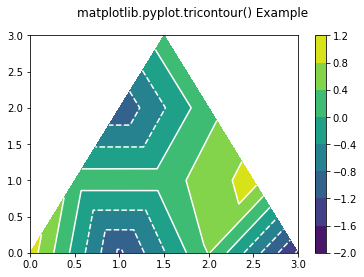

In [30]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
# Create triangulation.
x = np.asarray([0, 1, 2, 3, 0.5,
                1.5, 2.5, 1, 2, 1.5])
  
y = np.asarray([0, 0, 0, 0, 1.0, 
                1.0, 1.0, 2, 2, 3.0])
  
triangles = [[0, 1, 4], [1, 5, 4],
             [2, 6, 5], [4, 5, 7],
             [5, 6, 8], [5, 8, 7],
             [7, 8, 9], [1, 2, 5], 
             [2, 3, 6]]
  
triang = tri.Triangulation(x, y, triangles)
z = np.cos(3 * x) * np.cos(6 * y)+np.sin(6 * x)
      
fig, axs = plt.subplots()
t = axs.tricontourf(triang, z)
axs.tricontour(triang, z, colors ='white')
fig.colorbar(t)
  
fig.suptitle('matplotlib.pyplot.tricontour() Example') 
plt.show()

In [119]:
### read the poscacrs and properties
from collections import defaultdict

def count_info(path):
    filename = os.listdir(path)
    print('total number of structures are {}'.format(len(filename)))
    my_dict = defaultdict(int)
    for f in filename:
        mat = os.path.join(path, f)
        poscar = Poscar.from_file(mat)
        symbol_set = poscar.structure.symbol_set
        my_dict[symbol_set]+=1
    return my_dict
result = count_info(ternary_hcp)  
POSCARS = os.path.join('./', 'HEA_Data/POSCARS')
# poscars_list = os.listdir(POSCARS)
# count_info(POSCARS)
# count_info(ternary_fcc_bcc)
# count_info(ternary_hcp)

def obtain_combinations(target_species):
    n = len(target_species)
    total_combinations = []
    for i in range(1,n+1):
        total_combinations.extend(list(combinations(target_species, i)))
    total_combinations = [set(i) for i in total_combinations]
    return total_combinations
def obtain_species(target_species):
    """
    target_species = ['Co', 'Cr', 'Mn']
    """
    POSCARS = os.path.join('./', 'HEA_Data/POSCARS')
    poscars_list = os.listdir(POSCARS)
    total_combinations = obtain_combinations(target_species)
    species_result, fcc_result, bcc_result, hcp_result = defaultdict(int), defaultdict(int), defaultdict(int) ,defaultdict(int)
    ans , fcc_ans, bcc_ans, hcp_ans= [], [], [], []
    PHASE='fcc'
    for f in poscars_list:
        mat = os.path.join(POSCARS, f)
        if PHASE:
            phase_name = f.split('_')[1]
            if phase_name=='sqsfcc':
                poscar = Poscar.from_file(mat)
                symbol_set = poscar.structure.symbol_set
                formula = poscar.structure.composition.formula
                a_formula = poscar.structure.composition.alphabetical_formula
                if set(symbol_set) in total_combinations:
                    fcc_ans.append(f)
                    fcc_result[a_formula]+=1
            elif phase_name=='sqsbcc':
                poscar = Poscar.from_file(mat)
                symbol_set = poscar.structure.symbol_set
                formula = poscar.structure.composition.formula
                a_formula = poscar.structure.composition.alphabetical_formula
                if set(symbol_set) in total_combinations:
                    bcc_ans.append(f)
                    bcc_result[a_formula]+=1
            else:
                poscar = Poscar.from_file(mat)    
                symbol_set = poscar.structure.symbol_set
                formula = poscar.structure.composition.formula
                a_formula = poscar.structure.composition.alphabetical_formula
                if set(symbol_set) in total_combinations:
                    hcp_ans.append(f)
                    hcp_result[a_formula]+=1
        else:
            symbol_set = poscar.structure.symbol_set
            formula = poscar.structure.composition.formula
            a_formula = poscar.structure.composition.alphabetical_formula
            if set(symbol_set) in total_combinations:
                ans.append(f)
                species_result[a_formula]+=1
    if PHASE:
        if PHASE=='fcc':
            return fcc_ans, fcc_result
        elif PHASE=='bcc':
            return bcc_ans, bcc_result
        else:
            return hcp_ans, hcp_result
    else:
        return ans, species_result
     
# obtain_combinations( ['Co', 'Cr', 'Mn'])
ans, species_result = obtain_species( ['Co', 'Cr', 'Mn'])

total number of structures are 64


In [120]:
print(ans)
print(len(ans))
species_result

['Co2CrMn_sqsfcc', 'Co3Cr_sqsfcc', 'Co3Mn_sqsfcc', 'CoCr2Mn_sqsfcc', 'CoCr3_sqsfcc', 'CoCrMn2_sqsfcc', 'CoCrMn_sqsfcc', 'CoCr_sqsfcc', 'CoMn3_sqsfcc', 'CoMn_sqsfcc', 'Cr3Mn_sqsfcc', 'CrMn3_sqsfcc', 'CrMn_sqsfcc']
13


defaultdict(int,
            {'Co16 Cr8 Mn8': 1,
             'Co12 Cr4': 1,
             'Co12 Mn4': 1,
             'Co8 Cr16 Mn8': 1,
             'Co4 Cr12': 1,
             'Co8 Cr8 Mn16': 1,
             'Co8 Cr8 Mn8': 1,
             'Co8 Cr8': 1,
             'Co4 Mn12': 1,
             'Co8 Mn8': 1,
             'Cr12 Mn4': 1,
             'Cr4 Mn12': 1,
             'Cr8 Mn8': 1})

In [191]:
def obtain_coords(ans_list, ans_set=['Cr', 'Co', 'Mn']):
    POSCARS = os.path.join('./', 'HEA_Data/POSCARS')
    x, y = [], []
    for mat in ans_list:
        mat = os.path.join(POSCARS, mat)
        poscar = Poscar.from_file(mat)
        struct = poscar.structure
        comp_dict = struct.composition.to_reduced_dict
        sum = 0
        for k, v in comp_dict.items():
            sum =sum+v
#         print(sum)
        for k, v in comp_dict.items():
            comp_dict[k]=v/sum
        if len(comp_dict)==2:
            ss = set(ans_set)
            one = ss^comp_dict.keys()
            if one=={'Mn'}:
                x.append(comp_dict[ans_set[0]])
                y.append(comp_dict[ans_set[1]])
            else:
                left = ss^{'Mn'}
                print(left)
                if left=='Cr':
                    x.append(comp_dict[ans_set[0]])
                else:
                    x.append(comp_dict[ans_set[1]])
                y.append(1 - comp_dict[ans_set[0]]- comp_dict[ans_set[1]])
        elif len(comp_dict)==3:
            x.append(comp_dict[ans_set[0]])
            y.append(comp_dict[ans_set[1]])
    return x, y
def obtain_from_compositions(x, y):
    x = np.asarray(x)
    y = np.asarray(y)
    x_p = y/2+x
    y_p = y*np.sqrt(3)/2
    return (x_p, y_p)
x, y = obtain_coords(ans)

{'Co', 'Cr'}
{'Co', 'Cr'}
{'Co', 'Cr'}
{'Co', 'Cr'}
{'Co', 'Cr'}
{'Co', 'Cr'}


In [195]:
print(x)
print(y)
x_p, y_p = obtain_from_compositions(x,y)
print(x_p)
print(y_p)

[0.25, 0.25, 0.75, 0.5, 0.75, 0.25, 0.3333333333333333, 0.5, 0.25, 0.5, 0.0, 0.0, 0.0]
[0.5, 0.75, 0.25, 0.25, 0.25, 0.25, 0.3333333333333333, 0.5, 0.75, 0.5, 0.25, 0.75, 0.5]
[0.5   0.625 0.875 0.625 0.875 0.375 0.5   0.75  0.625 0.75  0.125 0.375
 0.25 ]
[0.4330127  0.64951905 0.21650635 0.21650635 0.21650635 0.21650635
 0.28867513 0.4330127  0.64951905 0.4330127  0.21650635 0.64951905
 0.4330127 ]


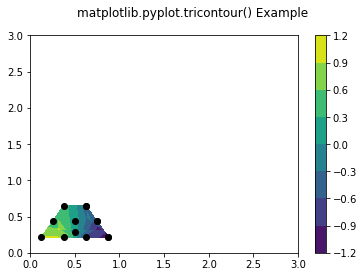

In [197]:
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import numpy as np
# Create triangulation.
x = x_p
y = y_p
  
# triangles = [[0, 1, 4], [1, 5, 4],
#              [2, 6, 5], [4, 5, 7],
#              [5, 6, 8], [5, 8, 7],
#              [7, 8, 9], [1, 2, 5], 
#              [2, 3, 6]]
  
triang = mtri.Triangulation(x, y)
z = np.cos(3 * x) * np.cos(6 * y)+np.sin(6 * x)
      
fig, axs = plt.subplots()
t = axs.tricontourf(triang, z)
# plot the triangle
axs.triplot(triang, 'ko')
# interpolate
interp_lin = mtri.LinearTriInterpolator(triang, z)
xi, yi = np.meshgrid(np.linspace(0, 3, 20), np.linspace(0, 3, 20))
zi_lin = interp_lin(xi, yi)
axs.contourf(xi, yi, zi_lin)
# axs.tricontour(triang, z, colors ='white')
fig.colorbar(t)
  
fig.suptitle('matplotlib.pyplot.tricontour() Example') 
plt.show()

Version 1.0.8


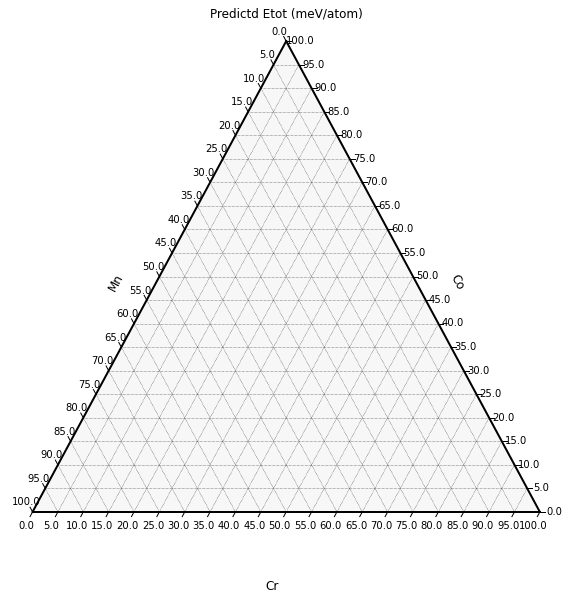

In [50]:
import math
import ternary
import random


print("Version", ternary.__version__)
def shannon_entropy(p):
    """Computes the Shannon Entropy at a distribution in the simplex."""
    s = 0.
    for i in range(len(p)):
        try:
            s += p[i] * math.log(10*p[i])
        except ValueError:
            continue
    return -1. * s

######### rewrite the simplex_iterator:
# def simplex_iterator(scale, boundary=True, p=1):
#     """
#     Systematically iterates through a lattice of points on the 2-simplex.
#     Parameters
#     ----------
#     scale: Int
#         The normalized scale of the simplex, i.e. N such that points (x,y,z)
#         satisify x + y + z == N
#     boundary: bool, True
#         Include the boundary points (tuples where at least one
#         coordinate is zero)
#     Yields
#     ------
#     3-tuples, There are binom(n+2, 2) points (the triangular
#     number for scale + 1, less 3*(scale+1) if boundary=False
#     """

#     start = 0
#     if not boundary:
#         start = 1
#     for i in range(start, scale + (1 - start)):
#         for j in range(start, scale + (1 - start) - i):
#             k = scale - i - j
#             i=i/p
#             j=j/p
#             k=k/p
#             yield (i, j, k)

def generate_random_heatmap_data(scale=1):
    d = dict()
    from ternary.helpers import simplex_iterator
    for (i,j,k) in simplex_iterator(scale):
        d[(i,j)] = random.random()
    return d

scale_simplex = 100
figure, tax = ternary.figure(scale=scale_simplex)

# figure.set_size_inches(10, 8)
figure.set_size_inches(10, 10)

# set Axis labels and Title
fontsize=12
offset = 0.1
tax.left_axis_label("Mn", fontsize=fontsize, offset=offset)
tax.right_axis_label("Co", fontsize=fontsize, offset=offset)
tax.bottom_axis_label("Cr", fontsize=fontsize, offset=offset)

# draw gridlines
tax.gridlines(color="k", multiple=5)

# a function is plotted as a heatmap
# tax.heatmapf(shannon_entropy, boundary=True, style="triangular")

# make heatmaps of data

d = generate_random_heatmap_data(scale=scale_simplex)
# tax.heatmap(data = d, style="h", scale=scale_simplex)

tax.boundary(linewidth=2.0)

# property='Etot (meV/atom)'
tax.set_title("Predictd {}".format(property))
tax.ticks(axis='lbr', linewidth=1, multiple=5, tick_formats="%.1f")
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')
tax.show()